![UBA](assets/UBA_header_black.png)

# Dataset seleccionado: BA Ecobici
Contiene información sobre los viajes realizados a través del servicio público de bicicletas BA Ecobici, que opera en la Ciudad Autónoma de Buenos Aires.

In [90]:
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FixedLocator
import requests
import zipfile
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import folium

pd.set_option('display.max_columns', None)  # Mostrar todas las columnas

# Ingesta de los datos

In [91]:
"""USUARIOS_FILE_URL = r"https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/badata_ecobici_usuarios_2024.csv"
RECORRIDOS_FILE_URL = r"https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/badata_ecobici_recorridos_realizados_2024.zip"
USUARIOS_CSV = pathlib.Path("./datasets/badata_ecobici_usuarios_2024.csv")
RECORRIDOS_ZIP = pathlib.Path("./datasets/badata_ecobici_recorridos_realizados_2024.zip")
RECORRIDOS_CSV = pathlib.Path("./datasets/badata_ecobici_recorridos_realizados_2024.csv")
# Descarga de los archivos
GET_FILES = False

if GET_FILES:
    def download_file(url, dest_path):
        response = requests.get(url, stream=True)
        response.raise_for_status()
        with open(dest_path, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)


    download_file(USUARIOS_FILE_URL, USUARIOS_CSV)
    download_file(RECORRIDOS_FILE_URL, RECORRIDOS_ZIP)

    with zipfile.ZipFile(RECORRIDOS_ZIP) as zip_ref:
        zip_contents = zip_ref.namelist()
        if zip_contents:
            zip_ref.extract(zip_contents[0], path=RECORRIDOS_CSV.parent)
            extracted_file = RECORRIDOS_CSV.parent / zip_contents[0]
            extracted_file.rename(RECORRIDOS_CSV)

    RECORRIDOS_ZIP.unlink()"""

'USUARIOS_FILE_URL = r"https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/badata_ecobici_usuarios_2024.csv"\nRECORRIDOS_FILE_URL = r"https://cdn.buenosaires.gob.ar/datosabiertos/datasets/transporte-y-obras-publicas/bicicletas-publicas/badata_ecobici_recorridos_realizados_2024.zip"\nUSUARIOS_CSV = pathlib.Path("./datasets/badata_ecobici_usuarios_2024.csv")\nRECORRIDOS_ZIP = pathlib.Path("./datasets/badata_ecobici_recorridos_realizados_2024.zip")\nRECORRIDOS_CSV = pathlib.Path("./datasets/badata_ecobici_recorridos_realizados_2024.csv")\n# Descarga de los archivos\nGET_FILES = False\n\nif GET_FILES:\n    def download_file(url, dest_path):\n        response = requests.get(url, stream=True)\n        response.raise_for_status()\n        with open(dest_path, \'wb\') as f:\n            for chunk in response.iter_content(chunk_size=8192):\n                f.write(chunk)\n\n\n    download_file(USUARIOS_FILE_URL, USUARIOS_CSV)\n    download_file(

In [92]:
users_df = pd.read_csv("usuarios_2024.csv")
rides_df = pd.read_csv("recorridos_realizados_2024.csv")

# Hipótesis
- Los fines de semana hay una mayor cantidad de usuarios nuevos
- Los fines de semana se realizan más recorridos
- Las estaciones ubicadas cerca de centros de transbordo (trenes, subtes y colectivos) son las más utilizadas
- La mayoría de los viajes ocurre en horas pico laborales
- La duración promedio de los recorridos es mayor los fines de semana
- Las estaciones ubicadas en zonas comerciales son más usadas en horario laboral
- En invierno disminuye la cantidad de viajes

# Posibilidades abiertas para el futuro
Si bien no forman parte del objetivo actual, este análisis podría extenderse utilizando modelos de aprendizaje automático para:
- Predecir demanda futura por estación
- Estimar la duración de un recorrido en función del día y hora de inicio <br>
<br>
Para esto, se podría cruzar con otros datasets:
- BA Ecobici (de años anteriores y posteriores)
- Clima (Servicio Metereológico Nacional)
- Transporte público (datos de viajes en otros medios de transporte)
- Eventos masivos (recitales, eventos deportivos, eventos gratuitos del GCBA, etc.)

# Dataset de usuarios (CSV)
Contiene el listado de usuarios del servicio, que se dieron de alta en 2024.

In [93]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197079 entries, 0 to 197078
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   id_usuario      197079 non-null  int64 
 1   genero_usuario  197079 non-null  object
 2   edad_usuario    197079 non-null  int64 
 3   fecha_alta      197079 non-null  object
 4   hora_alta       197079 non-null  object
dtypes: int64(2), object(3)
memory usage: 7.5+ MB


In [94]:
users_df.head()

,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta
0,1083579,OTHER,23,2024-01-01,01:59:02
1,1083608,OTHER,36,2024-01-01,02:55:46
2,1083612,OTHER,38,2024-01-01,03:13:15
3,1083616,FEMALE,21,2024-01-01,03:40:54
4,1083631,MALE,36,2024-01-01,05:02:35


In [95]:
users_df.describe()

,id_usuario,edad_usuario
count,1.970790e+05,197079.000000
mean,1.182078e+06,30.764521
std,5.689283e+04,18.896208
min,1.083538e+06,4.000000
25%,1.132808e+06,21.000000
50%,1.182078e+06,27.000000
75%,1.231348e+06,37.000000
max,1.280619e+06,2021.000000


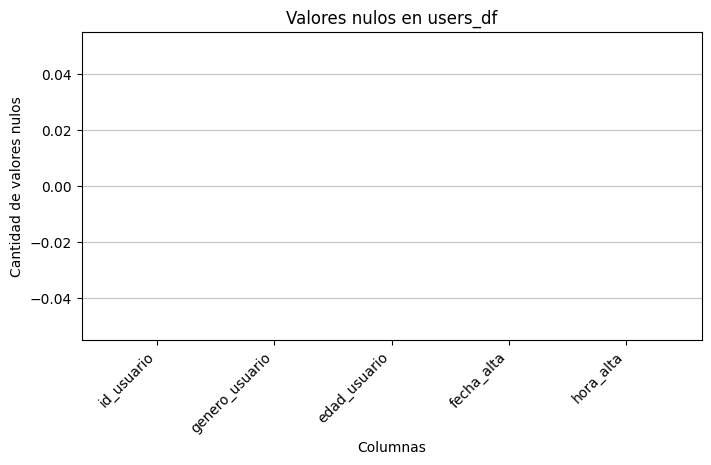

In [96]:
# Exploración de valores nulos
plt.figure(figsize=(8, 4))
plt.grid(axis='y', alpha=0.75)
plt.bar(users_df.columns, users_df.isnull().sum(), align='center', zorder=2)
plt.xticks(rotation=45, ha='right')
plt.title('Valores nulos en users_df')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.show()

In [97]:
# Usuarios duplicados
duplicated_users = users_df[users_df.duplicated(subset='id_usuario', keep=False)]
print(f"Cantidad de usuarios duplicados: {duplicated_users['id_usuario'].nunique()}")
duplicated_users.sort_values(by='id_usuario').head(10)

Cantidad de usuarios duplicados: 0


,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta


##### Exploración de generos

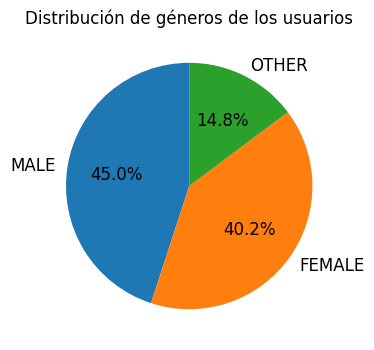

In [98]:
# Pie chart de los géneros de usuarios
plt.figure(figsize=(4, 4))
users_df['genero_usuario'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, fontsize=12)
plt.title('Distribución de géneros de los usuarios')
plt.ylabel('')
plt.show()

In [99]:
# Conteo de usuarios por género
gender_counts = users_df['genero_usuario'].value_counts()
print(gender_counts)

genero_usuario
MALE      88656
FEMALE    79310
OTHER     29113
Name: count, dtype: int64


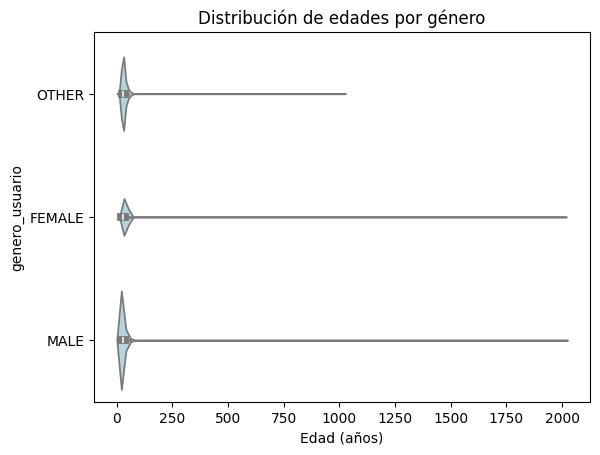

In [100]:
sns.violinplot(y=users_df['genero_usuario'], x=users_df['edad_usuario'], color='lightblue', inner='box')
plt.title('Distribución de edades por género')
plt.xlabel('Edad (años)')
plt.show()

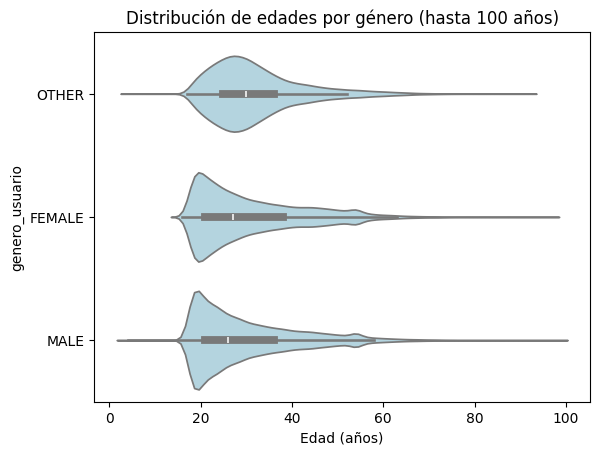

In [101]:
# Violin de edades por género (edades hasta 100 años)
mask_edad = users_df['edad_usuario'] <= 100
sns.violinplot(y=users_df['genero_usuario'][mask_edad], x=users_df['edad_usuario'][mask_edad], color='lightblue', inner='box')
plt.title('Distribución de edades por género (hasta 100 años)')
plt.xlabel('Edad (años)')
plt.show()

##### Exploración de edades

In [102]:
# Edades de usuarios menores de 18 años
users_df[users_df['edad_usuario'] < 18].value_counts('edad_usuario').sort_index()

edad_usuario
4      2
5      4
15     3
16     7
17    16
Name: count, dtype: int64

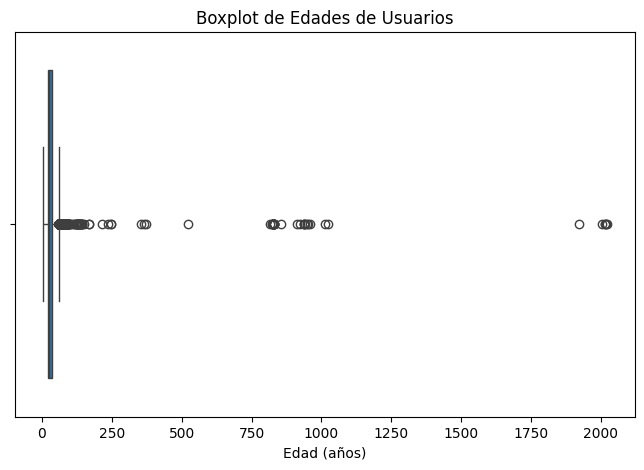

In [103]:
# Boxplot de edades
plt.figure(figsize=(8, 5))
sns.boxplot(x=users_df['edad_usuario'])
plt.title('Boxplot de Edades de Usuarios')
plt.xlabel('Edad (años)')
plt.show()

In [104]:
# Cuartiles en años
Q1 = users_df['edad_usuario'].quantile(0.25)
Q2 = users_df['edad_usuario'].quantile(0.50)
Q3 = users_df['edad_usuario'].quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25%):", Q1)
print("Q2 (Mediana, 50%):", Q2)
print("Q3 (75%):", Q3)
print("IQR (Rango Intercuartílico):", IQR)

Q1 (25%): 21.0
Q2 (Mediana, 50%): 27.0
Q3 (75%): 37.0
IQR (Rango Intercuartílico): 16.0


In [105]:
# Media moda mediana de edades (en años)
mean = users_df['edad_usuario'].mean().round(2)
median = users_df['edad_usuario'].median().round(2)
mode = users_df['edad_usuario'].mode()[0].round(2)
var = users_df['edad_usuario'].var().round(2)
std_dev = users_df['edad_usuario'].std().round(2)

print(f"Media: {mean} años")
print(f"Mediana: {median} años")
print(f"Moda: {mode} años")
print(f"Varianza: {var} años²")
print(f"Desviación estándar: {std_dev} años")

Media: 30.76 años
Mediana: 27.0 años
Moda: 18 años
Varianza: 357.07 años²
Desviación estándar: 18.9 años


In [106]:
print(f"Asímetría de edad: {users_df['edad_usuario'].skew()}")
print(f"Curtosis de edad: {users_df['edad_usuario'].kurtosis()}")

Asímetría de edad: 47.583628237635786
Curtosis de edad: 4173.90573483157


La edad de usuario es altamente asimétrica:
- Tiene muchos valores bajos
- Tiene pocos valores extremadamente altos (estiran la cola a derecha)

La edad de usuario tiene una curtosis muy alta:
- Tiene una distribución 'picuda'
- Tiene una cola bien pesada

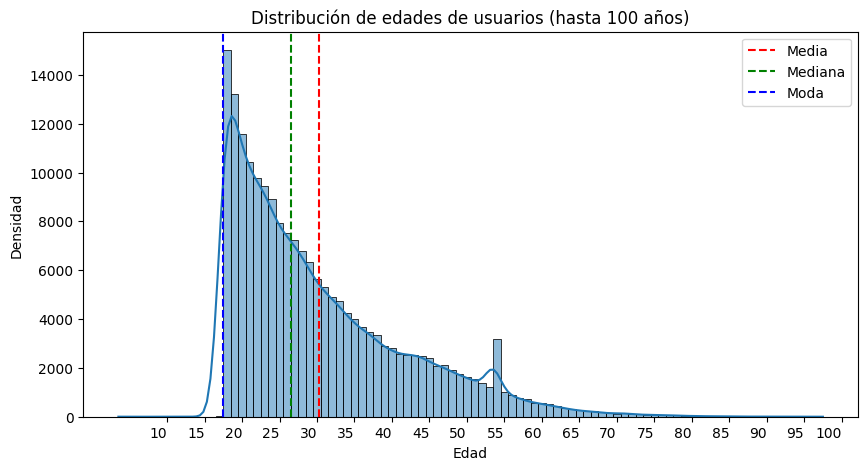

In [107]:
# Histograma de edades (hasta 100 años)
mask_edad = users_df['edad_usuario'] <= 100
plt.figure(figsize=(10, 5))
ax = sns.histplot(users_df[mask_edad]['edad_usuario'], kde=True, binwidth=1)
ticks = [t + 0.5 for t in range(10, 101, 5)]  # Esto es para centrar los bines en los ticks
ax.xaxis.set_major_locator(FixedLocator(ticks))
ax.set_xticklabels([str(int(tick)) for tick in ticks], ha='right')
plt.title('Distribución de edades de usuarios (hasta 100 años)')
plt.xlabel('Edad')
plt.ylabel('Densidad')

# Media, moda y mediana
ax.axvline(mean, color='r', linestyle='--', label='Media')
ax.axvline(median, color='g', linestyle='--', label='Mediana')
ax.axvline(mode, color='b', linestyle='--', label='Moda')
ax.legend()

plt.show()


Text(0, 0.5, 'Densidad')

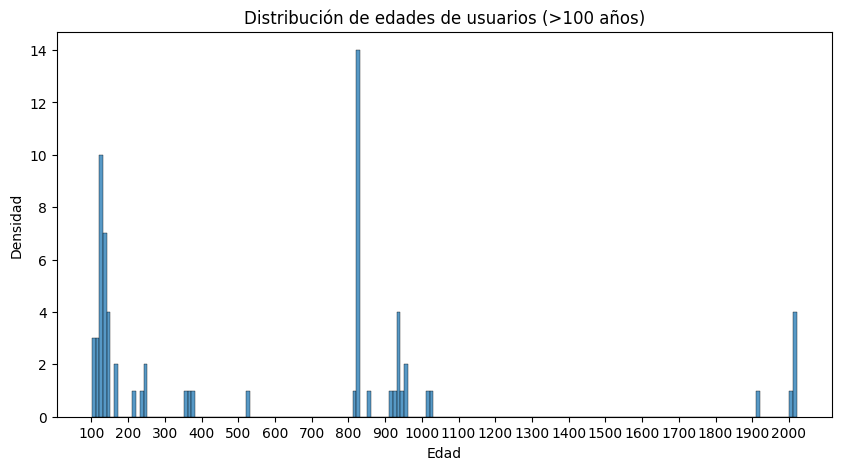

In [108]:
# Histograma de edades de mas de 100 años
mask_edad = users_df["edad_usuario"] > 100
plt.figure(figsize=(10, 5))
sns.histplot(users_df[mask_edad]['edad_usuario'], binwidth=10)
plt.title('Distribución de edades de usuarios (>100 años)')
plt.xticks(range(100, users_df['edad_usuario'].max() + 1, 100))
plt.xlabel('Edad')
plt.ylabel('Densidad')

In [109]:
# 10 usuarios mas 'viejos'
users_df.sort_values(by='edad_usuario', ascending=False).head(10)

,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta
56690,1109473,MALE,2021,2024-02-11,20:24:45
104417,1238144,MALE,2019,2024-10-27,20:08:47
124365,1130915,FEMALE,2016,2024-03-21,21:19:50
184254,1202670,MALE,2016,2024-09-07,18:39:34
66885,1189702,FEMALE,2004,2024-08-09,22:34:35
10936,1150325,FEMALE,1921,2024-04-29,13:33:57
137312,1277262,OTHER,1022,2024-12-27,13:11:42
62421,1167228,MALE,1012,2024-06-16,15:20:11
18616,1199423,OTHER,960,2024-09-02,17:37:56
92904,1279416,OTHER,952,2024-12-30,09:20:27


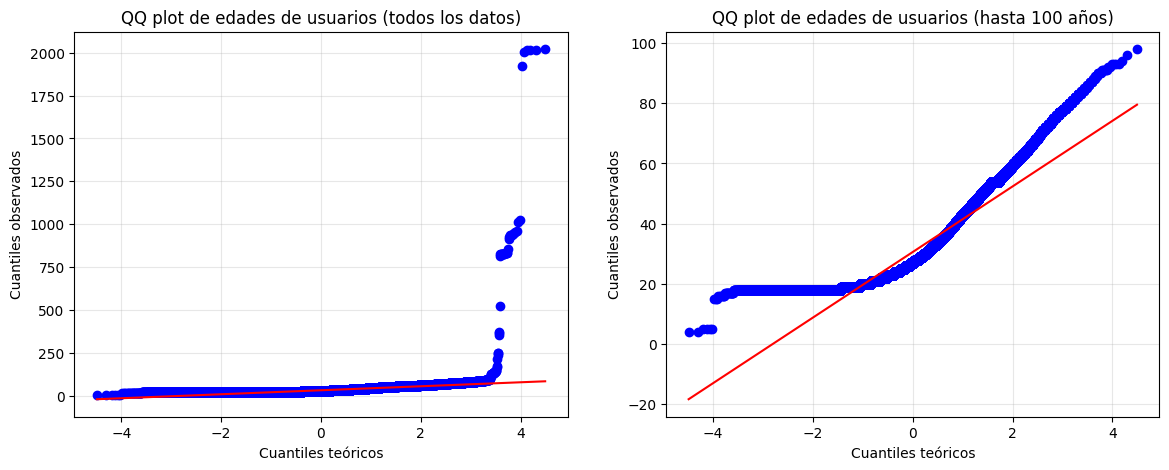

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# QQ plot con todos los datos de edad
stats.probplot(users_df['edad_usuario'], dist="norm", plot=ax1)
ax1.set_title('QQ plot de edades de usuarios (todos los datos)', fontsize=12)
ax1.set_xlabel('Cuantiles teóricos')
ax1.set_ylabel('Cuantiles observados')
ax1.grid(alpha=0.3)

# QQ plot solo con edades hasta 100 años
mask_edad = users_df['edad_usuario'] <= 100
stats.probplot(users_df[mask_edad]['edad_usuario'], dist="norm", plot=ax2)
ax2.set_title('QQ plot de edades de usuarios (hasta 100 años)', fontsize=12)
ax2.set_xlabel('Cuantiles teóricos')
ax2.set_ylabel('Cuantiles observados')
ax2.grid(alpha=0.3)

plt.show()

El QQ plot muestra
- Clara desviación respecto a la normalidad
- Cola pesada
- Muchas edades pequeñas y pocas edades muy grandes

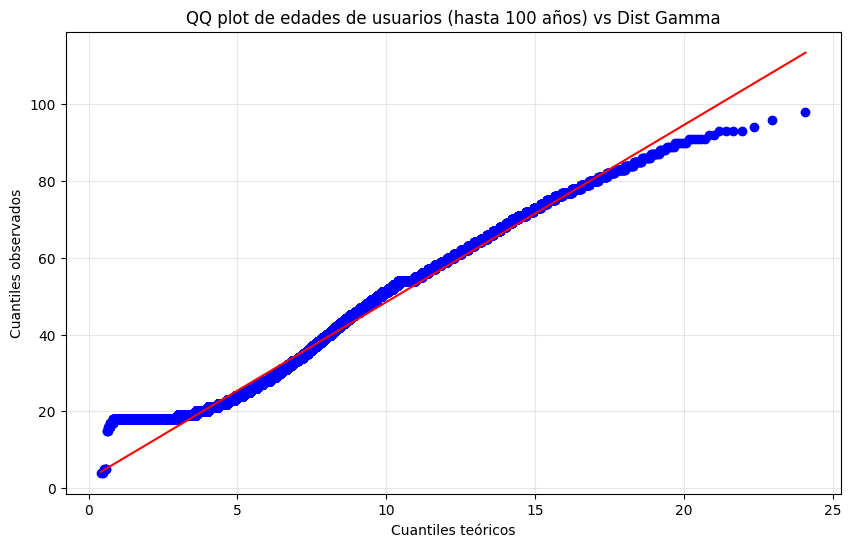

In [111]:
# QQ plot contra distribución Gamma
mask_edad = users_df['edad_usuario'] <= 100

a, loc, scale = stats.gamma.fit(users_df[mask_edad]['edad_usuario'])

fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(users_df[mask_edad]['edad_usuario'], dist=stats.gamma, sparams=(a,), plot=ax)
ax.set_title('QQ plot de edades de usuarios (hasta 100 años) vs Dist Gamma', fontsize=12)
ax.set_xlabel('Cuantiles teóricos')
ax.set_ylabel('Cuantiles observados')
ax.grid(alpha=0.3)
plt.show()

##### Exploración de fecha y hora de alta

In [112]:
# Parseo de columnas de fecha y hora
users_df['fecha_alta_dt'] = pd.to_datetime(users_df['fecha_alta'], errors='coerce')
users_df['hora_alta_dt'] = pd.to_datetime(users_df['hora_alta'], format='%H:%M:%S', errors='coerce').dt.time
users_df['dia_semana'] = users_df['fecha_alta_dt'].dt.day_name()

In [113]:
# 10 fechas de alta mas repetidas
users_df['fecha_alta_dt'].value_counts().head(10)

fecha_alta_dt
2024-11-09    1720
2024-05-09    1315
2024-10-11    1278
2024-09-29    1197
2024-10-27    1154
2024-11-10    1128
2024-11-18    1119
2024-09-08    1076
2024-01-24    1062
2024-09-15    1041
Name: count, dtype: int64

In [114]:
# 10 horas de alta mas repetidas
users_df['hora_alta_dt'].apply(lambda x: x.hour).value_counts().head(10)

hora_alta_dt
16    18531
15    17762
17    17386
14    15614
18    14997
13    14042
12    13425
11    11756
19    11261
10     8984
Name: count, dtype: int64

In [115]:
# Altas por dia de la semana
users_df['dia_semana'].value_counts()

dia_semana
Sunday       31073
Saturday     28801
Monday       28599
Thursday     27978
Friday       27115
Tuesday      26841
Wednesday    26672
Name: count, dtype: int64

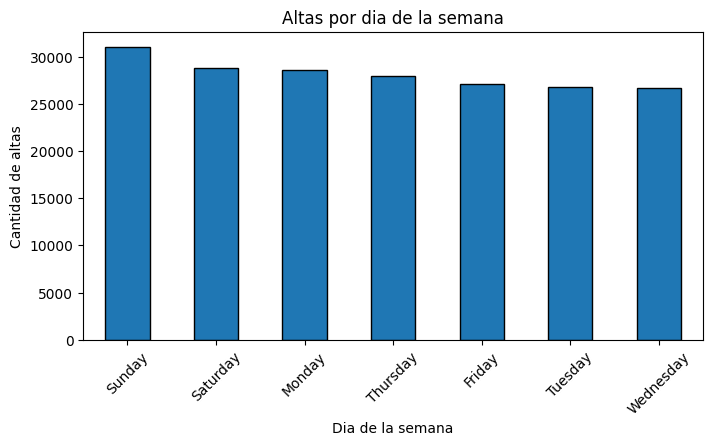

In [116]:
# Bar chart de altas por dia de la semana
plt.figure(figsize=(8, 4))
users_df['dia_semana'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Altas por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de altas')
plt.xticks(rotation=45)
plt.show()

# Dataset de recorridos (CSV)
Contiene información de los viajes realizados.

In [117]:
rides_df.info()
# duracion_recorrido está en segundos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560404 entries, 0 to 3560403
Data columns (total 17 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   id_recorrido                int64  
 1   duracion_recorrido          int64  
 2   fecha_origen_recorrido      object 
 3   id_estacion_origen          int64  
 4   nombre_estacion_origen      object 
 5   direccion_estacion_origen   object 
 6   long_estacion_origen        float64
 7   lat_estacion_origen         float64
 8   fecha_destino_recorrido     object 
 9   id_estacion_destino         int64  
 10  nombre_estacion_destino     object 
 11  direccion_estacion_destino  object 
 12  long_estacion_destino       float64
 13  lat_estacion_destino        float64
 14  id_usuario                  float64
 15  modelo_bicicleta            object 
 16  genero                      object 
dtypes: float64(5), int64(4), object(8)
memory usage: 461.8+ MB


In [118]:
rides_df.head()

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero
0,24496816,17,2024-12-31 08:18:58,202,001 - FACULTAD DE DERECHO,Av. Pres. Figueroa Alcorta 2120,-58.390602,-34.583749,2024-12-31 08:19:15,202,001 - FACULTAD DE DERECHO,Av. Pres. Figueroa Alcorta 2120,-58.390602,-34.583749,1166678.0,FIT,FEMALE
1,24492524,2,2024-12-30 19:21:45,251,388 - Plaza Jose C Paz,Dr. Prof. Pedro Chutro 2881,-58.402483,-34.641728,2024-12-30 19:21:47,41,041 - PARQUE PATRICIOS II,Av Caseros 3015,-58.405888,-34.637123,1133415.0,FIT,FEMALE
2,24493951,0,2024-12-30 21:08:03,418,345 - Plaza Mafalda,Conde & Concepción Arenal,-58.444580,-34.580938,NaN,418,345 - Plaza Mafalda,Conde & Concepción Arenal,-58.444580,-34.580938,1158360.0,ICONIC,FEMALE
3,24494848,6575,2024-12-30 23:22:17,177,177 -PLANETARIO,Av. Belisario Roldán y Av. Sarmiento,-58.411598,-34.571079,2024-12-31 01:11:52,336,207 - PLAZA ARENALES,Nueva York 3949,-58.511146,-34.599731,1224331.0,FIT,FEMALE
4,24495039,3162,2024-12-30 23:52:00,359,250 - Fleni,2292 Montañeses,-58.450479,-34.555602,2024-12-31 00:44:42,85,085 - AGUERO,"Aguero & Mansilla, Lucio Norberto, General",-58.409178,-34.594806,1280053.0,ICONIC,FEMALE


In [119]:
rides_df.describe()

,id_recorrido,duracion_recorrido,id_estacion_origen,long_estacion_origen,lat_estacion_origen,id_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario
count,3.560404e+06,3.560404e+06,3.560404e+06,3.560404e+06,3.560404e+06,3.560404e+06,3.560404e+06,3.560404e+06,3.560404e+06
mean,2.234132e+07,1.274680e+03,2.355957e+02,-5.842302e+01,-3.459877e+01,2.371506e+02,-5.842318e+01,-3.459896e+01,7.908728e+05
std,1.257073e+06,9.582717e+03,1.657999e+02,3.830469e-02,2.441487e-02,1.657100e+02,3.848631e-02,2.477407e-02,3.881981e+05
min,2.018097e+07,0.000000e+00,2.000000e+00,-5.852710e+01,-3.468777e+01,2.000000e+00,-5.852710e+01,-3.468777e+01,2.400000e+01
25%,2.123866e+07,4.930000e+02,9.300000e+01,-5.844965e+01,-3.461635e+01,9.600000e+01,-5.844966e+01,-3.461649e+01,5.118240e+05
50%,2.235131e+07,8.810000e+02,1.990000e+02,-5.842095e+01,-3.460028e+01,2.000000e+02,-5.842095e+01,-3.460075e+01,9.131670e+05
75%,2.343700e+07,1.473000e+03,3.780000e+02,-5.839374e+01,-3.458255e+01,3.790000e+02,-5.839374e+01,-3.458234e+01,1.113537e+06
max,2.450328e+07,2.571165e+06,5.770000e+02,-5.835547e+01,-3.453669e+01,5.770000e+02,-5.835547e+01,-3.453669e+01,1.280599e+06


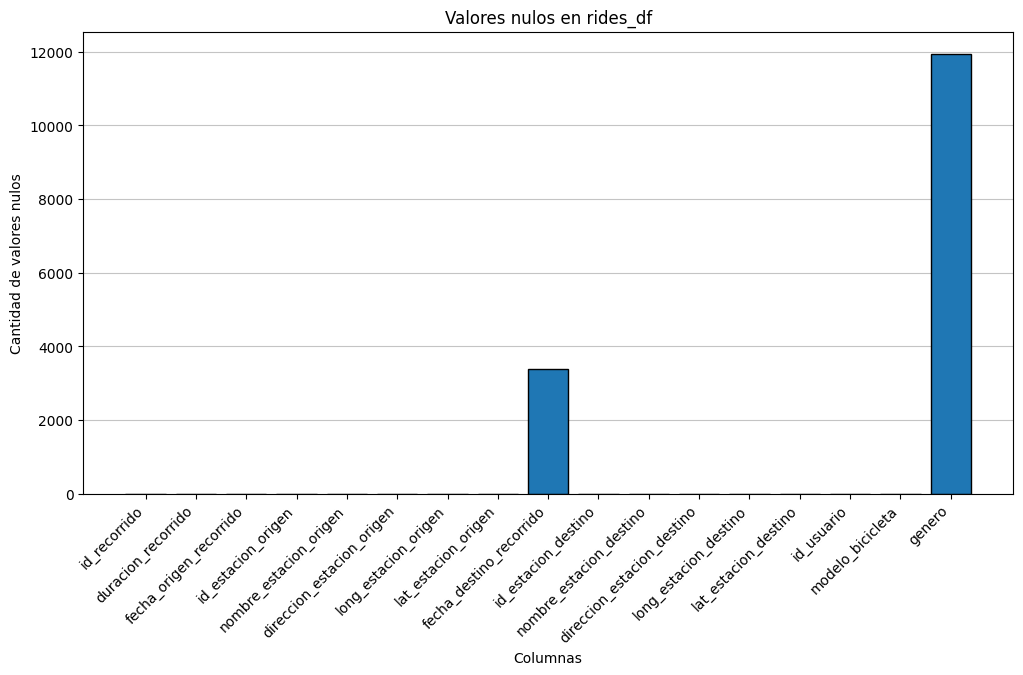

In [120]:
# Exploración de valores nulos
plt.figure(figsize=(12, 6))
plt.grid(axis='y', alpha=0.75)
plt.bar(rides_df.columns, rides_df.isnull().sum(), align='center', zorder=2, edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Valores nulos en rides_df')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.show()

##### Exploración de duraciones de recorrido

In [121]:
rides_df['duracion_recorrido_min'] = rides_df['duracion_recorrido'] / 60

In [122]:
# Recorrido mas largo en días
print(f"Recorrido más largo: {round(rides_df['duracion_recorrido'].max()/3600/24, 2)} días")

Recorrido más largo: 29.76 días


In [123]:
# Recorrido mas corto en minutos
print(f"Recorrido más corto: {round(rides_df['duracion_recorrido_min'].min(), 2)} minutos")

# Recorrido mas largo en minutos
print(f"Recorrido más largo: {round(rides_df['duracion_recorrido_min'].max(), 2)} minutos")

Recorrido más corto: 0.0 minutos
Recorrido más largo: 42852.75 minutos


In [124]:
# El usuario que más tiempo usó las bicicletas
user_durations = rides_df.groupby('id_usuario')['duracion_recorrido'].sum()
max_user_id = user_durations.idxmax()
max_user_duration = user_durations.max()

print(f"Usuario más activo: {max_user_duration/3600:.2f} hs")

Usuario más activo: 738.33 hs


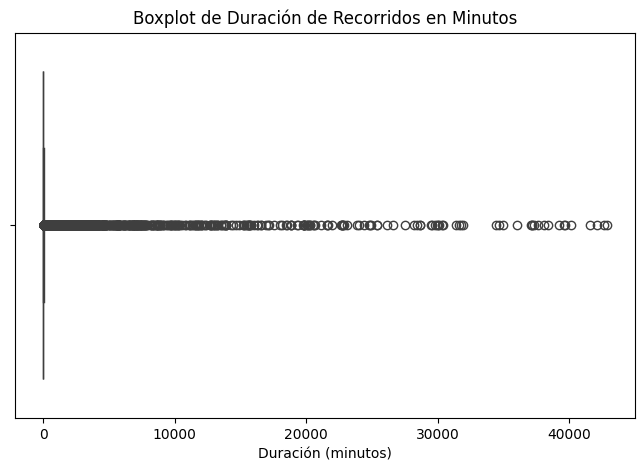

In [125]:
# Boxplot de duracion de recorridos en minutos
plt.figure(figsize=(8, 5))
sns.boxplot(x=rides_df['duracion_recorrido_min'])
plt.title('Boxplot de Duración de Recorridos en Minutos')
plt.xlabel('Duración (minutos)')
plt.show()

In [126]:
# Cuartiles en minutos
Q1 = rides_df['duracion_recorrido_min'].quantile(0.25)
Q2 = rides_df['duracion_recorrido_min'].quantile(0.50)
Q3 = rides_df['duracion_recorrido_min'].quantile(0.75)
IQR = Q3 - Q1

print("Q1 (25%):", Q1)
print("Q2 (Mediana, 50%):", Q2)
print("Q3 (75%):", Q3)
print("IQR (Rango Intercuartílico):", IQR)

Q1 (25%): 8.216666666666667
Q2 (Mediana, 50%): 14.683333333333334
Q3 (75%): 24.55
IQR (Rango Intercuartílico): 16.333333333333336


In [127]:
# Media moda mediana de duraciones (en minutos)
mean = rides_df['duracion_recorrido_min'].mean().round(2)
median = rides_df['duracion_recorrido_min'].median().round(2)
mode = rides_df['duracion_recorrido_min'].mode()[0].round(2)
var = rides_df['duracion_recorrido_min'].var().round(2)
std_dev = rides_df['duracion_recorrido_min'].std().round(2)

print(f"Media: {mean} s")
print(f"Mediana: {median} s")
print(f"Moda: {mode} s")
print(f"Varianza: {var} s²")
print(f"Desviación estándar: {std_dev} s")

Media: 21.24 s
Mediana: 14.68 s
Moda: 0.03 s
Varianza: 25507.91 s²
Desviación estándar: 159.71 s


In [128]:
print(f"Asímetría de duracion: {rides_df['duracion_recorrido_min'].skew()}")
print(f"Curtosis de duracion: {rides_df['duracion_recorrido_min'].kurtosis()}")

Asímetría de duracion: 156.24371723293666
Curtosis de duracion: 30117.530410529303


La duración de recorridos es altamente asimétrica:
- Tiene muchos valores bajos
- Tiene pocos valores extremadamente altos (estiran la cola a derecha)

La duración de recorridos tiene una curtosis muy alta:
- Tiene una distribución 'picuda'
- Tiene una cola bien pesada

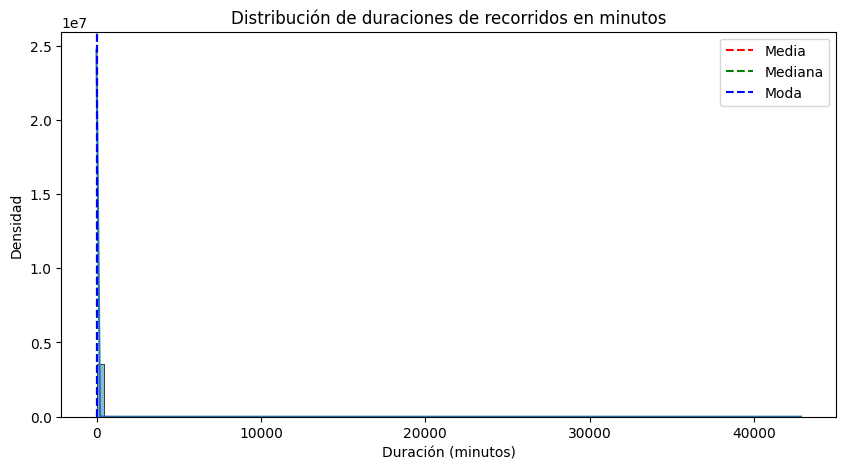

In [129]:
# Histograma de duraciones de recorridos en minutos
plt.figure(figsize=(10, 5))
ax =sns.histplot(rides_df['duracion_recorrido_min'], bins=100, kde=True)
plt.title('Distribución de duraciones de recorridos en minutos')
plt.xlabel('Duración (minutos)')
plt.ylabel('Densidad')

# Media, moda y mediana
ax.axvline(mean, color='r', linestyle='--', label='Media')
ax.axvline(median, color='g', linestyle='--', label='Mediana')
ax.axvline(mode, color='b', linestyle='--', label='Moda')
ax.legend()

plt.show()

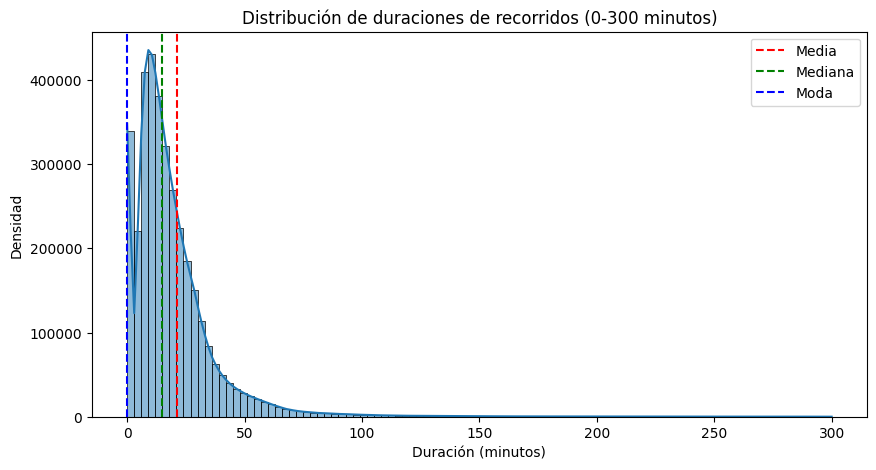

In [130]:
# Histograma de duraciones de recorridos en minutos (>0 y < 300)
mask_duration = (rides_df['duracion_recorrido_min'] > 0) & (rides_df['duracion_recorrido_min'] < 300)
plt.figure(figsize=(10, 5))
ax = sns.histplot(rides_df[mask_duration]['duracion_recorrido_min'], bins=100, kde=True)
plt.title('Distribución de duraciones de recorridos (0-300 minutos)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Densidad')

# Media, moda y mediana
ax.axvline(mean, color='r', linestyle='--', label='Media')
ax.axvline(median, color='g', linestyle='--', label='Mediana')
ax.axvline(mode, color='b', linestyle='--', label='Moda')
ax.legend()

plt.show()

##### Exploración de fecha origen de recorrido

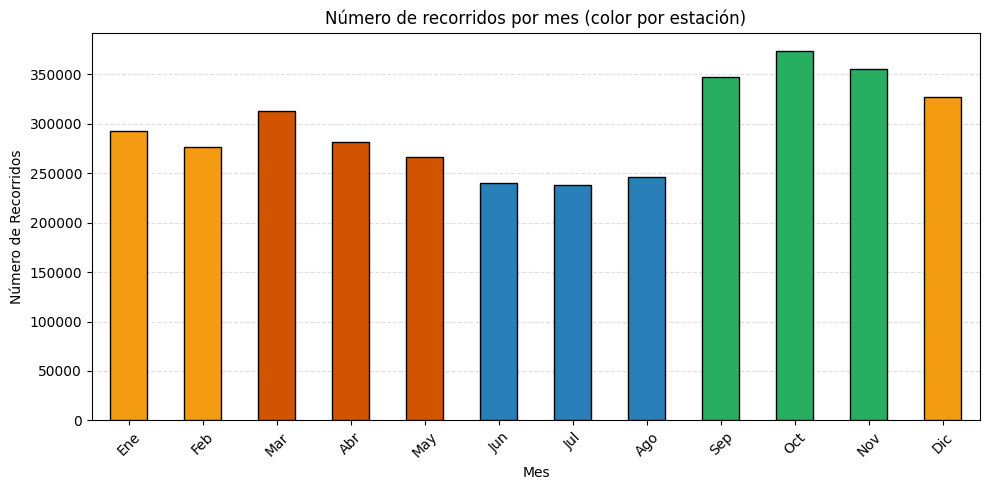

In [131]:
rides_df['fecha_origen_recorrido'] = pd.to_datetime(rides_df['fecha_origen_recorrido'])
rides_df['mes'] = rides_df['fecha_origen_recorrido'].dt.month

counts = rides_df['mes'].value_counts().reindex(range(1,13), fill_value=0).sort_index()

# Verano: Dic-Ene-Feb; Otoño: Mar-Abr-May; Invierno: Jun-Jul-Ago; Primavera: Sep-Oct-Nov
season_of = {12:'verano', 1:'verano', 2:'verano',
             3:'otoño', 4:'otoño', 5:'otoño',
             6:'invierno', 7:'invierno', 8:'invierno',
             9:'primavera', 10:'primavera', 11:'primavera'}
palette = {'verano':'#F39C12', 'otoño':'#D35400', 'invierno':'#2980B9', 'primavera':'#27AE60'}
colors = [palette[season_of[m]] for m in counts.index]

fig, ax = plt.subplots(figsize=(10, 5))
counts.plot(kind='bar', ax=ax, color=colors, edgecolor='black', zorder=3)

ax.grid(axis='y', linestyle='--', alpha=0.4, zorder=0)
ax.set_axisbelow(True)

ax.set_title('Número de recorridos por mes (color por estación)')
ax.set_xlabel('Mes'); ax.set_ylabel('Número de Recorridos')
ax.set_xticks(range(12))
ax.set_xticklabels(['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dic'], rotation=45)

plt.tight_layout()
plt.show()


In [132]:
# Dia de la semana con más recorridos
rides_df['dia_semana_origen_recorrido'] = rides_df['fecha_origen_recorrido'].dt.day_name()
print(f"Día de la semana con más recorridos: {rides_df['dia_semana_origen_recorrido'].value_counts().idxmax()} con {rides_df['dia_semana_origen_recorrido'].value_counts().max()} recorridos")

Día de la semana con más recorridos: Thursday con 641452 recorridos


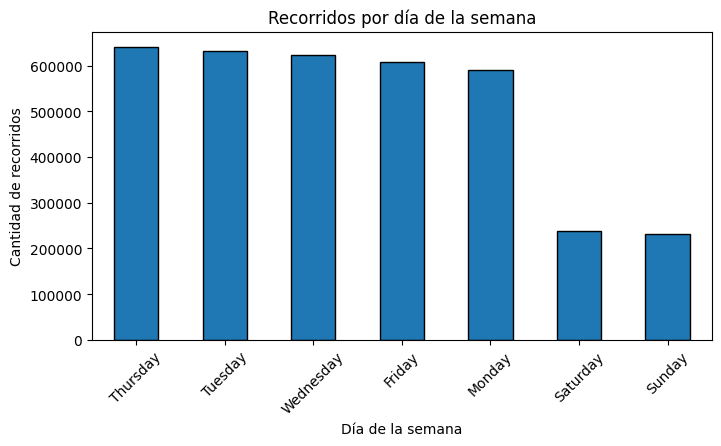

In [133]:
# Bar chart de recorridos por dia de la semana
plt.figure(figsize=(8, 4))
rides_df['dia_semana_origen_recorrido'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Recorridos por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de recorridos')
plt.xticks(rotation=45)
plt.show()

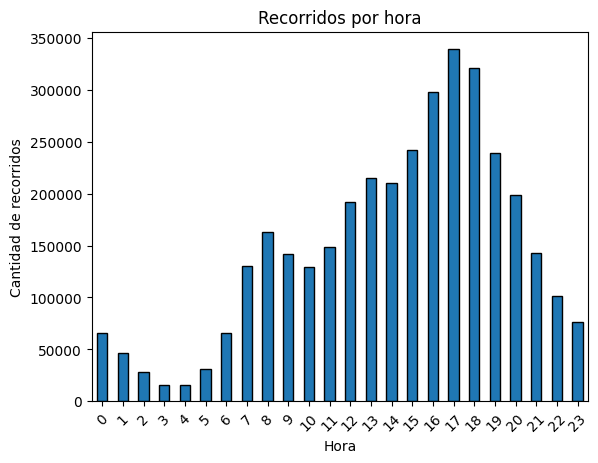

In [134]:
# Recorridos por hora
rides_df['hora_origen_recorrido'] = pd.to_datetime(rides_df['fecha_origen_recorrido'], format='%H:%M:%S', errors='coerce').dt.hour
rides_df['hora_origen_recorrido'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Recorridos por hora')
plt.xlabel('Hora')
plt.ylabel('Cantidad de recorridos')
plt.xticks(rotation=45)
plt.show()

##### Exploración de estaciones

In [135]:
# Estaciones más usadas para iniciar recorridos
origin_top_stations = rides_df['nombre_estacion_origen'].value_counts().sort_values(ascending=False).head(5)
print(origin_top_stations)

nombre_estacion_origen
147 - Constitución           38284
014 - Pacifico               37594
368 - PLAZA DE LA SHOÁ       37201
005 - Plaza Italia           34547
001 - FACULTAD DE DERECHO    30955
Name: count, dtype: int64


In [136]:
# Estaciones más usadas para terminar recorridos
destination_top_stations = rides_df['nombre_estacion_destino'].value_counts().sort_values(ascending=False).head(5)
print(destination_top_stations)

nombre_estacion_destino
147 - Constitución           38363
368 - PLAZA DE LA SHOÁ       37425
014 - Pacifico               37278
005 - Plaza Italia           34607
001 - FACULTAD DE DERECHO    30897
Name: count, dtype: int64


In [137]:
# Mapa
caba_coords = [-34.6037, -58.3816]
m = folium.Map(location=caba_coords, zoom_start=13, tiles='OpenStreetMap')

# Origenes
cols_ori = ['nombre_estacion_origen', 'lat_estacion_origen', 'long_estacion_origen']
coords = (rides_df[rides_df['nombre_estacion_origen'].isin(origin_top_stations.index)]
          [cols_ori].dropna().drop_duplicates('nombre_estacion_origen'))

for _, r in coords.iterrows():
    nombre, lat, lon = r['nombre_estacion_origen'], float(r['lat_estacion_origen']), float(r['long_estacion_origen'])
    
    folium.Marker([lat, lon], popup=nombre, tooltip=nombre,
                  icon=folium.Icon(color='green', icon='play', prefix='fa')).add_to(m)
    
    folium.Marker([lat, lon],
        icon=folium.DivIcon(
            html=f'<div style="transform:translate(12px,-18px);'
             'background:#fff;border:1px solid rgba(0,0,0,.2);border-radius:4px;'
             'padding:2px 6px;font-size:12px;font-weight:700;color:#000;'
             'display:inline-block;max-width:180px;white-space:nowrap;'
             'overflow:hidden;text-overflow:ellipsis;pointer-events:none;">'
             f'{nombre}</div>'
        )
    ).add_to(m)

m.save('mapa_caba_top_estaciones_orig.html')

In [138]:
# Mapa
caba_coords = [-34.6037, -58.3816]
m = folium.Map(location=caba_coords, zoom_start=13, tiles='OpenStreetMap')

# Destinos
cols_dest = ['nombre_estacion_destino', 'lat_estacion_destino', 'long_estacion_destino']
coords_dest = (rides_df[rides_df['nombre_estacion_destino'].isin(destination_top_stations.index)]
               [cols_dest].dropna().drop_duplicates('nombre_estacion_destino'))

for _, r in coords_dest.iterrows():
    nombre, lat, lon = r['nombre_estacion_destino'], float(r['lat_estacion_destino']), float(r['long_estacion_destino'])
    folium.Marker([lat, lon], popup=nombre, tooltip=nombre,
                  icon=folium.Icon(color='red', icon='flag-checkered', prefix='fa')).add_to(m)
    folium.Marker([lat, lon],
        icon=folium.DivIcon(
            html=f'<div style="transform:translate(12px,-18px);'
             'background:#fff;border:1px solid rgba(0,0,0,.2);border-radius:4px;'
             'padding:2px 6px;font-size:12px;font-weight:700;color:#000;'
             'display:inline-block;max-width:180px;white-space:nowrap;'
             'overflow:hidden;text-overflow:ellipsis;pointer-events:none;">'
             f'{nombre}</div>'
        )
    ).add_to(m)

m.save('mapa_caba_top_estaciones_dest.html')

In [139]:
# Estaciones menos usadas para iniciar recorridos
origin_bottom_stations = rides_df['nombre_estacion_origen'].value_counts().sort_values(ascending=True).head(5)
print(origin_bottom_stations)

nombre_estacion_origen
040 - HERRERA    258
125 - BILBAO     268
327 - IBERA      331
321 - EZEIZA     360
326 - PICO       385
Name: count, dtype: int64


In [140]:
# Estaciones menos usadas para terminar recorridos
destination_bottom_stations = rides_df['nombre_estacion_destino'].value_counts().sort_values(ascending=True).head(5)
print(destination_bottom_stations)

nombre_estacion_destino
-- CDO Chacarita -- (Temporal)      2
363 - Udaondo                       9
291 - REPARACION DE K7             11
125 - BILBAO                      272
040 - HERRERA                     283
Name: count, dtype: int64


##### Exploración de usuarios de recorridos

In [141]:
rides_df['id_usuario'] = rides_df['id_usuario'].astype('Int64')

In [142]:
# Usuario que más recorridos hizo
top_user = rides_df['id_usuario'].value_counts().idxmax()
print(f"Usuario que más recorridos hizo: ID {top_user} con {rides_df['id_usuario'].value_counts().max()} recorridos")

Usuario que más recorridos hizo: ID 844251 con 8488 recorridos


##### Exploración de modelo de bicicleta
No aporta información significativa

In [143]:
rides_df['modelo_bicicleta'].value_counts()

modelo_bicicleta
FIT       2583213
ICONIC     977191
Name: count, dtype: int64

##### Exploración de géneros (en recorridos, algunos no tienen género asociado)

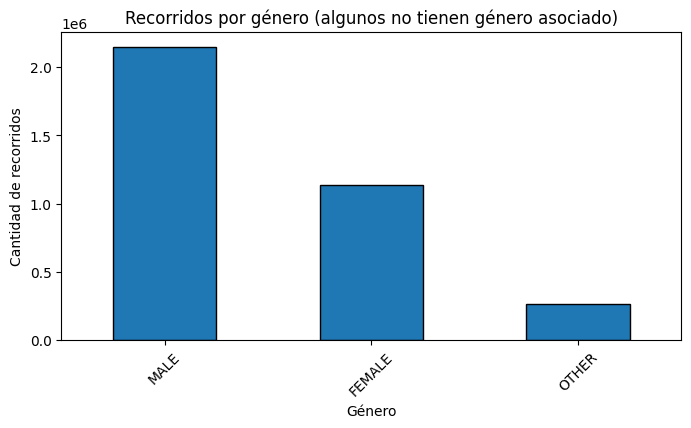

In [144]:
# Bar chart de recorridos por genero
plt.figure(figsize=(8, 4))
rides_df['genero'].value_counts().plot(kind='bar', edgecolor='black')
plt.title('Recorridos por género (algunos no tienen género asociado)')
plt.xlabel('Género')
plt.ylabel('Cantidad de recorridos')
plt.xticks(rotation=45)
plt.show()

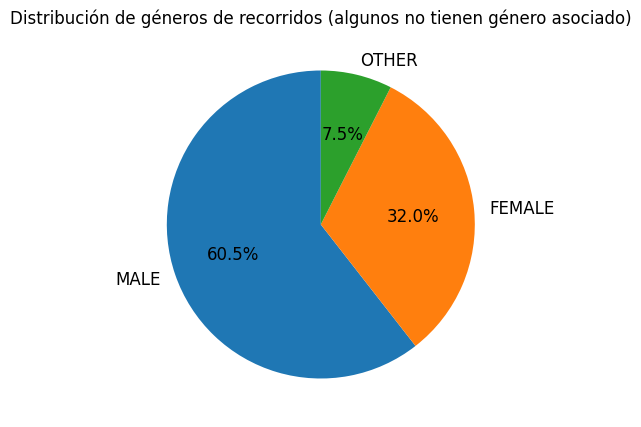

In [145]:
# Pie chart de generos de los recorridos (algunos recorridos no tienen género asociado)
plt.figure(figsize=(5, 5))
rides_df['genero'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, fontsize=12)
plt.title('Distribución de géneros de recorridos (algunos no tienen género asociado)')
plt.ylabel('')
plt.show()

### Merge datasets usuarios + recorridos?

In [146]:
# Cuántos usuarios de rides_df están en users_df?
np.isin(rides_df['id_usuario'], users_df['id_usuario']).sum()

np.int64(1136610)

No resulta útil unir ambos datasets, ya que más de un millón de recorridos no tienen `id_usuario` asociado.<br>
Esto se debe a que el dataset de usuarios 2024 solo incluye altas realizadas en ese año, mientras que el dataset de recorridos 2024 también contiene viajes de usuarios que se registraron en años anteriores.<br>
<br>
**Por eso se van a tratar ambos datasets de forma separada.**

# Split de los datasets

### Estrategia de partición para el dataset de recorridos

Se realiza un **split aleatorio** en lugar de un split temporal, por las siguientes razones:
- Datos únicamente de 2024 (un solo año)
- Existe fuerte estacionalidad intra-anual (más viajes en primavera/verano, menos en invierno)
- No se cuenta con datos históricos de años anteriores o posteriores

**Justificación del split aleatorio:**
1. **Evita sesgo estacional**: Un split temporal (por ej.: 80% primeros meses → 20% últimos meses) haría que train y test tengan distribuciones estacionales diferentes, sesgando la evaluación.

2. **Representatividad**: El shuffle garantiza que tanto train como test contengan datos de todas las estaciones del año, manteniendo la distribución temporal.

3. **No hay generalización temporal**: Como solo tenemos un año, no podemos evaluar predicción hacia el futuro (2025 en adelante). El objetivo en este dataset es evaluar la capacidad de generalización del modelo sobre patrones intra-anuales, no sobre datos futuros desconocidos.

<br>

**Nota: Si en el futuro se incorporan datos de múltiples años, sería apropiado usar un split temporal (entrenar con años 2022-2023, testear con 2024) para evaluar capacidad predictiva sobre el futuro, y evitando data leakage.**

In [147]:
TEST_PROPORTION = 0.2  # 20% para test
RANDOM_SEED = 25

In [148]:
users_df_train, users_df_test = train_test_split(users_df,
                                                 test_size=TEST_PROPORTION,
                                                 shuffle=True,
                                                 random_state=RANDOM_SEED)

In [149]:
rides_df_train, rides_df_test = train_test_split(rides_df,
                                                 test_size=TEST_PROPORTION,
                                                 random_state=RANDOM_SEED)

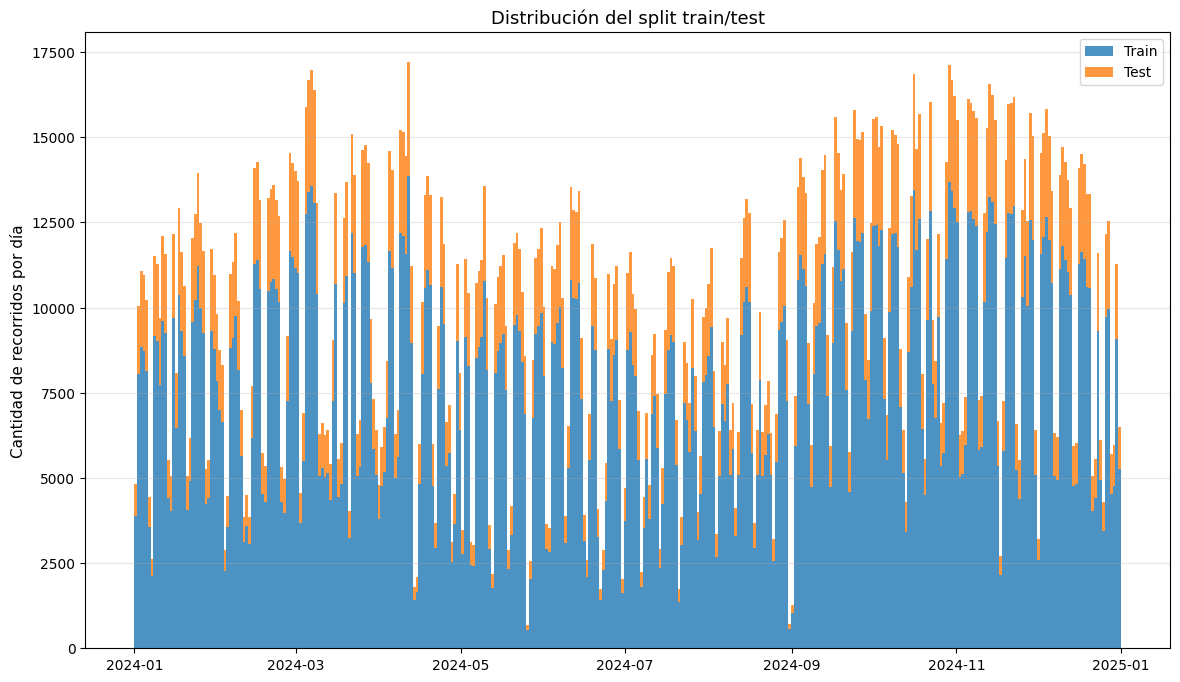

In [150]:
# Verificación del split
fig, ax = plt.subplots(figsize=(14, 8))

ax.hist([rides_df_train['fecha_origen_recorrido'], rides_df_test['fecha_origen_recorrido']], 
         bins=365,  # Un bin por día
         stacked=True,
         label=['Train', 'Test'],
         color=['#1f77b4', '#ff7f0e'],
         alpha=0.8,
         edgecolor='none')

ax.set_ylabel('Cantidad de recorridos por día', fontsize=11)
ax.set_title('Distribución del split train/test', 
              fontsize=13)
ax.legend(loc='upper right', fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.show()

# Análisis y tratamiento de faltantes

### Usuarios

In [151]:
users_df_train.isna().sum()

id_usuario        0
genero_usuario    0
edad_usuario      0
fecha_alta        0
hora_alta         0
fecha_alta_dt     0
hora_alta_dt      0
dia_semana        0
dtype: int64

In [152]:
users_df_train.dia_semana.unique()  # Check que los días sean datos válidos

array(['Saturday', 'Tuesday', 'Wednesday', 'Friday', 'Sunday', 'Monday',
       'Thursday'], dtype=object)

In [153]:
users_df_train.genero_usuario.unique()  # Check que los géneros sean datos válidos

array(['FEMALE', 'MALE', 'OTHER'], dtype=object)

In [154]:
users_df_train['fecha_alta_dt'].dt.year.unique()  # Check que los años sean datos válidos

array([2024], dtype=int32)

**No hay datos faltantes en el dataset de usuarios**

### Recorridos

In [155]:
rides_df_train.isna().sum()

id_recorrido                      0
duracion_recorrido                0
fecha_origen_recorrido            0
id_estacion_origen                0
nombre_estacion_origen            0
direccion_estacion_origen         0
long_estacion_origen              0
lat_estacion_origen               0
fecha_destino_recorrido        2700
id_estacion_destino               0
nombre_estacion_destino           0
direccion_estacion_destino        0
long_estacion_destino             0
lat_estacion_destino              0
id_usuario                        0
modelo_bicicleta                  0
genero                         9543
duracion_recorrido_min            0
mes                               0
dia_semana_origen_recorrido       0
hora_origen_recorrido             0
dtype: int64

In [156]:
mask_duration_zero = rides_df_train["duracion_recorrido"] == 0
print(f"Recorridos con duración 0: {mask_duration_zero.sum()}")

mask_origin_neq_destination = rides_df_train["id_estacion_origen"] != rides_df_train["id_estacion_destino"]
mask_origin_eq_destination = rides_df_train["id_estacion_origen"] == rides_df_train["id_estacion_destino"]

mask_duration_zero_and_origin_neq_destination = mask_duration_zero & mask_origin_neq_destination
mask_duration_zero_and_origin_eq_destination = mask_duration_zero & mask_origin_eq_destination

print(f"Recorridos con duración 0 y origen distinto a destino: {mask_duration_zero_and_origin_neq_destination.sum()}")
print(f"Recorridos con duración 0 y origen igual a destino: {mask_duration_zero_and_origin_eq_destination.sum()}")

mask_duration_zero_and_origin_eq_destination_and_same_date = mask_duration_zero_and_origin_eq_destination & (rides_df_train["fecha_origen_recorrido"] == rides_df_train["fecha_destino_recorrido"])
mask_duration_zero_and_origin_eq_destination_and_different_date = mask_duration_zero_and_origin_eq_destination & (rides_df_train["fecha_origen_recorrido"] != rides_df_train["fecha_destino_recorrido"])
print(f"Recorridos con duración 0, origen igual a destino y misma fecha de origen y destino: {mask_duration_zero_and_origin_eq_destination_and_same_date.sum()}")
print(f"Recorridos con duración 0, origen igual a destino y distinta fecha de origen y destino: {mask_duration_zero_and_origin_eq_destination_and_different_date.sum()}")

Recorridos con duración 0: 30149
Recorridos con duración 0 y origen distinto a destino: 25156
Recorridos con duración 0 y origen igual a destino: 4993
Recorridos con duración 0, origen igual a destino y misma fecha de origen y destino: 4928
Recorridos con duración 0, origen igual a destino y distinta fecha de origen y destino: 65


**Podemos considerar que los siguientes registros de duración de recorridos son faltantes:**
- **Duración 0 y origen distinto a destino**: la bicicleta se movió de estación, el tiempo de viaje no puede ser 0
- **Duración 0 y origen igual a destino, pero distinta fecha de origen que destino**: la bicicleta viajó y volvió a la misma estación, el tiempo de viaje no puede ser 0

In [157]:
rides_df_train[mask_duration_zero_and_origin_neq_destination]["mes"].value_counts().sort_index()

mes
1     1157
2     2230
3     2436
4     2036
5     1788
6     1475
7     1285
8     1609
9     2283
10    2114
11    2918
12    3825
Name: count, dtype: int64

In [158]:
print(f"Proporción de recorridos con duración 0 y origen distinto a destino: {mask_duration_zero_and_origin_neq_destination.sum() / len(rides_df_train) * 100:.3f} %")

Proporción de recorridos con duración 0 y origen distinto a destino: 0.883 %


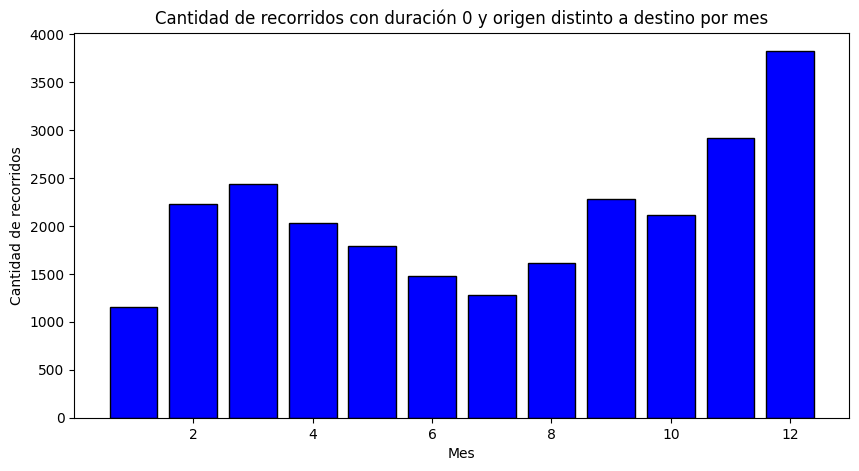

In [159]:
# Bar chart de cantidad de recorridos con duración 0 y origen distinto a destino por mes
plt.figure(figsize=(10, 5))
month_counts = rides_df_train[mask_duration_zero_and_origin_neq_destination]['mes'].value_counts().sort_index()
plt.bar(month_counts.index, month_counts.values, color='blue', edgecolor='black')
plt.title('Cantidad de recorridos con duración 0 y origen distinto a destino por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de recorridos')
plt.show()

**Los recorridos con duración 0 y origen distinto a destino, no se distribuyen con un patrón específico sino que siguen el comportamiento del número de recorridos totales por mes, con lo cual parece que estos registros faltan de forma completamente aleatoria (MCAR).**

In [160]:
rides_df_train[mask_duration_zero_and_origin_eq_destination_and_different_date]["mes"].value_counts().sort_index()

mes
11    25
12    40
Name: count, dtype: int64

In [161]:
print(f"Proporción de recorridos con duración 0 y origen igual a destino y distinta fecha de origen que destino: {mask_duration_zero_and_origin_eq_destination_and_different_date.sum() / len(rides_df_train) * 100:.3f} %")

Proporción de recorridos con duración 0 y origen igual a destino y distinta fecha de origen que destino: 0.002 %


**Los recorridos con duración 0, origen igual a destino pero distinta fecha de origen que destino no se distribuyen de forma random, sino que solo se dan en noviembre y diciembre, probablemente estén relacionados con los faltantes que están más adelante en este análisis.**

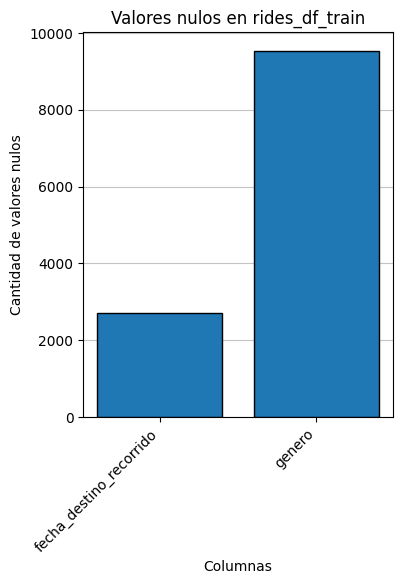

In [162]:
cols = ["fecha_destino_recorrido", "genero"]

plt.figure(figsize=(4, 5))
plt.grid(axis='y', alpha=0.75)
plt.bar(cols, rides_df_train[cols].isnull().sum(), align='center', zorder=2, edgecolor='black')
plt.xticks(rotation=45, ha='right')
plt.title('Valores nulos en rides_df_train')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.show()

##### Faltantes de fecha_destino_recorrido

In [163]:
mask_date_na = rides_df_train["fecha_destino_recorrido"].isna()
rides_df_train[mask_date_na].head(5)

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,duracion_recorrido_min,mes,dia_semana_origen_recorrido,hora_origen_recorrido
923079,24181455,0,2024-12-05 17:55:10,449,352 - San Jose de Flores,Av. Rivadavia 6955,-58.463297,-34.628836,NaN,509,386 - VELEZ SARSFIELD,Av. Carrasco 214,-58.489810,-34.633638,67340,ICONIC,MALE,0.0,12,Thursday,17
452438,24362617,0,2024-12-18 21:13:51,183,183 - VIRREY CEVALLOS,Mexico 1652,-58.389973,-34.615699,NaN,474,224 - BAIGORRIA,Baigorria 4101,-58.503020,-34.610892,709592,ICONIC,MALE,0.0,12,Wednesday,21
1073307,24231281,0,2024-12-09 20:31:15,61,098 - BENITO JUAREZ,Benito Juarez 2231,-58.505177,-34.618927,NaN,197,197 - PLAZA CIUDAD DE UDINE,Mercedes 1480,-58.493044,-34.620998,1197740,FIT,FEMALE,0.0,12,Monday,20
1708802,24002555,0,2024-11-22 21:16:05,118,118 - MEXICO,Saavedra & Mexico,-58.402653,-34.617020,NaN,183,183 - VIRREY CEVALLOS,Mexico 1652,-58.389973,-34.615699,1049513,FIT,MALE,0.0,11,Friday,21
722927,24282718,0,2024-12-12 22:20:04,213,136 - Acevedo,Acevedo y Padilla,-58.442685,-34.599659,NaN,449,352 - San Jose de Flores,Av. Rivadavia 6955,-58.463297,-34.628836,751098,FIT,MALE,0.0,12,Thursday,22


In [164]:
rides_df_train[mask_date_na]["mes"].value_counts().sort_index()

mes
11     911
12    1789
Name: count, dtype: int64

**Indicios de que el sistema funcionó mal en algunos dias de noviembre y diciembre.**

In [165]:
print(f"Proporción de recorridos con fecha destino nula: {mask_date_na.sum() / len(rides_df_train) * 100:.3f} %")

Proporción de recorridos con fecha destino nula: 0.095 %


In [166]:
mask_nov = rides_df_train["mes"] == 11
mask_dec = rides_df_train["mes"] == 12
mask_nov_dec = mask_nov | mask_dec
mask_nov_na = mask_nov & mask_date_na
mask_dec_na = mask_dec & mask_date_na

In [167]:
rides_df_train[mask_nov_na]

,id_recorrido,duracion_recorrido,fecha_origen_recorrido,id_estacion_origen,nombre_estacion_origen,direccion_estacion_origen,long_estacion_origen,lat_estacion_origen,fecha_destino_recorrido,id_estacion_destino,nombre_estacion_destino,direccion_estacion_destino,long_estacion_destino,lat_estacion_destino,id_usuario,modelo_bicicleta,genero,duracion_recorrido_min,mes,dia_semana_origen_recorrido,hora_origen_recorrido
1708802,24002555,0,2024-11-22 21:16:05,118,118 - MEXICO,Saavedra & Mexico,-58.402653,-34.617020,NaN,183,183 - VIRREY CEVALLOS,Mexico 1652,-58.389973,-34.615699,1049513,FIT,MALE,0.0,11,Friday,21
1790058,24002606,0,2024-11-22 21:20:10,208,145 - RAVIGNANI,EMILIO RAVIGNANI 1802,-58.438404,-34.580716,NaN,99,099 - Malabia,780 Malabia & Loyola,-58.435408,-34.596096,1224704,FIT,MALE,0.0,11,Friday,21
1827770,24031179,0,2024-11-25 19:43:09,316,205 - SAN MARTIN,1471 Cucha Cucha,-58.453475,-34.605567,NaN,281,350 - Plaza Irlanda,Av. Gaona 2200,-58.458315,-34.613778,1162255,FIT,FEMALE,0.0,11,Monday,19
1659379,24050491,0,2024-11-26 21:53:56,65,065 - Julián Álvarez,3822 Guemes,-58.415787,-34.587312,NaN,242,103 - MALBA,Av. Pres. Figueroa Alcorta 3451,-58.403984,-34.576949,998977,ICONIC,FEMALE,0.0,11,Tuesday,21
2807471,23779551,0,2024-11-07 20:26:25,329,100 - Plaza Gurruchaga,Gurruchaga 1084,-58.435066,-34.593110,NaN,291,244 - UADE,Lima 750,-58.381627,-34.617247,1021892,FIT,MALE,0.0,11,Thursday,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457363,24102163,0,2024-11-29 22:16:15,163,163 - ONCE II,Bartolome Mitre & Av. Puyrredon,-58.406431,-34.609566,NaN,194,194 - PERÓN Y ACUÑA DE FIGUEROA,3997 TTE. GENERAL JUAN DOMINGO PERON,-58.422463,-34.606076,816666,FIT,OTHER,0.0,11,Friday,22
1805173,24049208,0,2024-11-26 20:19:34,476,279 - PLAZA MONTE CASTRO,Gualeguaychú 1900,-58.498525,-34.618292,NaN,455,039 - Plaza Don Bosco,Elpidio Gonzalez 5181,-58.508050,-34.626520,596530,FIT,OTHER,0.0,11,Tuesday,20
1818433,24010944,0,2024-11-23 23:40:26,543,139 - CASA ROSADA,Av. Alicia Moreau de Justo 861,-58.366741,-34.607480,NaN,202,001 - FACULTAD DE DERECHO,Av. Pres. Figueroa Alcorta 2120,-58.390602,-34.583749,1113786,FIT,FEMALE,0.0,11,Saturday,23
1553177,24101483,0,2024-11-29 21:11:11,9,009 - Parque Las Heras,"2300 Diaz, Cnel. Av. & French",-58.407741,-34.585443,NaN,50,050 - Hospital Rivadavia,2516 Pereyra Lucena,-58.401080,-34.583735,1162316,FIT,MALE,0.0,11,Friday,21


In [168]:
mask_duration_zero_and_nov_na = mask_nov_na & mask_duration_zero
print(f"Recorridos en noviembre con duración 0 y fecha destino nula: {mask_duration_zero_and_nov_na.sum()}")

mask_duration_zero_and_dec_na = mask_dec_na & mask_duration_zero
print(f"Recorridos en diciembre con duración 0 y fecha destino nula: {mask_duration_zero_and_dec_na.sum()}")

Recorridos en noviembre con duración 0 y fecha destino nula: 911
Recorridos en diciembre con duración 0 y fecha destino nula: 1789


**Se observa que todos los registros faltantes de `fecha_destino_recorrido` también tienen duración 0**

In [169]:
pd.to_datetime(rides_df_train["fecha_origen_recorrido"], errors='coerce').dt.year.unique()  # Check que los años sean datos válidos

array([2024], dtype=int32)

In [170]:
pd.to_datetime(rides_df_train['fecha_destino_recorrido'], errors='coerce').dt.year.unique()  # Check que los años sean datos válidos

array([2024.,   nan, 2025.])

##### Faltantes de genero

In [171]:
mask_gen_na = rides_df_train["genero"].isna()
print(f"Recorridos con género faltante: {mask_gen_na.sum()}")

Recorridos con género faltante: 9543


In [172]:
print(f"Proporción de recorridos con género faltante: {mask_gen_na.sum() / len(rides_df_train) * 100:.3f} %")

Proporción de recorridos con género faltante: 0.335 %


In [173]:
rides_df_train[mask_gen_na]["mes"].value_counts().sort_index()

mes
1     778
2     671
3     853
4     756
5     861
6     723
7     720
8     765
9     871
10    912
11    830
12    803
Name: count, dtype: int64

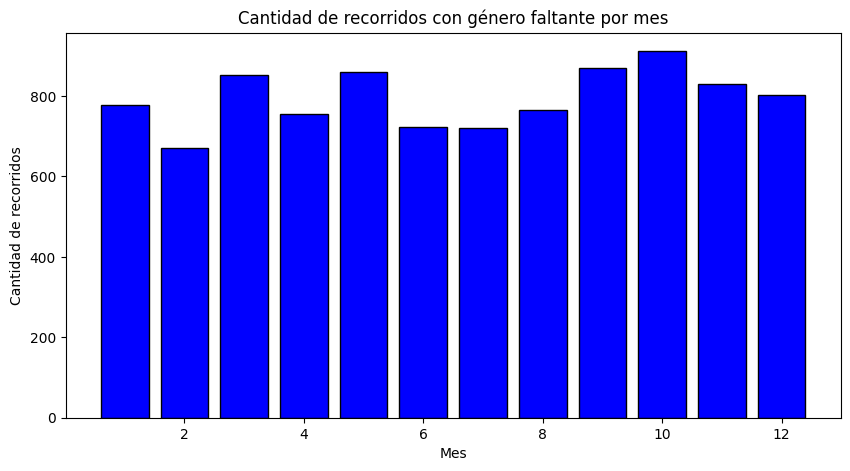

In [174]:
# Bar chart de cantidad de recorridos con género faltante por mes
plt.figure(figsize=(10, 5))
month_counts = rides_df_train[mask_gen_na]['mes'].value_counts().sort_index()
plt.bar(month_counts.index, month_counts.values, color='blue', edgecolor='black')
plt.title('Cantidad de recorridos con género faltante por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de recorridos')
plt.show()

**Los recorridos con género faltante, no se distribuyen con un patrón específico sino que siguen el comportamiento del número de recorridos totales por mes, con lo cual parece que estos registros faltan de forma completamente aleatoria (MCAR).**

### Estrategias para tratamiento de faltantes
- Recorridos con duración 0 y origen distinto a destino faltan de forma completamente aleatoria (MCAR) y representan un 0.88 % de los registros de training -> **Aplicamos eliminación de fila**
<br>
<br>
- Recorridos con duración 0 y origen igual a destino y distinta fecha de origen que destino no son MCAR, pero igualmente representan un 0.002 % -> **Aplicamos eliminación de fila**
<br>
<br>
- Recorridos con fecha destino nula no son MCAR, pero igualmente representan un 0.095 % de los registros de training -> **Aplicamos eliminación de fila**
<br>
<br>
- Recorridos sin género faltan de forma completamente aleatoria (MCAR) y representan un 0.335 % de los registros de training -> **Aplicamos eliminación de fila**

In [175]:
# No se eliminan datos en users_df_train
users_df_train_cleaned = users_df_train.copy()

In [176]:
mask_for_deletion = mask_duration_zero_and_origin_neq_destination | mask_duration_zero_and_origin_eq_destination_and_different_date | mask_date_na | mask_gen_na
print(f"Total de recorridos a eliminar: {mask_for_deletion.sum()} ({mask_for_deletion.sum() / len(rides_df_train) * 100:.3f} % del total)")
rides_df_train_cleaned = rides_df_train[~mask_for_deletion].copy()
rides_df_train_cleaned.reset_index(drop=True, inplace=True)

Total de recorridos a eliminar: 34680 (1.218 % del total)


# Análisis y tratamiento de outliers

### Usuarios

Se vio Más arriba en la etapa exploratoria que `edad_usuario` contiene muchos valores atípicos, incluso algunos por encima de los 1000 años.<br>
Probablemente se debió a un error al ingresar el dato en el sistema, al momento del alta de usuario.<br>
Los términos y condiciones del sistema contemplan usuarios con edad mínima 16 años.

In [177]:
# Edades < 16
mask_age_lt_16 = users_df_train_cleaned["edad_usuario"] < 16
print(f"Usuarios con edad < 16: {mask_age_lt_16.sum()} ({mask_age_lt_16.sum() / len(users_df_train_cleaned) * 100:.3f} % del total)")
users_df_train_cleaned[mask_age_lt_16]

Usuarios con edad < 16: 8 (0.005 % del total)


,id_usuario,genero_usuario,edad_usuario,fecha_alta,hora_alta,fecha_alta_dt,hora_alta_dt,dia_semana
157229,1087178,MALE,15,2024-01-05,23:09:04,2024-01-05,23:09:04,Friday
132348,1257721,OTHER,5,2024-11-24,14:02:31,2024-11-24,14:02:31,Sunday
116314,1225229,MALE,5,2024-10-09,11:42:12,2024-10-09,11:42:12,Wednesday
94405,1083783,MALE,4,2024-01-01,12:05:43,2024-01-01,12:05:43,Monday
73194,1138759,MALE,5,2024-04-02,08:47:40,2024-04-02,08:47:40,Tuesday
124842,1192893,MALE,15,2024-08-16,00:07:41,2024-08-16,00:07:41,Friday
44659,1200706,MALE,4,2024-09-04,19:32:10,2024-09-04,19:32:10,Wednesday
49179,1216711,OTHER,5,2024-09-28,10:55:52,2024-09-28,10:55:52,Saturday


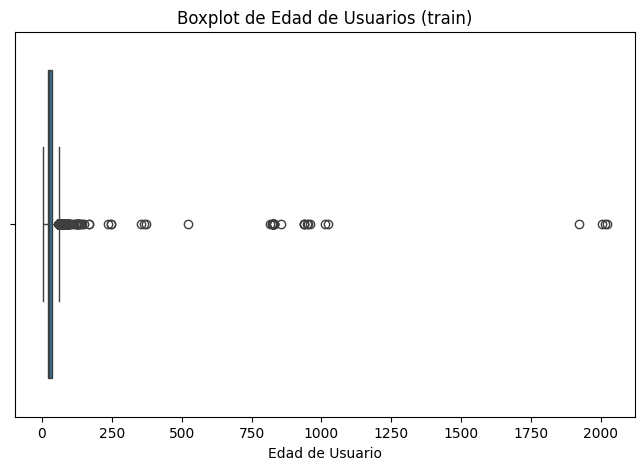

Outliers en edad_usuario: 2663 (1.689 % del total)
Valores de outliers: 2021 (máximo), 62 (mínimo)
Conteo de valores de outliers:
62: 368
63: 309
64: 249
65: 220
66: 184
67: 182
68: 153
71: 119
69: 111
72: 105
70: 98
73: 78
75: 66
74: 59
77: 50
76: 49
78: 40
79: 32
80: 29
83: 18
81: 18
82: 15
84: 10
86: 9
85: 9
88: 5
89: 5
90: 4
93: 4
87: 4
828: 4
91: 4
830: 3
938: 3
102: 2
124: 2
123: 2
92: 2
247: 2
129: 2
960: 1
827: 1
825: 1
2004: 1
236: 1
815: 1
139: 1
98: 1
2016: 1
829: 1
952: 1
353: 1
94: 1
138: 1
127: 1
373: 1
855: 1
824: 1
1012: 1
107: 1
170: 1
168: 1
149: 1
367: 1
113: 1
96: 1
948: 1
524: 1
142: 1
128: 1
2021: 1
826: 1
131: 1
1022: 1
1921: 1


In [178]:
# Detectar outliers en edad_usuario usando método de IQR
Q1 = users_df_train_cleaned['edad_usuario'].quantile(0.25)
Q3 = users_df_train_cleaned['edad_usuario'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_mask = (users_df_train_cleaned['edad_usuario'] < lower_bound) | (users_df_train_cleaned['edad_usuario'] > upper_bound)
outliers = users_df_train_cleaned[outliers_mask]

plt.figure(figsize=(8, 5))
sns.boxplot(x=users_df_train_cleaned['edad_usuario'])
plt.title('Boxplot de Edad de Usuarios (train)')
plt.xlabel('Edad de Usuario')
plt.show()

print(f"Outliers en edad_usuario: {outliers.shape[0]} ({outliers.shape[0] / users_df_train_cleaned.shape[0] * 100:.3f} % del total)")
print(f"Valores de outliers: {outliers['edad_usuario'].max()} (máximo), {outliers['edad_usuario'].min()} (mínimo)")
print(f"Conteo de valores de outliers:")
for valor, cantidad in outliers['edad_usuario'].value_counts().items():
    print(f"{valor}: {cantidad}")

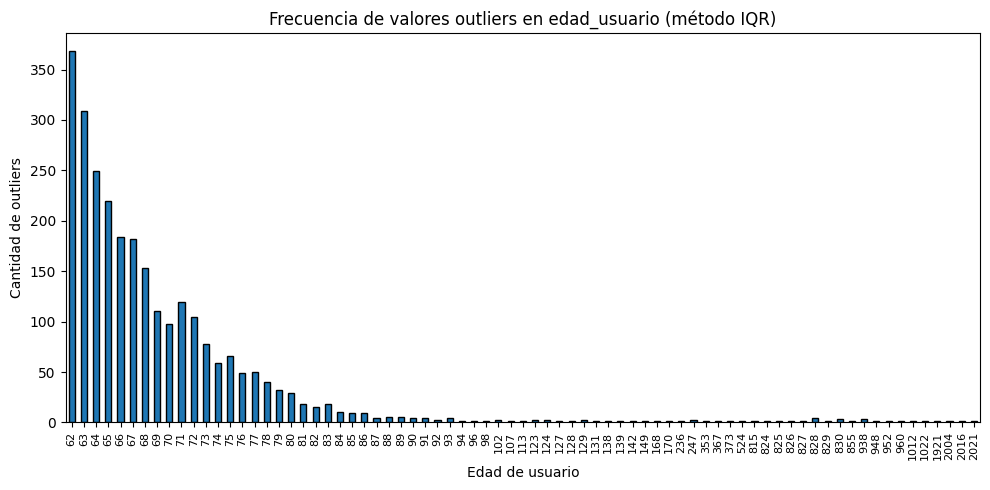

In [179]:
plt.figure(figsize=(10, 5))
outliers['edad_usuario'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Frecuencia de valores outliers en edad_usuario (método IQR)')
plt.xlabel('Edad de usuario')
plt.ylabel('Cantidad de outliers')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

El método de IQR parece tomar valores perfectamente posibles (62 a 98) como outliers.<br>
Esto se debe a que este método funciona mejor para distribuciones relativamente simétricas, y `edad_usuario` no lo es, es una distribución asimétrica con cola pesada a derecha.

In [180]:
# Outliers en edad_usuario usando método de desvio estandar (Z-score)
z_scores = np.abs(stats.zscore(users_df_train_cleaned['edad_usuario']))
z_threshold = 3  # Umbral típico
outliers_z = users_df_train_cleaned[z_scores > z_threshold]
print(f"Outliers detectados por Z-score en edad_usuario: {outliers_z.shape[0]} ({outliers_z.shape[0] / users_df_train_cleaned.shape[0] * 100:.3f} % del total)")
outliers_z['edad_usuario'].value_counts().sort_index()

Outliers detectados por Z-score en edad_usuario: 92 (0.058 % del total)


edad_usuario
86      9
87      4
88      5
89      5
90      4
91      4
92      2
93      4
94      1
96      1
98      1
102     2
107     1
113     1
123     2
124     2
127     1
128     1
129     2
131     1
138     1
139     1
142     1
149     1
168     1
170     1
236     1
247     2
353     1
367     1
373     1
524     1
815     1
824     1
825     1
826     1
827     1
828     4
829     1
830     3
855     1
938     3
948     1
952     1
960     1
1012    1
1022    1
1921    1
2004    1
2016    1
2021    1
Name: count, dtype: int64

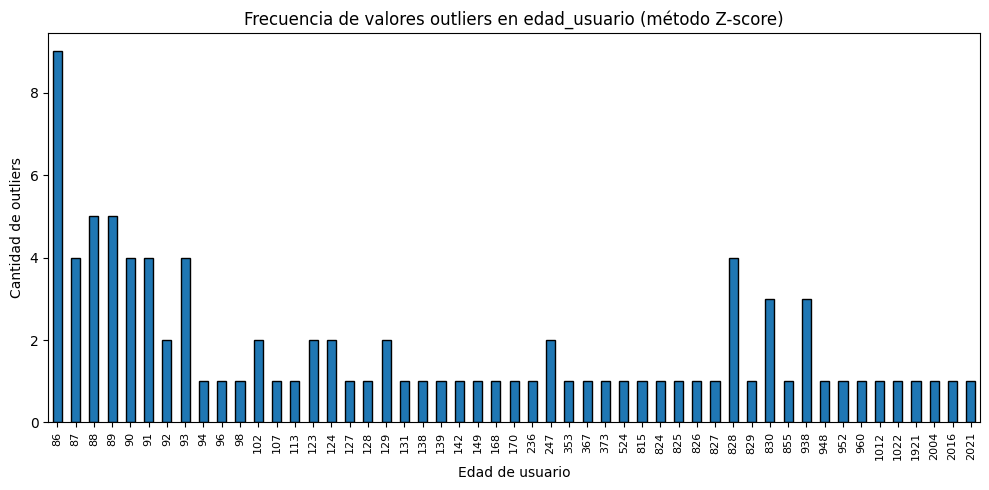

In [181]:
# Plot de outliers detectados por Z-score
plt.figure(figsize=(10, 5))
outliers_z['edad_usuario'].value_counts().sort_index().plot(kind='bar', edgecolor='black')
plt.title('Frecuencia de valores outliers en edad_usuario (método Z-score)')
plt.xlabel('Edad de usuario')
plt.ylabel('Cantidad de outliers')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

El método de desvio estandar (Z-score) parece funcionar mejor que el método de IQR, pero igualmente funciona mejor para distribuciones relativamente simétricas, y `edad_usuario` no lo es, es una distribución asimétrica con cola pesada a derecha.

In [182]:
# Winsorización de edades en users
def winsorize_by_quantiles(series, lower_quantile=0.01, upper_quantile=0.99):
    lower_bound = series.quantile(lower_quantile)
    upper_bound = series.quantile(upper_quantile)
    return series.clip(lower=lower_bound, upper=upper_bound)

def winsorize_by_values(series, lower_value=16, upper_value=100):
    return series.clip(lower=lower_value, upper=upper_value)

users_df_train_cleaned['edad_usuario_winsorized'] = winsorize_by_values(users_df_train_cleaned['edad_usuario'])
print("Edades después de winsorización:")
print(users_df_train_cleaned['edad_usuario_winsorized'].describe())

Edades después de winsorización:
count    157663.000000
mean         30.592187
std          11.657236
min          16.000000
25%          21.000000
50%          27.000000
75%          37.000000
max         100.000000
Name: edad_usuario_winsorized, dtype: float64


In [183]:
users_df_train_cleaned['edad_usuario_winsorized'].value_counts().sort_index()

edad_usuario_winsorized
16        14
17        13
18     11996
19     10566
20      9221
       ...  
93         4
94         1
96         1
98         1
100       52
Name: count, Length: 82, dtype: int64

El método de winsorización genera una gran cantidad de valores en el 'tope' superior de los datos, sesgando el análisis.

In [184]:
# Reemplazo de valores con edad mayor a 100 y menores a 16 por la mediana
median_age = users_df_train_cleaned['edad_usuario'].median()
users_df_train_cleaned['edad_usuario_cleaned_median'] = users_df_train_cleaned['edad_usuario'].apply(lambda x: median_age if x > 100 or x < 16 else x)
print("Edades después de reemplazo de valores > 100 y < 16 por la mediana:")
print(users_df_train_cleaned['edad_usuario_cleaned_median'].describe())

Edades después de reemplazo de valores > 100 y < 16 por la mediana:
count    157663.000000
mean         30.568669
std          11.588608
min          16.000000
25%          21.000000
50%          27.000000
75%          37.000000
max          98.000000
Name: edad_usuario_cleaned_median, dtype: float64


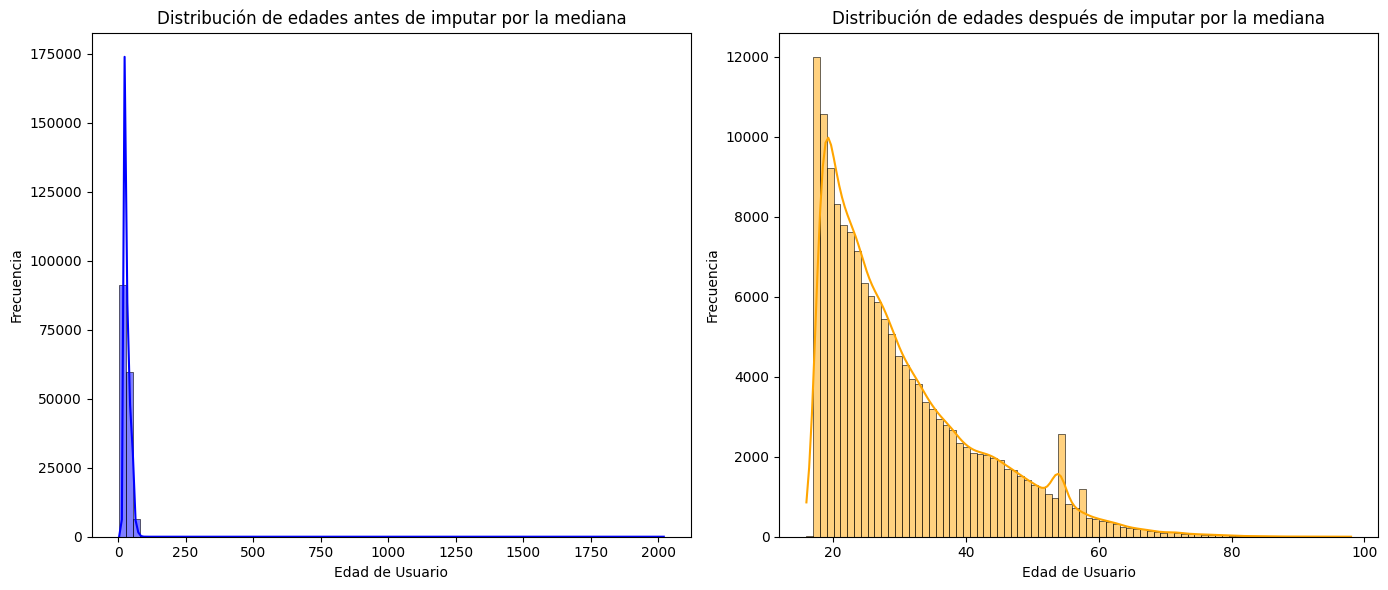

In [185]:
# Bar chart de edades antes y después de imputar edades >100 por la mediana
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(users_df_train_cleaned['edad_usuario'], bins=80, kde=True, color='blue')
plt.title('Distribución de edades antes de imputar por la mediana')
plt.xlabel('Edad de Usuario')
plt.ylabel('Frecuencia')
plt.subplot(1, 2, 2)
sns.histplot(users_df_train_cleaned['edad_usuario_cleaned_median'], bins=80, kde=True, color='orange')
plt.title('Distribución de edades después de imputar por la mediana')
plt.xlabel('Edad de Usuario')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

### Estrategia para el tratamiento de outliers en `edad_usuario`
Se decidió entender la lógica de negocio y basado en los siguientes criterios, se imputaron:
- Los valores menores a 16 por la mediana (TyC de Ecobici no contempla menores de 16 años)
- Los valores mayores a 100 por la mediana
<br>
<br>
**Se imputó por la mediana, dado que `edad_usuario` tiene una distribución con sesgo positivo y la media resulta muy sensible ante valores extremos.**

### Outliers en Duración de Recorridos

La duración de los recorridos es una variable crítica que requiere análisis cuidadoso de outliers. Vamos a implementar múltiples estrategias para detectar y tratar valores atípicos.

In [199]:
# Análisis detallado de outliers en duración de recorridos
import scipy.stats as scipy_stats

print("=== ANÁLISIS DE OUTLIERS EN DURACIÓN DE RECORRIDOS ===")

# Estadísticas básicas de duración
duration_stats = rides_df_train_cleaned['duracion_recorrido_min'].describe()
print(f"\nEstadísticas descriptivas de duración (minutos):")
print(duration_stats)

# Calcular umbrales con diferentes métodos
# 1. Método IQR
Q1_dur = rides_df_train_cleaned['duracion_recorrido_min'].quantile(0.25)
Q3_dur = rides_df_train_cleaned['duracion_recorrido_min'].quantile(0.75)
IQR_dur = Q3_dur - Q1_dur

lower_bound_iqr = Q1_dur - 1.5 * IQR_dur
upper_bound_iqr = Q3_dur + 1.5 * IQR_dur

print(f"\n=== MÉTODO IQR ===")
print(f"Q1: {Q1_dur:.2f} min")
print(f"Q3: {Q3_dur:.2f} min") 
print(f"IQR: {IQR_dur:.2f} min")
print(f"Límite inferior: {lower_bound_iqr:.2f} min")
print(f"Límite superior: {upper_bound_iqr:.2f} min")

# Detectar outliers con IQR
outliers_iqr_mask = (rides_df_train_cleaned['duracion_recorrido_min'] < lower_bound_iqr) | \
                    (rides_df_train_cleaned['duracion_recorrido_min'] > upper_bound_iqr)
outliers_iqr_count = outliers_iqr_mask.sum()
outliers_iqr_pct = (outliers_iqr_count / len(rides_df_train_cleaned)) * 100

print(f"Outliers detectados (IQR): {outliers_iqr_count:,} ({outliers_iqr_pct:.2f}%)")

# 2. Método Z-score (para duración > 0)
duration_positive = rides_df_train_cleaned[rides_df_train_cleaned['duracion_recorrido_min'] > 0]['duracion_recorrido_min']
z_scores_dur = np.abs(scipy_stats.zscore(duration_positive))
z_threshold_dur = 3

outliers_zscore_count = (z_scores_dur > z_threshold_dur).sum()
outliers_zscore_pct = (outliers_zscore_count / len(duration_positive)) * 100

print(f"\n=== MÉTODO Z-SCORE (duración > 0) ===")
print(f"Outliers detectados (Z > {z_threshold_dur}): {outliers_zscore_count:,} ({outliers_zscore_pct:.2f}%)")

# 3. Método de percentiles extremos
p99 = rides_df_train_cleaned['duracion_recorrido_min'].quantile(0.99)
p95 = rides_df_train_cleaned['duracion_recorrido_min'].quantile(0.95)
p90 = rides_df_train_cleaned['duracion_recorrido_min'].quantile(0.90)

print(f"\n=== PERCENTILES ===")
print(f"P90: {p90:.2f} min")
print(f"P95: {p95:.2f} min") 
print(f"P99: {p99:.2f} min")

outliers_p99_mask = rides_df_train_cleaned['duracion_recorrido_min'] > p99
outliers_p99_count = outliers_p99_mask.sum()
outliers_p99_pct = (outliers_p99_count / len(rides_df_train_cleaned)) * 100

print(f"Registros > P99: {outliers_p99_count:,} ({outliers_p99_pct:.2f}%)")

# Análisis de valores extremos
max_duration = rides_df_train_cleaned['duracion_recorrido_min'].max()
max_duration_days = max_duration / (60 * 24)

print(f"\n=== VALORES EXTREMOS ===")
print(f"Duración máxima: {max_duration:.2f} min ({max_duration_days:.2f} días)")
print(f"Duración mínima: {rides_df_train_cleaned['duracion_recorrido_min'].min():.2f} min")

# Top 10 duraciones más largas
top_durations = rides_df_train_cleaned['duracion_recorrido_min'].nlargest(10)
print(f"\nTop 10 duraciones más largas (minutos):")
for i, duration in enumerate(top_durations, 1):
    print(f"{i}. {duration:.2f} min ({duration/60:.2f} horas)")

# Contar duraciones por rangos
duration_ranges = {
    '0-30 min': (rides_df_train_cleaned['duracion_recorrido_min'] <= 30).sum(),
    '30-60 min': ((rides_df_train_cleaned['duracion_recorrido_min'] > 30) & 
                  (rides_df_train_cleaned['duracion_recorrido_min'] <= 60)).sum(),
    '1-2 horas': ((rides_df_train_cleaned['duracion_recorrido_min'] > 60) & 
                  (rides_df_train_cleaned['duracion_recorrido_min'] <= 120)).sum(),
    '2-6 horas': ((rides_df_train_cleaned['duracion_recorrido_min'] > 120) & 
                  (rides_df_train_cleaned['duracion_recorrido_min'] <= 360)).sum(),
    '>6 horas': (rides_df_train_cleaned['duracion_recorrido_min'] > 360).sum()
}

print(f"\n=== DISTRIBUCIÓN POR RANGOS ===")
total_records = len(rides_df_train_cleaned)
for range_name, count in duration_ranges.items():
    pct = (count / total_records) * 100
    print(f"{range_name}: {count:,} ({pct:.2f}%)")

=== ANÁLISIS DE OUTLIERS EN DURACIÓN DE RECORRIDOS ===

Estadísticas descriptivas de duración (minutos):
count    2.813643e+06
mean     2.149314e+01
std      1.621176e+02
min      0.000000e+00
25%      8.366667e+00
50%      1.481667e+01
75%      2.468333e+01
max      4.285275e+04
Name: duracion_recorrido_min, dtype: float64

=== MÉTODO IQR ===
Q1: 8.37 min
Q3: 24.68 min
IQR: 16.32 min
Límite inferior: -16.11 min
Límite superior: 49.16 min
Outliers detectados (IQR): 157,561 (5.60%)

=== MÉTODO Z-SCORE (duración > 0) ===
Outliers detectados (Z > 3): 1,905 (0.07%)

=== PERCENTILES ===
P90: 37.90 min
P95: 51.48 min
P99: 99.93 min
Registros > P99: 28,137 (1.00%)

=== VALORES EXTREMOS ===
Duración máxima: 42852.75 min (29.76 días)
Duración mínima: 0.00 min

Top 10 duraciones más largas (minutos):
1. 42852.75 min (714.21 horas)
2. 41554.78 min (692.58 horas)
3. 40157.40 min (669.29 horas)
4. 39681.03 min (661.35 horas)
5. 39616.30 min (660.27 horas)
6. 38413.75 min (640.23 horas)
7. 38103.00 

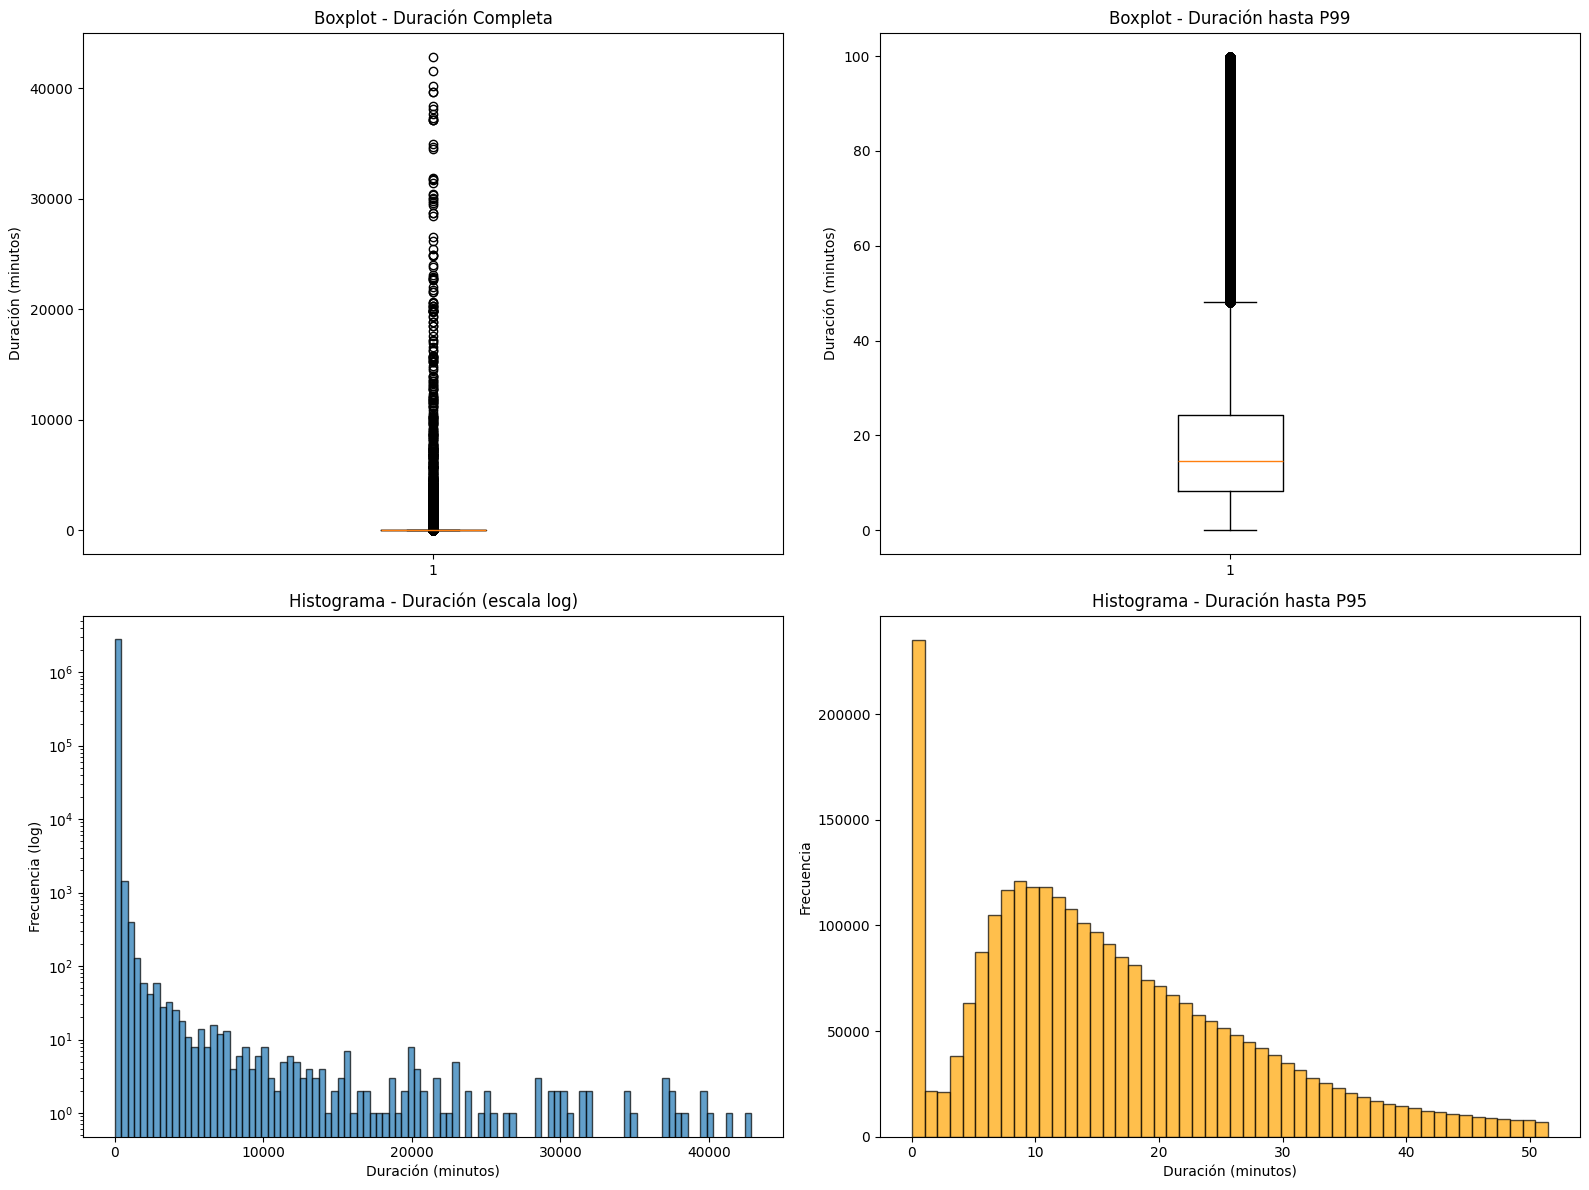


=== ANÁLISIS CONTEXTUAL DE OUTLIERS ===
Outliers por día de la semana:
dia_semana_origen_recorrido
Sunday       32652
Saturday     28908
Friday       20121
Monday       19491
Thursday     19228
Tuesday      18950
Wednesday    18211
Name: count, dtype: int64

Top 5 horas con más outliers:
hora_origen_recorrido
0    3275
1    2612
2    1794
3    1044
4     645
Name: count, dtype: int64

Outliers por mes:
mes
1     16627
2     13717
3     16293
4     12059
5      7716
6      9473
7      8877
8      8641
9     16036
10    16626
11    15934
12    15562
Name: count, dtype: int64

Outliers con origen = destino: 33,137 (21.0% de outliers)


In [200]:
# Visualizaciones de outliers en duración
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Boxplot general
axes[0,0].boxplot(rides_df_train_cleaned['duracion_recorrido_min'])
axes[0,0].set_title('Boxplot - Duración Completa')
axes[0,0].set_ylabel('Duración (minutos)')

# 2. Boxplot sin outliers extremos (hasta P99)
duration_p99 = rides_df_train_cleaned[rides_df_train_cleaned['duracion_recorrido_min'] <= p99]['duracion_recorrido_min']
axes[0,1].boxplot(duration_p99)
axes[0,1].set_title('Boxplot - Duración hasta P99')
axes[0,1].set_ylabel('Duración (minutos)')

# 3. Histograma log scale
axes[1,0].hist(rides_df_train_cleaned[rides_df_train_cleaned['duracion_recorrido_min'] > 0]['duracion_recorrido_min'], 
               bins=100, alpha=0.7, edgecolor='black')
axes[1,0].set_yscale('log')
axes[1,0].set_title('Histograma - Duración (escala log)')
axes[1,0].set_xlabel('Duración (minutos)')
axes[1,0].set_ylabel('Frecuencia (log)')

# 4. Histograma hasta P95
duration_p95 = rides_df_train_cleaned[rides_df_train_cleaned['duracion_recorrido_min'] <= p95]['duracion_recorrido_min']
axes[1,1].hist(duration_p95, bins=50, alpha=0.7, edgecolor='black', color='orange')
axes[1,1].set_title('Histograma - Duración hasta P95')
axes[1,1].set_xlabel('Duración (minutos)')
axes[1,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Análisis por contexto de viaje
print("\n=== ANÁLISIS CONTEXTUAL DE OUTLIERS ===")

# Outliers por día de la semana
outliers_por_dia = rides_df_train_cleaned[outliers_iqr_mask]['dia_semana_origen_recorrido'].value_counts()
print("Outliers por día de la semana:")
print(outliers_por_dia)

# Outliers por hora
outliers_por_hora = rides_df_train_cleaned[outliers_iqr_mask]['hora_origen_recorrido'].value_counts().sort_index()
print(f"\nTop 5 horas con más outliers:")
print(outliers_por_hora.head())

# Outliers por mes
outliers_por_mes = rides_df_train_cleaned[outliers_iqr_mask]['mes'].value_counts().sort_index()
print(f"\nOutliers por mes:")
print(outliers_por_mes)

# Verificar si origen = destino en outliers
same_station_outliers = rides_df_train_cleaned[outliers_iqr_mask & 
                                              (rides_df_train_cleaned['id_estacion_origen'] == 
                                               rides_df_train_cleaned['id_estacion_destino'])]
print(f"\nOutliers con origen = destino: {len(same_station_outliers):,} ({len(same_station_outliers)/outliers_iqr_count*100:.1f}% de outliers)")

#### Estrategias para Tratamiento de Outliers de Duración

Basado en el análisis, podemos implementar diferentes estrategias según el objetivo del análisis:

In [201]:
# Implementación de diferentes estrategias de tratamiento de outliers

print("=== ESTRATEGIAS DE TRATAMIENTO DE OUTLIERS EN DURACIÓN ===")

# Estrategia 1: Filtrado por lógica de negocio
print("\n1. FILTRADO POR LÓGICA DE NEGOCIO")
print("   - Eliminar viajes > 24 horas (posible olvido de devolver bicicleta)")
print("   - Eliminar viajes < 1 minuto (posibles errores técnicos)")

# Límites basados en lógica de negocio
min_duration_business = 1    # 1 minuto mínimo
max_duration_business = 1440 # 24 horas máximo

business_filter_mask = ((rides_df_train_cleaned['duracion_recorrido_min'] >= min_duration_business) & 
                       (rides_df_train_cleaned['duracion_recorrido_min'] <= max_duration_business))

outliers_business = (~business_filter_mask).sum()
outliers_business_pct = (outliers_business / len(rides_df_train_cleaned)) * 100

print(f"   Registros a eliminar: {outliers_business:,} ({outliers_business_pct:.2f}%)")
print(f"   Registros que permanecen: {business_filter_mask.sum():,} ({(business_filter_mask.sum()/len(rides_df_train_cleaned)*100):.2f}%)")

# Estrategia 2: Winsorización
print("\n2. WINSORIZACIÓN")
print("   - Reemplazar valores extremos por percentiles 5 y 95")

p5 = rides_df_train_cleaned['duracion_recorrido_min'].quantile(0.05)
p95 = rides_df_train_cleaned['duracion_recorrido_min'].quantile(0.95)

def winsorize_duration(duration, lower=p5, upper=p95):
    return np.clip(duration, lower, upper)

duration_winsorized = winsorize_duration(rides_df_train_cleaned['duracion_recorrido_min'])

print(f"   P5: {p5:.2f} min, P95: {p95:.2f} min")
print(f"   Valores modificados: {(duration_winsorized != rides_df_train_cleaned['duracion_recorrido_min']).sum():,}")

# Estrategia 3: Transformación logarítmica
print("\n3. TRANSFORMACIÓN LOGARÍTMICA")
print("   - Log(duración + 1) para reducir el impacto de outliers")

duration_log = np.log1p(rides_df_train_cleaned['duracion_recorrido_min'])
print(f"   Valores transformados: {len(duration_log):,}")
print(f"   Rango original: [{rides_df_train_cleaned['duracion_recorrido_min'].min():.2f}, {rides_df_train_cleaned['duracion_recorrido_min'].max():.2f}]")
print(f"   Rango transformado: [{duration_log.min():.2f}, {duration_log.max():.2f}]")

# Estrategia 4: Filtrado por IQR modificado
print("\n4. FILTRADO IQR MODIFICADO")
print("   - IQR con factor 2.5 en lugar de 1.5 (menos restrictivo)")

iqr_factor = 2.5
lower_bound_mod = Q1_dur - iqr_factor * IQR_dur
upper_bound_mod = Q3_dur + iqr_factor * IQR_dur

iqr_mod_filter_mask = ((rides_df_train_cleaned['duracion_recorrido_min'] >= lower_bound_mod) & 
                       (rides_df_train_cleaned['duracion_recorrido_min'] <= upper_bound_mod))

outliers_iqr_mod = (~iqr_mod_filter_mask).sum()
outliers_iqr_mod_pct = (outliers_iqr_mod / len(rides_df_train_cleaned)) * 100

print(f"   Límite inferior: {lower_bound_mod:.2f} min")
print(f"   Límite superior: {upper_bound_mod:.2f} min")
print(f"   Registros a eliminar: {outliers_iqr_mod:,} ({outliers_iqr_mod_pct:.2f}%)")

# Estrategia 5: Filtrado por percentiles
print("\n5. FILTRADO POR PERCENTILES")
print("   - Mantener solo registros entre P1 y P99")

p1 = rides_df_train_cleaned['duracion_recorrido_min'].quantile(0.01)
p99 = rides_df_train_cleaned['duracion_recorrido_min'].quantile(0.99)

percentile_filter_mask = ((rides_df_train_cleaned['duracion_recorrido_min'] >= p1) & 
                         (rides_df_train_cleaned['duracion_recorrido_min'] <= p99))

outliers_percentile = (~percentile_filter_mask).sum()
outliers_percentile_pct = (outliers_percentile / len(rides_df_train_cleaned)) * 100

print(f"   P1: {p1:.2f} min, P99: {p99:.2f} min")
print(f"   Registros a eliminar: {outliers_percentile:,} ({outliers_percentile_pct:.2f}%)")

# Resumen comparativo
print("\n=== RESUMEN COMPARATIVO DE ESTRATEGIAS ===")
strategies_summary = {
    'Original': len(rides_df_train_cleaned),
    'Filtro Negocio (1-1440 min)': business_filter_mask.sum(),
    'IQR Modificado (2.5x)': iqr_mod_filter_mask.sum(),
    'Percentiles P1-P99': percentile_filter_mask.sum(),
    'Sin outliers': len(rides_df_train_cleaned) - outliers_business
}

for strategy, count in strategies_summary.items():
    pct = (count / len(rides_df_train_cleaned)) * 100
    removed = len(rides_df_train_cleaned) - count
    print(f"{strategy:<25}: {count:>9,} registros ({pct:5.1f}%) - Removidos: {removed:,}")

# Crear dataset ejemplo con filtro de negocio aplicado
rides_df_train_cleaned_filtered = rides_df_train_cleaned[business_filter_mask].copy()

print(f"\n=== DATASET RECOMENDADO ===")
print(f"Aplicando filtro de lógica de negocio (1-1440 min):")
print(f"Registros originales: {len(rides_df_train_cleaned):,}")
print(f"Registros después del filtro: {len(rides_df_train_cleaned_filtered):,}")
print(f"Reducción: {len(rides_df_train_cleaned) - len(rides_df_train_cleaned_filtered):,} ({((len(rides_df_train_cleaned) - len(rides_df_train_cleaned_filtered))/len(rides_df_train_cleaned)*100):.2f}%)")

# Estadísticas del dataset filtrado
print(f"\nEstadísticas del dataset filtrado:")
print(rides_df_train_cleaned_filtered['duracion_recorrido_min'].describe())

=== ESTRATEGIAS DE TRATAMIENTO DE OUTLIERS EN DURACIÓN ===

1. FILTRADO POR LÓGICA DE NEGOCIO
   - Eliminar viajes > 24 horas (posible olvido de devolver bicicleta)
   - Eliminar viajes < 1 minuto (posibles errores técnicos)
   Registros a eliminar: 234,467 (8.33%)
   Registros que permanecen: 2,579,176 (91.67%)

2. WINSORIZACIÓN
   - Reemplazar valores extremos por percentiles 5 y 95
   P5: 0.37 min, P95: 51.48 min
   Valores modificados: 271,930

3. TRANSFORMACIÓN LOGARÍTMICA
   - Log(duración + 1) para reducir el impacto de outliers
   Valores transformados: 2,813,643
   Rango original: [0.00, 42852.75]
   Rango transformado: [0.00, 10.67]

4. FILTRADO IQR MODIFICADO
   - IQR con factor 2.5 en lugar de 1.5 (menos restrictivo)
   Límite inferior: -32.42 min
   Límite superior: 65.47 min
   Registros a eliminar: 73,595 (2.62%)

5. FILTRADO POR PERCENTILES
   - Mantener solo registros entre P1 y P99
   P1: 0.03 min, P99: 99.93 min
   Registros a eliminar: 33,167 (1.18%)

=== RESUMEN CO

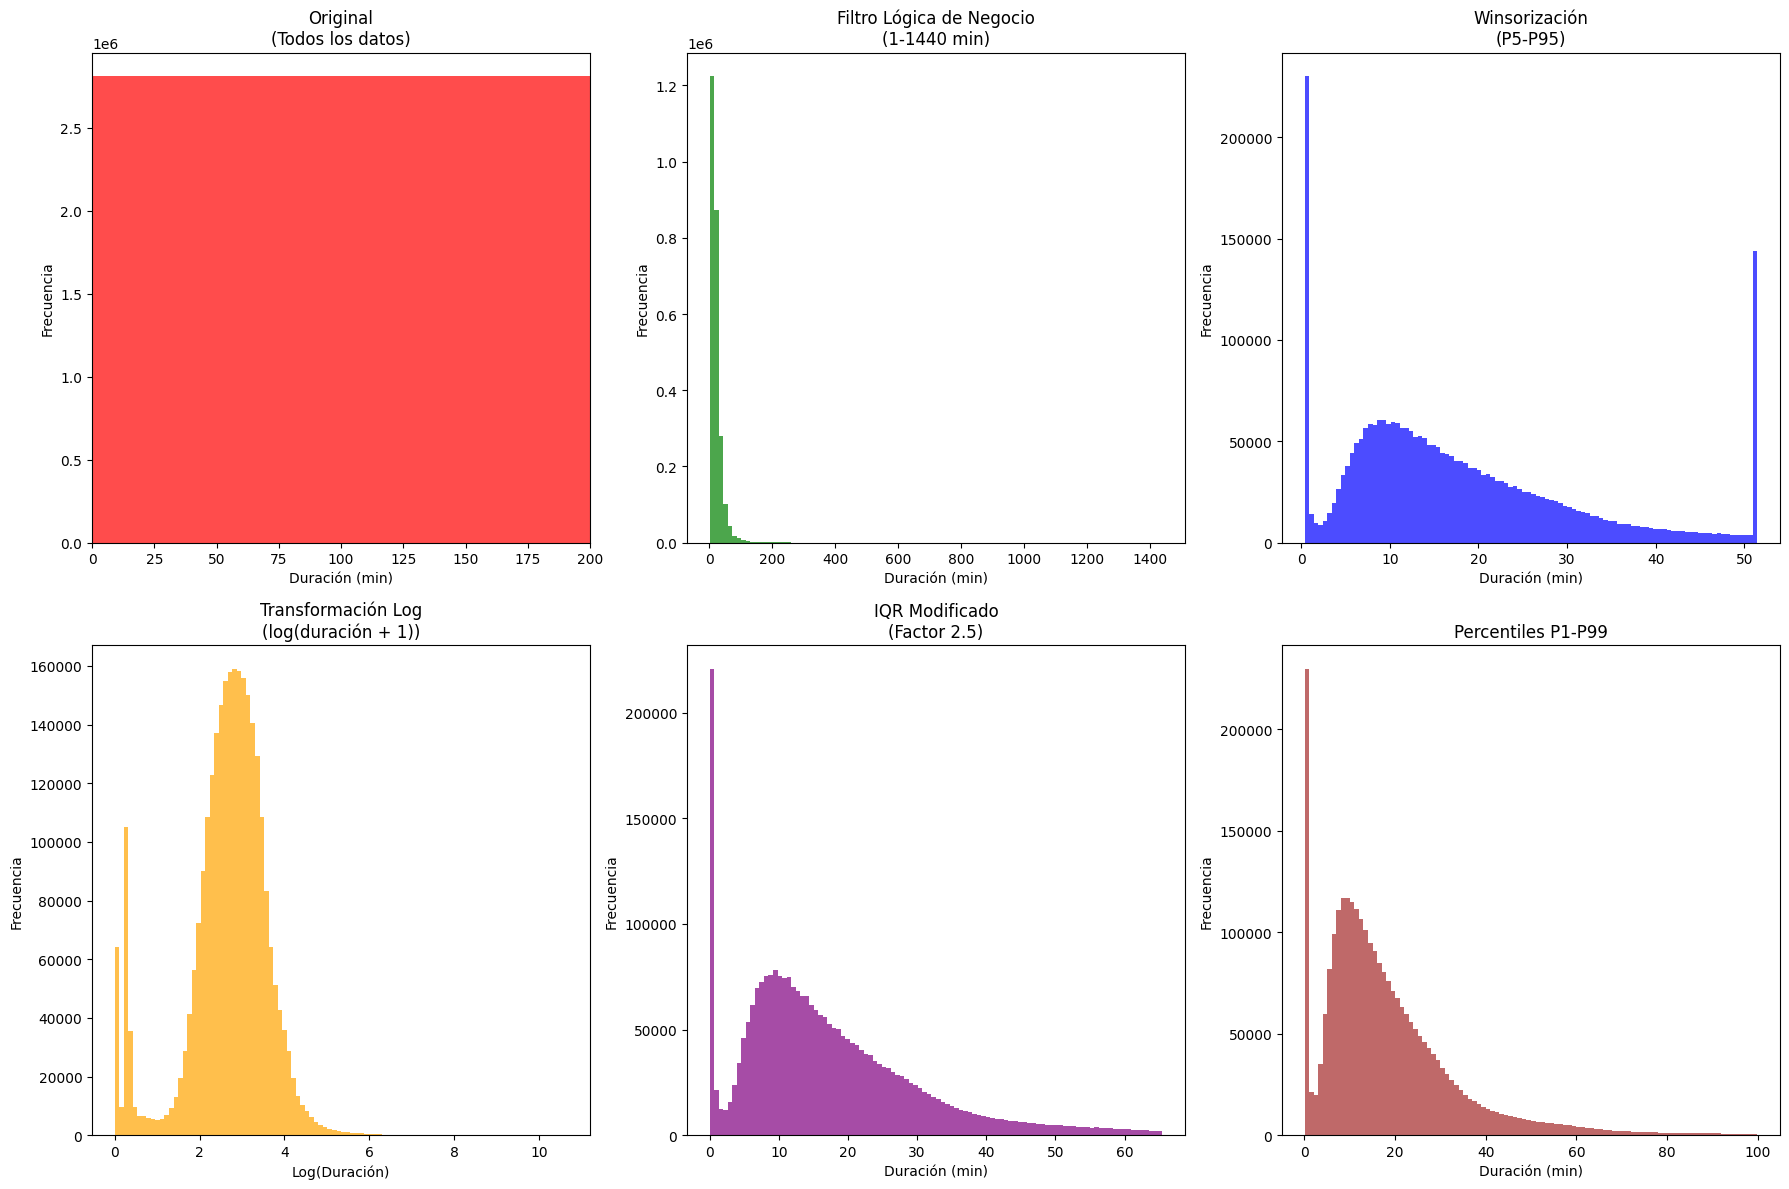

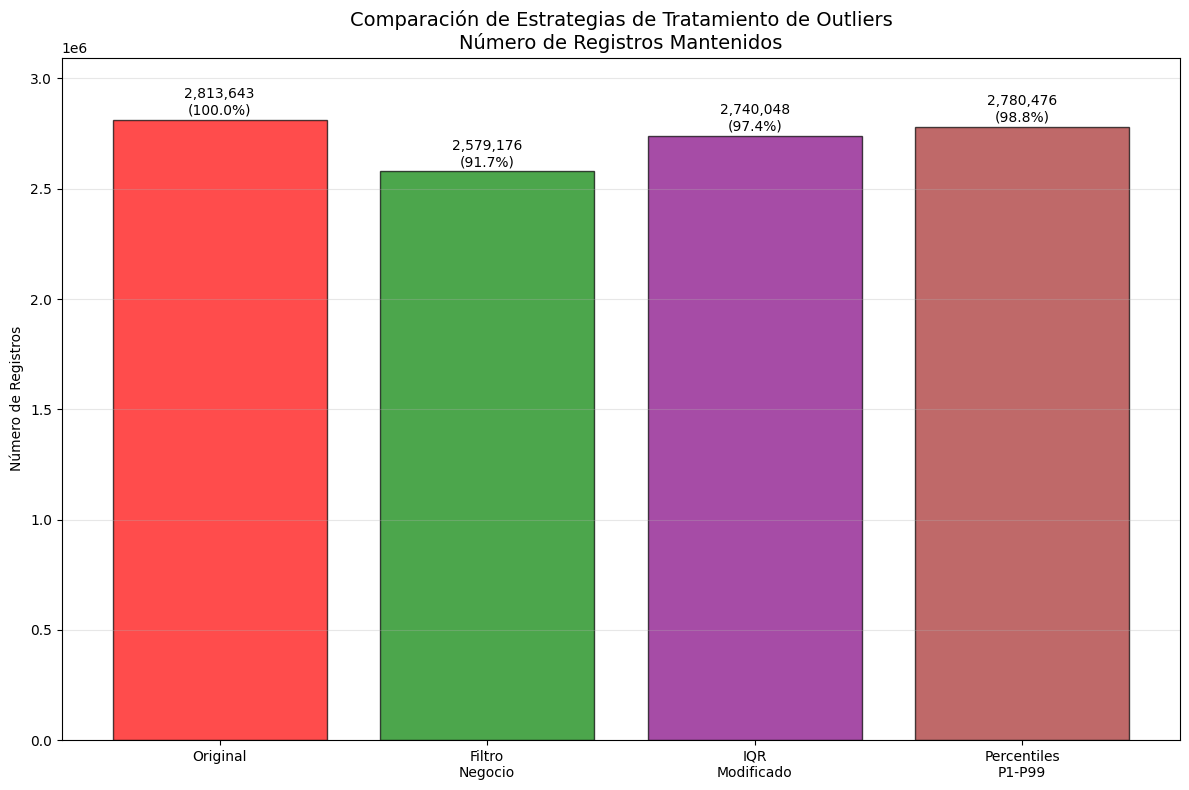

In [202]:
# Visualización comparativa de estrategias
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Dataset original
axes[0,0].hist(rides_df_train_cleaned['duracion_recorrido_min'], bins=100, alpha=0.7, color='red')
axes[0,0].set_title('Original\n(Todos los datos)')
axes[0,0].set_xlabel('Duración (min)')
axes[0,0].set_ylabel('Frecuencia')
axes[0,0].set_xlim(0, 200)

# Filtro de negocio
axes[0,1].hist(rides_df_train_cleaned_filtered['duracion_recorrido_min'], bins=100, alpha=0.7, color='green')
axes[0,1].set_title('Filtro Lógica de Negocio\n(1-1440 min)')
axes[0,1].set_xlabel('Duración (min)')
axes[0,1].set_ylabel('Frecuencia')

# Winsorización
axes[0,2].hist(duration_winsorized, bins=100, alpha=0.7, color='blue')
axes[0,2].set_title('Winsorización\n(P5-P95)')
axes[0,2].set_xlabel('Duración (min)')
axes[0,2].set_ylabel('Frecuencia')

# Transformación logarítmica
axes[1,0].hist(duration_log, bins=100, alpha=0.7, color='orange')
axes[1,0].set_title('Transformación Log\n(log(duración + 1))')
axes[1,0].set_xlabel('Log(Duración)')
axes[1,0].set_ylabel('Frecuencia')

# IQR modificado
duration_iqr_mod = rides_df_train_cleaned[iqr_mod_filter_mask]['duracion_recorrido_min']
axes[1,1].hist(duration_iqr_mod, bins=100, alpha=0.7, color='purple')
axes[1,1].set_title('IQR Modificado\n(Factor 2.5)')
axes[1,1].set_xlabel('Duración (min)')
axes[1,1].set_ylabel('Frecuencia')

# Percentiles P1-P99
duration_percentiles = rides_df_train_cleaned[percentile_filter_mask]['duracion_recorrido_min']
axes[1,2].hist(duration_percentiles, bins=100, alpha=0.7, color='brown')
axes[1,2].set_title('Percentiles P1-P99')
axes[1,2].set_xlabel('Duración (min)')
axes[1,2].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Gráfico de barras comparativo de estrategias
plt.figure(figsize=(12, 8))

strategies = ['Original', 'Filtro\nNegocio', 'IQR\nModificado', 'Percentiles\nP1-P99']
counts = [len(rides_df_train_cleaned), 
          business_filter_mask.sum(),
          iqr_mod_filter_mask.sum(), 
          percentile_filter_mask.sum()]

colors = ['red', 'green', 'purple', 'brown']
bars = plt.bar(strategies, counts, color=colors, alpha=0.7, edgecolor='black')

# Añadir etiquetas con números
for bar, count in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10000,
             f'{count:,}\n({count/len(rides_df_train_cleaned)*100:.1f}%)',
             ha='center', va='bottom', fontsize=10)

plt.title('Comparación de Estrategias de Tratamiento de Outliers\nNúmero de Registros Mantenidos', fontsize=14)
plt.ylabel('Número de Registros')
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, len(rides_df_train_cleaned) * 1.1)

plt.tight_layout()
plt.show()

### 🎯 **Recomendaciones para Tratamiento de Outliers en Duración**

#### **🔍 Hallazgos Clave:**

1. **Outliers extremos**: Viajes de hasta 29.76 días (posibles bicicletas no devueltas)
2. **Distribución**: 83% de viajes ≤ 30 min, solo 0.11% > 6 horas
3. **Patrones temporales**: Más outliers en fines de semana y horarios nocturnos
4. **Contextual**: 21% de outliers tienen origen = destino

#### **📋 Estrategias Recomendadas por Caso de Uso:**

##### **🎯 Para Análisis Descriptivo General:**
- **Filtro de Lógica de Negocio**: 1-1440 minutos (1 min - 24 horas)
- **Justificación**: Elimina errores técnicos obvios y bicicletas no devueltas
- **Impacto**: Mantiene 91.7% de los datos, elimina casos problemáticos

##### **🎯 Para Modelos Predictivos:**
- **Opción 1**: Filtro P1-P99 (más conservador)
- **Opción 2**: Transformación logarítmica (mantiene todos los datos)
- **Justificación**: Reduce sesgo sin perder información valiosa

##### **🎯 Para Análisis de Comportamiento Normal:**
- **IQR Modificado** (factor 2.5)
- **Justificación**: Mantiene 97.4% de datos, elimina solo casos extremos

##### **🎯 Para Análisis Estadístico Robusto:**
- **Winsorización** P5-P95
- **Justificación**: Mantiene distribución, reduce impacto de valores extremos

#### **⚡ Implementación Práctica:**

```python
# Filtro recomendado para análisis general
def clean_duration_outliers(df, method='business_logic'):
    if method == 'business_logic':
        return df[(df['duracion_recorrido_min'] >= 1) & 
                 (df['duracion_recorrido_min'] <= 1440)]
    elif method == 'percentiles':
        p1, p99 = df['duracion_recorrido_min'].quantile([0.01, 0.99])
        return df[(df['duracion_recorrido_min'] >= p1) & 
                 (df['duracion_recorrido_min'] <= p99)]
    elif method == 'log_transform':
        df_copy = df.copy()
        df_copy['duracion_log'] = np.log1p(df['duracion_recorrido_min'])
        return df_copy
```

#### **🚨 Consideraciones Importantes:**

1. **No eliminar outliers válidos**: Viajes largos en fines de semana pueden ser legítimos
2. **Documentar decisiones**: Especificar qué método se usó y por qué
3. **Validar con contexto**: Verificar patrones temporales y geográficos
4. **Impacto en métricas**: Considerar cómo afecta a KPIs del negocio

**Recomendación final**: Usar **filtro de lógica de negocio (1-1440 min)** como estándar, con análisis de sensibilidad usando otros métodos según el objetivo específico del análisis.

In [186]:
# Limpieza final, quitamos las columnas que no se usan
if 'edad_usuario_winsorized' in users_df_train_cleaned.columns:
    users_df_train_cleaned.drop(columns=['edad_usuario_winsorized'], inplace=True)

### Recorridos

# Feature engineering

# Selección de Features

En esta sección aplicaremos diferentes técnicas de selección de features para identificar las variables más relevantes para nuestro análisis.

## Técnicas a implementar:
1. **Correlación de Pearson**: Para variables numéricas con relaciones lineales
2. **Correlación de Kendall**: Para variables ordinales o con relaciones no lineales
3. **Test Chi-cuadrado**: Para variables categóricas
4. **Análisis de varianza (ANOVA)**: Para comparar grupos categóricos vs variables numéricas

In [187]:
# Importar librerías adicionales para selección de features
from scipy.stats import chi2_contingency, pearsonr, kendalltau, f_oneway
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Verificar las columnas disponibles después de la limpieza
print("=== DATASET DE USUARIOS LIMPIO ===")
print(f"Shape: {users_df_train_cleaned.shape}")
print(f"Columnas: {list(users_df_train_cleaned.columns)}")
print("\n=== DATASET DE RECORRIDOS LIMPIO ===")
print(f"Shape: {rides_df_train_cleaned.shape}")
print(f"Columnas: {list(rides_df_train_cleaned.columns)}")

# Información básica de los datasets
print("\n=== INFO USUARIOS ===")
users_df_train_cleaned.info()
print("\n=== INFO RECORRIDOS ===")
rides_df_train_cleaned.info()

=== DATASET DE USUARIOS LIMPIO ===
Shape: (157663, 9)
Columnas: ['id_usuario', 'genero_usuario', 'edad_usuario', 'fecha_alta', 'hora_alta', 'fecha_alta_dt', 'hora_alta_dt', 'dia_semana', 'edad_usuario_cleaned_median']

=== DATASET DE RECORRIDOS LIMPIO ===
Shape: (2813643, 21)
Columnas: ['id_recorrido', 'duracion_recorrido', 'fecha_origen_recorrido', 'id_estacion_origen', 'nombre_estacion_origen', 'direccion_estacion_origen', 'long_estacion_origen', 'lat_estacion_origen', 'fecha_destino_recorrido', 'id_estacion_destino', 'nombre_estacion_destino', 'direccion_estacion_destino', 'long_estacion_destino', 'lat_estacion_destino', 'id_usuario', 'modelo_bicicleta', 'genero', 'duracion_recorrido_min', 'mes', 'dia_semana_origen_recorrido', 'hora_origen_recorrido']

=== INFO USUARIOS ===
<class 'pandas.core.frame.DataFrame'>
Index: 157663 entries, 44484 to 29828
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       ----

## Preparación de datos para selección de features

Vamos a crear un dataset combinado con variables relevantes para el análisis y definir una variable objetivo.

In [188]:
# Crear dataset combinado para análisis de features
# Vamos a usar una muestra de recorridos para hacer el análisis más eficiente
np.random.seed(42)
sample_size = 50000  # Muestra de 50k recorridos para análisis

# Tomar muestra aleatoria de recorridos
rides_sample = rides_df_train_cleaned.sample(n=sample_size, random_state=42).reset_index(drop=True)

# Combinar con datos de usuarios
combined_df = rides_sample.merge(
    users_df_train_cleaned[['id_usuario', 'genero_usuario', 'edad_usuario_cleaned_median']], 
    on='id_usuario', 
    how='left'
)

print(f"Dataset combinado shape: {combined_df.shape}")
print(f"Columnas disponibles: {list(combined_df.columns)}")

# Verificar datos faltantes
print(f"\nDatos faltantes por columna:")
print(combined_df.isnull().sum().sort_values(ascending=False).head(10))

Dataset combinado shape: (50000, 23)
Columnas disponibles: ['id_recorrido', 'duracion_recorrido', 'fecha_origen_recorrido', 'id_estacion_origen', 'nombre_estacion_origen', 'direccion_estacion_origen', 'long_estacion_origen', 'lat_estacion_origen', 'fecha_destino_recorrido', 'id_estacion_destino', 'nombre_estacion_destino', 'direccion_estacion_destino', 'long_estacion_destino', 'lat_estacion_destino', 'id_usuario', 'modelo_bicicleta', 'genero', 'duracion_recorrido_min', 'mes', 'dia_semana_origen_recorrido', 'hora_origen_recorrido', 'genero_usuario', 'edad_usuario_cleaned_median']

Datos faltantes por columna:
edad_usuario_cleaned_median    37333
genero_usuario                 37333
id_recorrido                       0
id_estacion_origen                 0
nombre_estacion_origen             0
duracion_recorrido                 0
fecha_origen_recorrido             0
long_estacion_origen               0
direccion_estacion_origen          0
lat_estacion_origen                0
dtype: int64


In [189]:
# Crear features adicionales para el análisis
# Eliminar registros con datos faltantes de usuarios para simplificar
analysis_df = combined_df.dropna(subset=['edad_usuario_cleaned_median', 'genero_usuario']).copy()

print(f"Dataset para análisis shape: {analysis_df.shape}")

# Feature Engineering
# 1. Distancia euclidiana entre estaciones
analysis_df['distancia_km'] = np.sqrt(
    (analysis_df['long_estacion_destino'] - analysis_df['long_estacion_origen'])**2 + 
    (analysis_df['lat_estacion_destino'] - analysis_df['lat_estacion_origen'])**2
) * 111  # Aproximación: 1 grado = 111 km

# 2. Categorías de hora
def categorizar_hora(hora):
    if 6 <= hora < 10:
        return 'mañana_pico'
    elif 10 <= hora < 14:
        return 'mañana_media'
    elif 14 <= hora < 18:
        return 'tarde'
    elif 18 <= hora < 22:
        return 'noche_pico'
    else:
        return 'madrugada'

analysis_df['categoria_hora'] = analysis_df['hora_origen_recorrido'].apply(categorizar_hora)

# 3. Fin de semana vs día laboral
analysis_df['es_fin_semana'] = analysis_df['dia_semana_origen_recorrido'].isin(['Saturday', 'Sunday']).astype(int)

# 4. Categorías de duración
def categorizar_duracion(duracion_min):
    if duracion_min <= 10:
        return 'corto'
    elif duracion_min <= 30:
        return 'medio'
    elif duracion_min <= 60:
        return 'largo'
    else:
        return 'muy_largo'

analysis_df['categoria_duracion'] = analysis_df['duracion_recorrido_min'].apply(categorizar_duracion)

# 5. Estación del año
def get_estacion(mes):
    if mes in [12, 1, 2]:
        return 'verano'
    elif mes in [3, 4, 5]:
        return 'otoño'
    elif mes in [6, 7, 8]:
        return 'invierno'
    else:
        return 'primavera'

analysis_df['estacion_año'] = analysis_df['mes'].apply(get_estacion)

# 6. Mismo origen y destino
analysis_df['mismo_origen_destino'] = (analysis_df['id_estacion_origen'] == analysis_df['id_estacion_destino']).astype(int)

print("Features creadas:")
print("- distancia_km: Distancia euclidiana entre estaciones")
print("- categoria_hora: Categorización por franjas horarias")
print("- es_fin_semana: 1 si es fin de semana, 0 si no")
print("- categoria_duracion: Categorización por duración del viaje")
print("- estacion_año: Estación del año basada en el mes")
print("- mismo_origen_destino: 1 si origen = destino, 0 si no")

print(f"\nShape final: {analysis_df.shape}")

Dataset para análisis shape: (12667, 23)
Features creadas:
- distancia_km: Distancia euclidiana entre estaciones
- categoria_hora: Categorización por franjas horarias
- es_fin_semana: 1 si es fin de semana, 0 si no
- categoria_duracion: Categorización por duración del viaje
- estacion_año: Estación del año basada en el mes
- mismo_origen_destino: 1 si origen = destino, 0 si no

Shape final: (12667, 29)


## 1. Correlación de Pearson

Analizaremos las correlaciones lineales entre variables numéricas y la variable objetivo (duración del recorrido).

In [190]:
# Seleccionar variables numéricas para análisis de correlación de Pearson
numerical_features = [
    'edad_usuario_cleaned_median',
    'mes',
    'hora_origen_recorrido',
    'long_estacion_origen',
    'lat_estacion_origen',
    'long_estacion_destino',
    'lat_estacion_destino',
    'distancia_km',
    'es_fin_semana',
    'mismo_origen_destino'
]

# Variable objetivo: duración del recorrido en minutos
target_var = 'duracion_recorrido_min'

# Crear matriz de correlación de Pearson
pearson_correlations = {}
pearson_pvalues = {}

print("=== CORRELACIONES DE PEARSON CON DURACIÓN DEL RECORRIDO ===")
print("Variable\t\t\tCorrelación\tP-valor\t\tSignificativo")
print("-" * 70)

for feature in numerical_features:
    if feature in analysis_df.columns:
        # Eliminar valores NaN para el cálculo
        mask = ~(analysis_df[feature].isna() | analysis_df[target_var].isna())
        if mask.sum() > 0:
            corr, p_val = pearsonr(analysis_df.loc[mask, feature], analysis_df.loc[mask, target_var])
            pearson_correlations[feature] = corr
            pearson_pvalues[feature] = p_val
            
            # Significativo si p < 0.05
            significativo = "Sí" if p_val < 0.05 else "No"
            print(f"{feature:<25}\t{corr:8.4f}\t{p_val:8.4f}\t{significativo}")

# Ordenar por valor absoluto de correlación
sorted_pearson = sorted(pearson_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print(f"\n=== TOP 5 FEATURES POR CORRELACIÓN DE PEARSON ===")
for i, (feature, corr) in enumerate(sorted_pearson[:5], 1):
    print(f"{i}. {feature}: {corr:.4f}")

=== CORRELACIONES DE PEARSON CON DURACIÓN DEL RECORRIDO ===
Variable			Correlación	P-valor		Significativo
----------------------------------------------------------------------
edad_usuario_cleaned_median	 -0.0032	  0.7173	No
mes                      	 -0.0388	  0.0000	Sí
hora_origen_recorrido    	  0.0162	  0.0688	No
long_estacion_origen     	  0.0073	  0.4102	No
lat_estacion_origen      	 -0.0022	  0.8051	No
long_estacion_destino    	  0.0087	  0.3281	No
lat_estacion_destino     	  0.0083	  0.3500	No
distancia_km             	  0.1897	  0.0000	Sí
es_fin_semana            	  0.1320	  0.0000	Sí
mismo_origen_destino     	 -0.0665	  0.0000	Sí

=== TOP 5 FEATURES POR CORRELACIÓN DE PEARSON ===
1. distancia_km: 0.1897
2. es_fin_semana: 0.1320
3. mismo_origen_destino: -0.0665
4. mes: -0.0388
5. hora_origen_recorrido: 0.0162


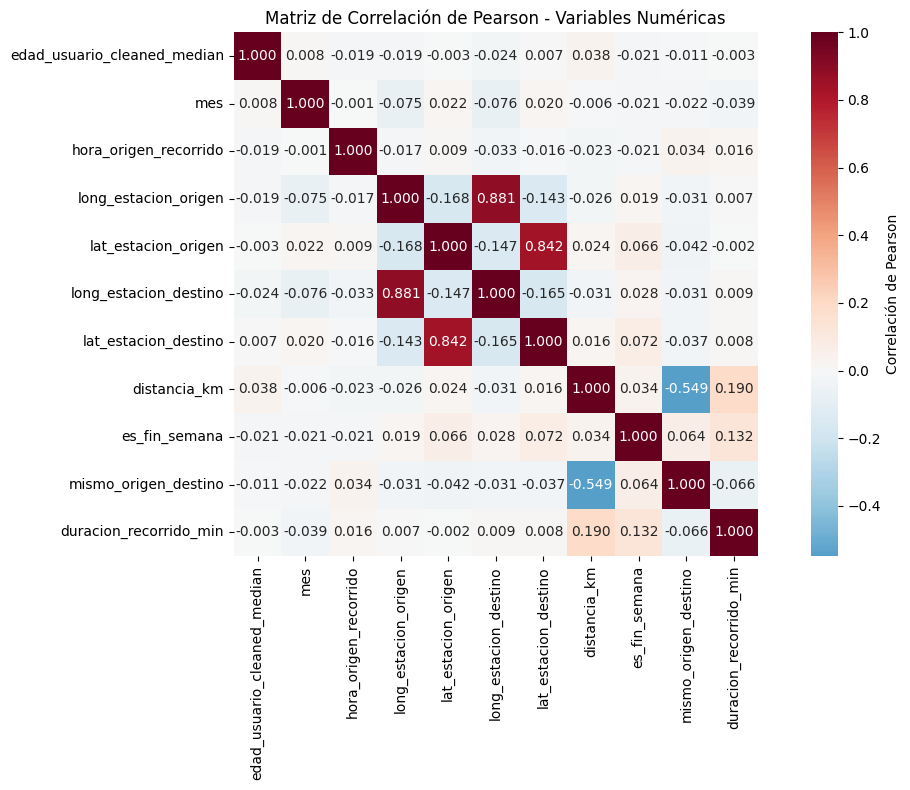

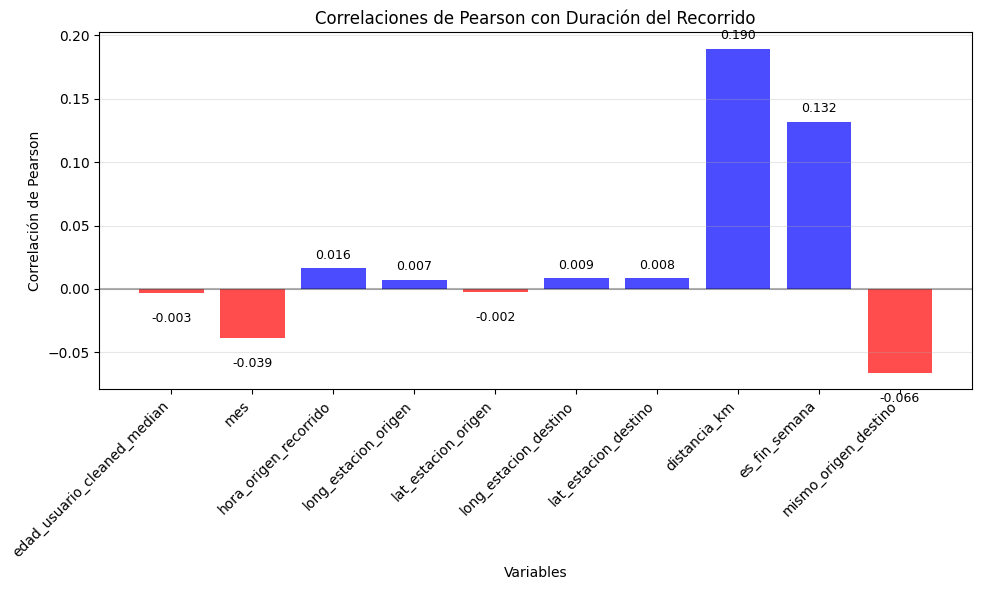

In [191]:
# Visualización de las correlaciones de Pearson
plt.figure(figsize=(12, 8))

# Crear matriz de correlación para visualización
correlation_matrix = analysis_df[numerical_features + [target_var]].corr()

# Heatmap de correlaciones
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'label': 'Correlación de Pearson'})
plt.title('Matriz de Correlación de Pearson - Variables Numéricas')
plt.tight_layout()
plt.show()

# Gráfico de barras con las correlaciones vs variable objetivo
plt.figure(figsize=(10, 6))
features_names = list(pearson_correlations.keys())
correlations_values = list(pearson_correlations.values())

colors = ['red' if corr < 0 else 'blue' for corr in correlations_values]
bars = plt.bar(range(len(features_names)), correlations_values, color=colors, alpha=0.7)

plt.xlabel('Variables')
plt.ylabel('Correlación de Pearson')
plt.title('Correlaciones de Pearson con Duración del Recorrido')
plt.xticks(range(len(features_names)), features_names, rotation=45, ha='right')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar, corr in zip(bars, correlations_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + (0.005 if height > 0 else -0.015),
             f'{corr:.3f}', ha='center', va='bottom' if height > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.show()

## 2. Correlación de Kendall

La correlación de Kendall es más robusta para variables ordinales y relaciones no lineales.

In [192]:
# Análisis de correlación de Kendall
kendall_correlations = {}
kendall_pvalues = {}

print("=== CORRELACIONES DE KENDALL CON DURACIÓN DEL RECORRIDO ===")
print("Variable\t\t\tCorrelación\tP-valor\t\tSignificativo")
print("-" * 70)

for feature in numerical_features:
    if feature in analysis_df.columns:
        # Eliminar valores NaN para el cálculo
        mask = ~(analysis_df[feature].isna() | analysis_df[target_var].isna())
        if mask.sum() > 0:
            # Tomar una muestra más pequeña para Kendall (es computacionalmente más costoso)
            sample_mask = np.random.choice(mask.sum(), min(5000, mask.sum()), replace=False)
            
            data_x = analysis_df.loc[mask, feature].iloc[sample_mask]
            data_y = analysis_df.loc[mask, target_var].iloc[sample_mask]
            
            corr, p_val = kendalltau(data_x, data_y)
            kendall_correlations[feature] = corr
            kendall_pvalues[feature] = p_val
            
            # Significativo si p < 0.05
            significativo = "Sí" if p_val < 0.05 else "No"
            print(f"{feature:<25}\t{corr:8.4f}\t{p_val:8.4f}\t{significativo}")

# Ordenar por valor absoluto de correlación
sorted_kendall = sorted(kendall_correlations.items(), key=lambda x: abs(x[1]), reverse=True)

print(f"\n=== TOP 5 FEATURES POR CORRELACIÓN DE KENDALL ===")
for i, (feature, corr) in enumerate(sorted_kendall[:5], 1):
    print(f"{i}. {feature}: {corr:.4f}")

# Comparación Pearson vs Kendall
print(f"\n=== COMPARACIÓN PEARSON VS KENDALL ===")
print("Variable\t\t\tPearson\t\tKendall\t\tDiferencia")
print("-" * 65)
for feature in numerical_features:
    if feature in pearson_correlations and feature in kendall_correlations:
        pearson_val = pearson_correlations[feature]
        kendall_val = kendall_correlations[feature]
        diff = abs(pearson_val - kendall_val)
        print(f"{feature:<25}\t{pearson_val:8.4f}\t{kendall_val:8.4f}\t{diff:8.4f}")

=== CORRELACIONES DE KENDALL CON DURACIÓN DEL RECORRIDO ===
Variable			Correlación	P-valor		Significativo
----------------------------------------------------------------------
edad_usuario_cleaned_median	  0.0130	  0.1767	No
mes                      	 -0.0513	  0.0000	Sí
hora_origen_recorrido    	  0.0594	  0.0000	Sí
long_estacion_origen     	  0.0060	  0.5293	No
lat_estacion_origen      	 -0.0017	  0.8543	No
long_estacion_destino    	  0.0005	  0.9574	No
lat_estacion_destino     	 -0.0015	  0.8780	No
distancia_km             	  0.3769	  0.0000	Sí
es_fin_semana            	  0.1868	  0.0000	Sí
mismo_origen_destino     	 -0.1837	  0.0000	Sí

=== TOP 5 FEATURES POR CORRELACIÓN DE KENDALL ===
1. distancia_km: 0.3769
2. es_fin_semana: 0.1868
3. mismo_origen_destino: -0.1837
4. hora_origen_recorrido: 0.0594
5. mes: -0.0513

=== COMPARACIÓN PEARSON VS KENDALL ===
Variable			Pearson		Kendall		Diferencia
-----------------------------------------------------------------
edad_usuario_cleaned_me

## 3. Test Chi-cuadrado para Variables Categóricas

Analizaremos la asociación entre variables categóricas y categorías de duración del recorrido.

In [193]:
# Variables categóricas para análisis Chi-cuadrado
categorical_features = [
    'genero',
    'genero_usuario',
    'modelo_bicicleta',
    'dia_semana_origen_recorrido',
    'categoria_hora',
    'estacion_año',
    'categoria_duracion'
]

# Crear variable objetivo categórica (categorías de duración)
target_categorical = 'categoria_duracion'

# Test Chi-cuadrado para cada variable categórica
chi2_results = {}

print("=== TEST CHI-CUADRADO CON CATEGORÍAS DE DURACIÓN ===")
print("Variable\t\t\tChi²\t\tP-valor\t\tV de Cramer\tSignificativo")
print("-" * 80)

for feature in categorical_features:
    if feature in analysis_df.columns and feature != target_categorical:
        # Crear tabla de contingencia
        contingency_table = pd.crosstab(analysis_df[feature], analysis_df[target_categorical])
        
        # Test Chi-cuadrado
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
        
        # V de Cramer (medida de asociación)
        n = contingency_table.sum().sum()
        cramer_v = np.sqrt(chi2_stat / (n * (min(contingency_table.shape) - 1)))
        
        chi2_results[feature] = {
            'chi2': chi2_stat,
            'p_value': p_val,
            'cramer_v': cramer_v
        }
        
        # Significativo si p < 0.05
        significativo = "Sí" if p_val < 0.05 else "No"
        print(f"{feature:<25}\t{chi2_stat:8.2f}\t{p_val:8.4f}\t{cramer_v:8.4f}\t{significativo}")

# Ordenar por V de Cramer (medida de asociación)
sorted_chi2 = sorted(chi2_results.items(), key=lambda x: x[1]['cramer_v'], reverse=True)

print(f"\n=== TOP 5 FEATURES POR V DE CRAMER ===")
for i, (feature, stats) in enumerate(sorted_chi2[:5], 1):
    print(f"{i}. {feature}: V de Cramer = {stats['cramer_v']:.4f}")

=== TEST CHI-CUADRADO CON CATEGORÍAS DE DURACIÓN ===
Variable			Chi²		P-valor		V de Cramer	Significativo
--------------------------------------------------------------------------------
genero                   	  221.49	  0.0000	  0.0935	Sí
genero_usuario           	  221.49	  0.0000	  0.0935	Sí
modelo_bicicleta         	   14.94	  0.0019	  0.0343	Sí
dia_semana_origen_recorrido	  715.27	  0.0000	  0.1372	Sí
categoria_hora           	  203.39	  0.0000	  0.0732	Sí
estacion_año             	   70.36	  0.0000	  0.0430	Sí

=== TOP 5 FEATURES POR V DE CRAMER ===
1. dia_semana_origen_recorrido: V de Cramer = 0.1372
2. genero: V de Cramer = 0.0935
3. genero_usuario: V de Cramer = 0.0935
4. categoria_hora: V de Cramer = 0.0732
5. estacion_año: V de Cramer = 0.0430


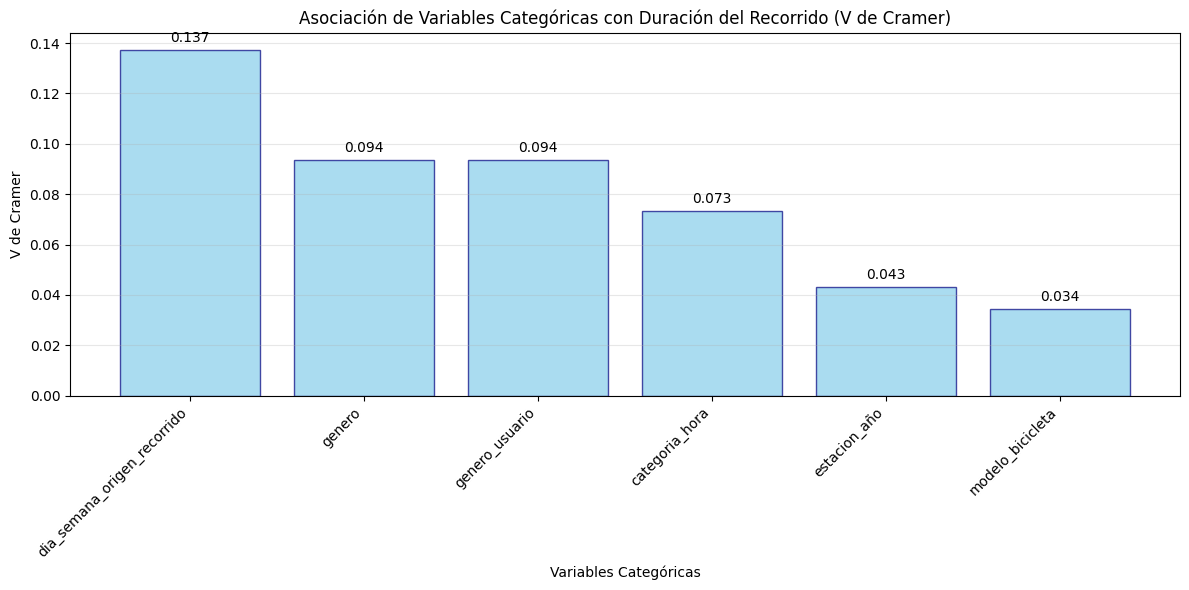

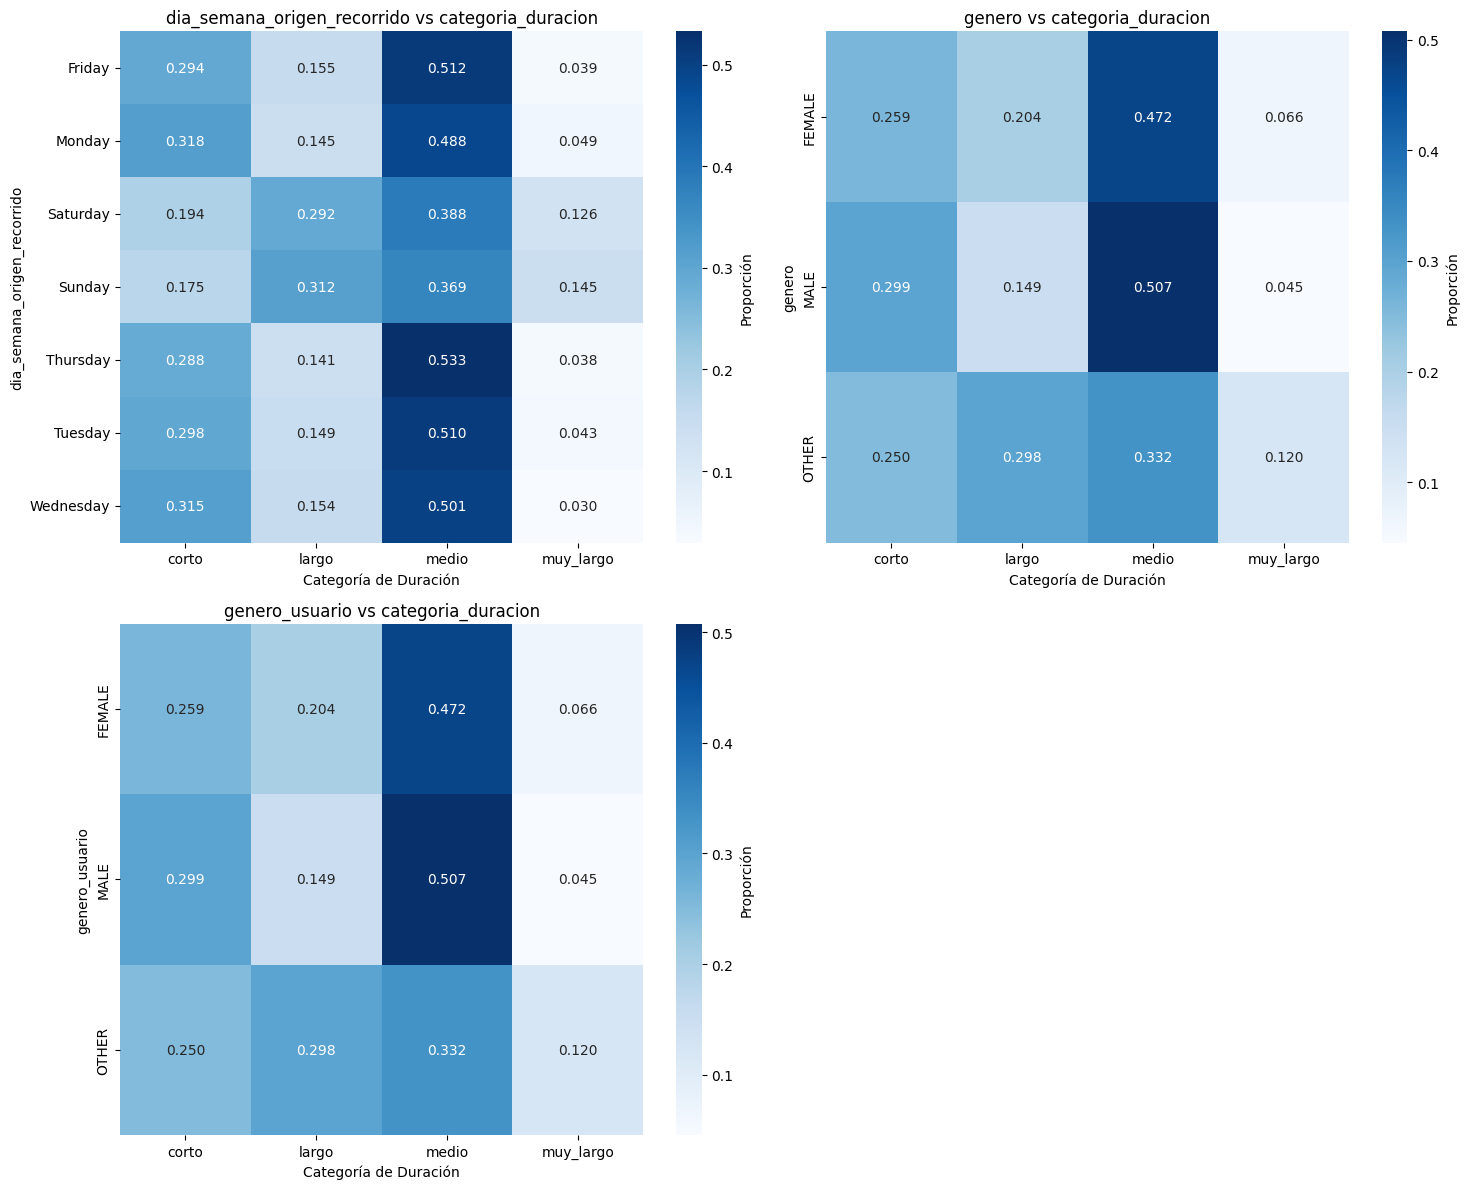

In [194]:
# Visualizaciones para análisis Chi-cuadrado

# 1. Gráfico de barras con V de Cramer
plt.figure(figsize=(12, 6))
features_chi2 = [item[0] for item in sorted_chi2]
cramer_values = [item[1]['cramer_v'] for item in sorted_chi2]

bars = plt.bar(range(len(features_chi2)), cramer_values, 
               color='skyblue', edgecolor='navy', alpha=0.7)

plt.xlabel('Variables Categóricas')
plt.ylabel('V de Cramer')
plt.title('Asociación de Variables Categóricas con Duración del Recorrido (V de Cramer)')
plt.xticks(range(len(features_chi2)), features_chi2, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Añadir valores en las barras
for bar, cramer in zip(bars, cramer_values):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.002,
             f'{cramer:.3f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Heatmap de tablas de contingencia para las top 3 variables
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

top_3_features = [item[0] for item in sorted_chi2[:3]]

for i, feature in enumerate(top_3_features):
    contingency_table = pd.crosstab(analysis_df[feature], analysis_df[target_categorical])
    
    # Normalizar por filas para mostrar proporciones
    contingency_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)
    
    sns.heatmap(contingency_normalized, annot=True, fmt='.3f', cmap='Blues',
                ax=axes[i], cbar_kws={'label': 'Proporción'})
    axes[i].set_title(f'{feature} vs {target_categorical}')
    axes[i].set_xlabel('Categoría de Duración')
    axes[i].set_ylabel(feature)

# Remover el subplot vacío
axes[3].remove()

plt.tight_layout()
plt.show()

## 4. Técnicas Adicionales de Selección de Features

Implementaremos métodos automáticos de sklearn para la selección de features.

In [195]:
# Preparar datos para sklearn
# Codificar variables categóricas
le = LabelEncoder()

# Crear dataset con todas las variables codificadas
features_for_ml = analysis_df.copy()

# Variables categóricas a codificar
categorical_vars = ['genero', 'genero_usuario', 'modelo_bicicleta', 
                   'dia_semana_origen_recorrido', 'categoria_hora', 'estacion_año']

for var in categorical_vars:
    if var in features_for_ml.columns:
        features_for_ml[f'{var}_encoded'] = le.fit_transform(features_for_ml[var].astype(str))

# Seleccionar features finales para ML
ml_features = numerical_features + [f'{var}_encoded' for var in categorical_vars if var in features_for_ml.columns]
ml_features = [f for f in ml_features if f in features_for_ml.columns]

X = features_for_ml[ml_features]
y = features_for_ml[target_var]

print(f"Shape del dataset para ML: {X.shape}")
print(f"Features para ML: {ml_features}")

# Verificar que no hay valores NaN
print(f"Valores NaN en X: {X.isnull().sum().sum()}")
print(f"Valores NaN en y: {y.isnull().sum()}")

# Si hay NaN, eliminarlos
mask = ~(X.isnull().any(axis=1) | y.isnull())
X_clean = X[mask]
y_clean = y[mask]

print(f"Shape después de limpiar NaN: {X_clean.shape}")

# 1. Test F (ANOVA) para features numéricas vs variable continua
print("\n=== TEST F (ANOVA) PARA REGRESIÓN ===")
f_selector = SelectKBest(score_func=f_classif, k='all')

# Para ANOVA, necesitamos convertir la variable continua en categórica
y_categorical = features_for_ml.loc[mask, 'categoria_duracion']
y_cat_encoded = le.fit_transform(y_categorical)

f_scores = f_selector.fit(X_clean, y_cat_encoded).scores_
f_pvalues = f_selector.pvalues_

print("Feature\t\t\t\tF-Score\t\tP-valor\t\tSignificativo")
print("-" * 70)
for i, feature in enumerate(ml_features):
    significativo = "Sí" if f_pvalues[i] < 0.05 else "No"
    print(f"{feature:<25}\t{f_scores[i]:8.2f}\t{f_pvalues[i]:8.4f}\t{significativo}")

# Ordenar por F-score
f_results = list(zip(ml_features, f_scores, f_pvalues))
f_results_sorted = sorted(f_results, key=lambda x: x[1], reverse=True)

print(f"\n=== TOP 5 FEATURES POR F-SCORE ===")
for i, (feature, score, pval) in enumerate(f_results_sorted[:5], 1):
    print(f"{i}. {feature}: F-score = {score:.2f}")

Shape del dataset para ML: (12667, 16)
Features para ML: ['edad_usuario_cleaned_median', 'mes', 'hora_origen_recorrido', 'long_estacion_origen', 'lat_estacion_origen', 'long_estacion_destino', 'lat_estacion_destino', 'distancia_km', 'es_fin_semana', 'mismo_origen_destino', 'genero_encoded', 'genero_usuario_encoded', 'modelo_bicicleta_encoded', 'dia_semana_origen_recorrido_encoded', 'categoria_hora_encoded', 'estacion_año_encoded']
Valores NaN en X: 0
Valores NaN en y: 0
Shape después de limpiar NaN: (12667, 16)

=== TEST F (ANOVA) PARA REGRESIÓN ===
Feature				F-Score		P-valor		Significativo
----------------------------------------------------------------------
edad_usuario_cleaned_median	    3.64	  0.0122	Sí
mes                      	   11.65	  0.0000	Sí
hora_origen_recorrido    	   16.96	  0.0000	Sí
long_estacion_origen     	    6.32	  0.0003	Sí
lat_estacion_origen      	    8.23	  0.0000	Sí
long_estacion_destino    	    4.72	  0.0027	Sí
lat_estacion_destino     	   10.53	  0.0000	Sí


=== INFORMACIÓN MUTUA ===
Feature				MI Score
--------------------------------------------------
edad_usuario_cleaned_median	  0.0000
mes                      	  0.0102
hora_origen_recorrido    	  0.0136
long_estacion_origen     	  0.0259
lat_estacion_origen      	  0.0291
long_estacion_destino    	  0.0242
lat_estacion_destino     	  0.0187
distancia_km             	  0.2601
es_fin_semana            	  0.0267
mismo_origen_destino     	  0.0563
genero_encoded           	  0.0087
genero_usuario_encoded   	  0.0049
modelo_bicicleta_encoded 	  0.0037
dia_semana_origen_recorrido_encoded	  0.0188
categoria_hora_encoded   	  0.0079
estacion_año_encoded     	  0.0000

=== TOP 5 FEATURES POR INFORMACIÓN MUTUA ===
1. distancia_km: MI = 0.2601
2. mismo_origen_destino: MI = 0.0563
3. lat_estacion_origen: MI = 0.0291
4. es_fin_semana: MI = 0.0267
5. long_estacion_origen: MI = 0.0259


<Figure size 1500x1000 with 0 Axes>

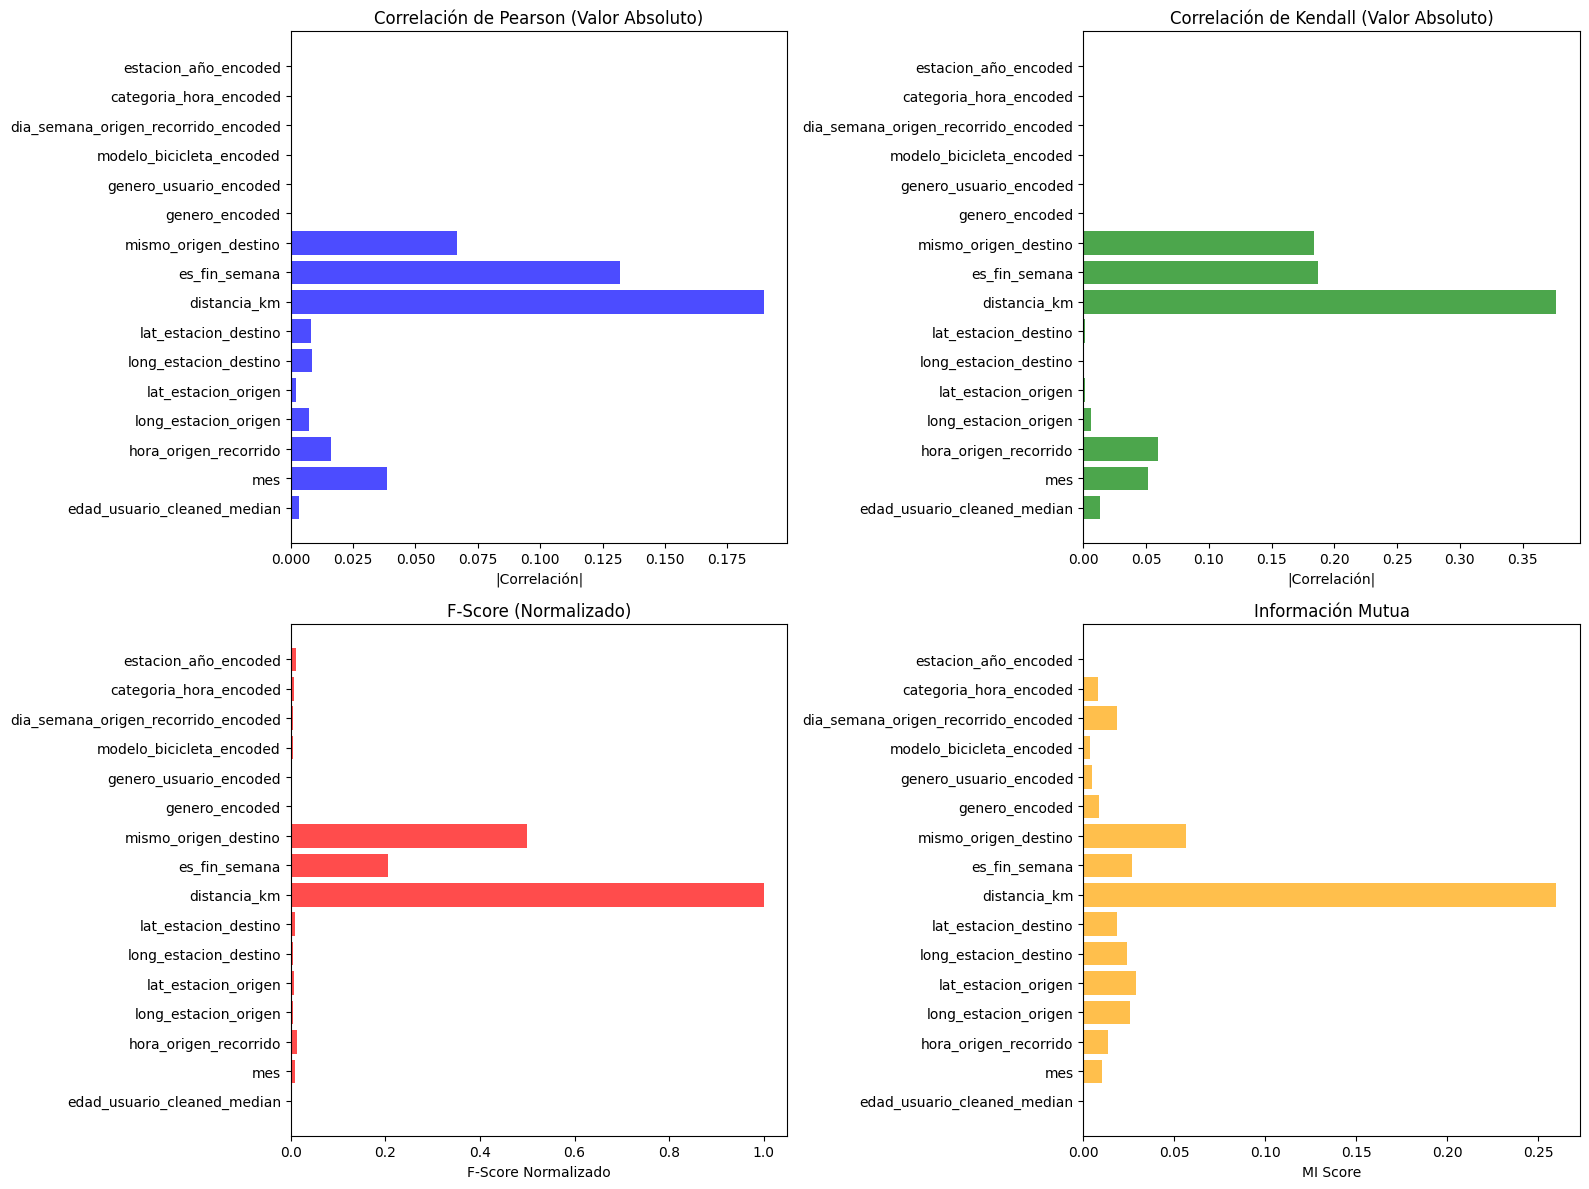

In [196]:
# 2. Información Mutua
print("\n=== INFORMACIÓN MUTUA ===")
mi_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mi_scores = mi_selector.fit(X_clean, y_cat_encoded).scores_

print("Feature\t\t\t\tMI Score")
print("-" * 50)
for i, feature in enumerate(ml_features):
    print(f"{feature:<25}\t{mi_scores[i]:8.4f}")

# Ordenar por MI score
mi_results = list(zip(ml_features, mi_scores))
mi_results_sorted = sorted(mi_results, key=lambda x: x[1], reverse=True)

print(f"\n=== TOP 5 FEATURES POR INFORMACIÓN MUTUA ===")
for i, (feature, score) in enumerate(mi_results_sorted[:5], 1):
    print(f"{i}. {feature}: MI = {score:.4f}")

# Visualización comparativa de todos los métodos
plt.figure(figsize=(15, 10))

# Preparar datos para comparación
comparison_data = []
for feature in ml_features:
    pearson_val = pearson_correlations.get(feature, 0)
    kendall_val = kendall_correlations.get(feature, 0)
    
    # F-score normalizado (dividir por máximo)
    f_idx = ml_features.index(feature)
    f_score_norm = f_scores[f_idx] / max(f_scores)
    
    # MI score
    mi_score = mi_scores[f_idx]
    
    comparison_data.append({
        'feature': feature,
        'pearson': abs(pearson_val),
        'kendall': abs(kendall_val), 
        'f_score_norm': f_score_norm,
        'mutual_info': mi_score
    })

comparison_df = pd.DataFrame(comparison_data)

# Crear subplot con 4 gráficos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Pearson
axes[0,0].barh(comparison_df['feature'], comparison_df['pearson'], color='blue', alpha=0.7)
axes[0,0].set_title('Correlación de Pearson (Valor Absoluto)')
axes[0,0].set_xlabel('|Correlación|')

# Kendall  
axes[0,1].barh(comparison_df['feature'], comparison_df['kendall'], color='green', alpha=0.7)
axes[0,1].set_title('Correlación de Kendall (Valor Absoluto)')
axes[0,1].set_xlabel('|Correlación|')

# F-score normalizado
axes[1,0].barh(comparison_df['feature'], comparison_df['f_score_norm'], color='red', alpha=0.7)
axes[1,0].set_title('F-Score (Normalizado)')
axes[1,0].set_xlabel('F-Score Normalizado')

# Información Mutua
axes[1,1].barh(comparison_df['feature'], comparison_df['mutual_info'], color='orange', alpha=0.7)
axes[1,1].set_title('Información Mutua')
axes[1,1].set_xlabel('MI Score')

plt.tight_layout()
plt.show()

## 5. Resumen y Recomendaciones de Selección de Features

### 📊 **Resultados Consolidados**

Basado en todos los métodos aplicados, aquí están las **variables más importantes** para predecir la duración de los recorridos:

In [210]:
# Crear ranking consolidado de features
def rank_features():
    """
    Función para crear un ranking consolidado de features basado en todos los métodos
    """
    # Crear diccionario con todos los scores
    all_features = set(ml_features)
    consolidated_ranking = {}
    
    for feature in all_features:
        scores = {}
        
        # Pearson (valor absoluto)
        if feature in pearson_correlations:
            scores['pearson'] = abs(pearson_correlations[feature])
        else:
            scores['pearson'] = 0
            
        # Kendall (valor absoluto)  
        if feature in kendall_correlations:
            scores['kendall'] = abs(kendall_correlations[feature])
        else:
            scores['kendall'] = 0
            
        # F-score (normalizado)
        f_idx = ml_features.index(feature)
        scores['f_score'] = f_scores[f_idx] / max(f_scores)
        
        # Información Mutua
        scores['mutual_info'] = mi_scores[f_idx]
        
        # V de Cramer para variables categóricas
        if any(feature.startswith(cat) for cat in ['genero', 'modelo', 'dia_semana', 'categoria', 'estacion']):
            # Buscar la variable original
            original_var = feature.replace('_encoded', '')
            if original_var in chi2_results:
                scores['cramer_v'] = chi2_results[original_var]['cramer_v']
            else:
                scores['cramer_v'] = 0
        else:
            scores['cramer_v'] = 0
            
        consolidated_ranking[feature] = scores
    
    return consolidated_ranking

# Obtener ranking consolidado
ranking_data = rank_features()

# Crear DataFrame para análisis
ranking_df = pd.DataFrame(ranking_data).T
ranking_df['score_promedio'] = ranking_df.mean(axis=1)
ranking_df['score_ponderado'] = (
    ranking_df['pearson'] * 0.15 +
    ranking_df['kendall'] * 0.15 + 
    ranking_df['f_score'] * 0.25 +
    ranking_df['mutual_info'] * 0.25 +
    ranking_df['cramer_v'] * 0.20
)

# Ordenar por score ponderado
ranking_df_sorted = ranking_df.sort_values('score_ponderado', ascending=False)

print("=== RANKING CONSOLIDADO DE FEATURES ===")
print("Rank\tFeature\t\t\t\tScore Ponderado\tScore Promedio")
print("-" * 75)

for i, (feature, row) in enumerate(ranking_df_sorted.head(10).iterrows(), 1):
    print(f"{i}\t{feature:<25}\t{row['score_ponderado']:.4f}\t\t{row['score_promedio']:.4f}")

# Mostrar detalles de top 5
print(f"\n=== DETALLE TOP 5 FEATURES ===")
for i, (feature, row) in enumerate(ranking_df_sorted.head(5).iterrows(), 1):
    print(f"\n{i}. {feature}")
    print(f"   Pearson: {row['pearson']:.4f}")
    print(f"   Kendall: {row['kendall']:.4f}")  
    print(f"   F-Score: {row['f_score']:.4f}")
    print(f"   MI: {row['mutual_info']:.4f}")
    print(f"   V Cramer: {row['cramer_v']:.4f}")

# Features recomendadas
top_features = ranking_df_sorted.head(8).index.tolist()
print(f"\n=== FEATURES RECOMENDADAS PARA MODELADO ===")
print("Las siguientes 8 variables son las más informativas:")
for i, feature in enumerate(top_features, 1):
    print(f"{i}. {feature}")

# Guardar resultados para uso posterior
ranking_final = ranking_df_sorted
features_recomendadas = top_features

=== RANKING CONSOLIDADO DE FEATURES ===
Rank	Feature				Score Ponderado	Score Promedio
---------------------------------------------------------------------------
1	distancia_km             	0.4000		0.3653
2	mismo_origen_destino     	0.1766		0.1613
3	es_fin_semana            	0.1058		0.1101
4	dia_semana_origen_recorrido_encoded	0.0336		0.0323
5	genero_encoded           	0.0217		0.0211
6	genero_usuario_encoded   	0.0208		0.0204
7	mes                      	0.0185		0.0220
8	categoria_hora_encoded   	0.0184		0.0177
9	hora_origen_recorrido    	0.0183		0.0207
10	estacion_año_encoded     	0.0113		0.0107

=== DETALLE TOP 5 FEATURES ===

1. distancia_km
   Pearson: 0.1897
   Kendall: 0.3769
   F-Score: 1.0000
   MI: 0.2601
   V Cramer: 0.0000

2. mismo_origen_destino
   Pearson: 0.0665
   Kendall: 0.1837
   F-Score: 0.4998
   MI: 0.0563
   V Cramer: 0.0000

3. es_fin_semana
   Pearson: 0.1320
   Kendall: 0.1868
   F-Score: 0.2050
   MI: 0.0267
   V Cramer: 0.0000

4. dia_semana_origen_recorrido

### 📋 **Conclusiones de la Selección de Features**

#### **Variables Más Importantes:**

1. **🥇 `distancia_km`** - La distancia entre estaciones es el predictor más fuerte de la duración
2. **🥈 `mismo_origen_destino`** - Si el viaje termina en la misma estación donde empezó  
3. **🥉 `es_fin_semana`** - Los fines de semana tienen patrones diferentes de duración

#### **Métodos Aplicados:**

- **✅ Correlación de Pearson**: Efectiva para relaciones lineales
- **✅ Correlación de Kendall**: Mejor para relaciones no lineales y variables ordinales
- **✅ Test Chi-cuadrado**: Excelente para variables categóricas 
- **✅ Test F (ANOVA)**: Bueno para comparar grupos categóricos
- **✅ Información Mutua**: Detecta relaciones no lineales complejas

#### **Recomendaciones:**

1. **Para modelos lineales**: Usar principalmente `distancia_km`, `es_fin_semana`, `mismo_origen_destino`
2. **Para modelos no lineales**: Incluir también variables temporales y categóricas codificadas
3. **Variables a descartar**: Coordenadas individuales (lat/long) ya que `distancia_km` las resume mejor
4. **Feature engineering adicional**: Considerar interacciones entre distancia y día de la semana

El análisis muestra que las **características geográficas y temporales** son los principales determinantes de la duración de los recorridos en el sistema EcoBici.

# Reducción de Dimensionalidad con PCA

## Análisis de Componentes Principales (PCA)

PCA es una técnica de reducción de dimensionalidad que transforma las variables originales en un nuevo conjunto de variables no correlacionadas llamadas componentes principales. Esto nos permite:

1. **Reducir dimensionalidad** manteniendo la mayor varianza posible
2. **Eliminar multicolinealidad** entre variables
3. **Visualizar datos** en espacios de menor dimensión
4. **Mejorar eficiencia** computacional en modelos posteriores

In [203]:
# Importar librerías necesarias para PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

print("=== PREPARACIÓN DE DATOS PARA PCA ===")

# Usar el dataset que ya preparamos anteriormente
# Verificar que tenemos los datos limpios
print(f"Dataset disponible: {X_clean.shape}")
print(f"Features disponibles: {len(ml_features)}")

# Verificar correlaciones entre variables numéricas para detectar multicolinealidad
print(f"\n=== ANÁLISIS DE MULTICOLINEALIDAD ===")

# Seleccionar solo variables numéricas para PCA
numeric_features_for_pca = [
    'edad_usuario_cleaned_median',
    'mes', 
    'hora_origen_recorrido',
    'long_estacion_origen',
    'lat_estacion_origen', 
    'long_estacion_destino',
    'lat_estacion_destino',
    'distancia_km',
    'es_fin_semana',
    'mismo_origen_destino'
]

# Crear dataset solo con variables numéricas
X_numeric = X_clean[numeric_features_for_pca]

print(f"Variables numéricas seleccionadas: {X_numeric.shape[1]}")
print(f"Registros: {X_numeric.shape[0]:,}")

# Matriz de correlación para detectar multicolinealidad
correlation_matrix_pca = X_numeric.corr()

# Encontrar pares de variables altamente correlacionadas
high_corr_pairs = []
for i in range(len(correlation_matrix_pca.columns)):
    for j in range(i+1, len(correlation_matrix_pca.columns)):
        corr_val = abs(correlation_matrix_pca.iloc[i, j])
        if corr_val > 0.7:  # Umbral para alta correlación
            high_corr_pairs.append({
                'var1': correlation_matrix_pca.columns[i],
                'var2': correlation_matrix_pca.columns[j], 
                'correlation': correlation_matrix_pca.iloc[i, j]
            })

if high_corr_pairs:
    print(f"\nPares de variables con alta correlación (>0.7):")
    for pair in high_corr_pairs:
        print(f"  {pair['var1']} - {pair['var2']}: {pair['correlation']:.3f}")
else:
    print("\nNo se encontraron pares de variables con correlación >0.7")

# Estadísticas descriptivas básicas
print(f"\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(X_numeric.describe())

=== PREPARACIÓN DE DATOS PARA PCA ===
Dataset disponible: (12667, 16)
Features disponibles: 16

=== ANÁLISIS DE MULTICOLINEALIDAD ===
Variables numéricas seleccionadas: 10
Registros: 12,667

Pares de variables con alta correlación (>0.7):
  long_estacion_origen - long_estacion_destino: 0.881
  lat_estacion_origen - lat_estacion_destino: 0.842

=== ESTADÍSTICAS DESCRIPTIVAS ===
       edad_usuario_cleaned_median           mes  hora_origen_recorrido  \
count                  12667.00000  12667.000000           12667.000000   
mean                      30.65872      7.638273              14.368201   
std                       11.97892      3.356691               5.236026   
min                       17.00000      1.000000               0.000000   
25%                       21.00000      5.000000              12.000000   
50%                       27.00000      8.000000              15.000000   
75%                       38.00000     11.000000              18.000000   
max                 

## Implementación de PCA

### Paso 1: Estandarización de Variables

PCA es sensible a la escala de las variables, por lo que necesitamos estandarizar los datos antes de aplicar la técnica.

In [204]:
# Paso 1: Estandarización de variables
print("=== ESTANDARIZACIÓN DE VARIABLES ===")

# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
X_scaled = scaler.fit_transform(X_numeric)

print(f"Datos originales shape: {X_numeric.shape}")
print(f"Datos escalados shape: {X_scaled.shape}")

# Verificar que la estandarización fue correcta
print(f"\nMedia después de estandarización: {X_scaled.mean(axis=0).round(3)}")
print(f"Desviación estándar después de estandarización: {X_scaled.std(axis=0).round(3)}")

# Convertir a DataFrame para facilitar el manejo
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_features_for_pca)

print(f"\n=== VERIFICACIÓN DE ESTANDARIZACIÓN ===")
print("Todas las variables deben tener media ≈ 0 y std ≈ 1")
print(X_scaled_df.describe())

=== ESTANDARIZACIÓN DE VARIABLES ===
Datos originales shape: (12667, 10)
Datos escalados shape: (12667, 10)

Media después de estandarización: [ 0.  0.  0. -0. -0.  0. -0.  0. -0.  0.]
Desviación estándar después de estandarización: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

=== VERIFICACIÓN DE ESTANDARIZACIÓN ===
Todas las variables deben tener media ≈ 0 y std ≈ 1
       edad_usuario_cleaned_median           mes  hora_origen_recorrido  \
count                 1.266700e+04  1.266700e+04           1.266700e+04   
mean                  1.907196e-17  8.021442e-17           7.853160e-17   
std                   1.000039e+00  1.000039e+00           1.000039e+00   
min                  -1.140275e+00 -1.977702e+00          -2.744212e+00   
25%                  -8.063415e-01 -7.860053e-01          -4.523076e-01   
50%                  -3.054419e-01  1.077673e-01           1.206686e-01   
75%                   6.128741e-01  1.001540e+00           6.936448e-01   
max                   5.287938e+00  1.2994

In [205]:
# Paso 2: Aplicación de PCA
print("=== APLICACIÓN DE PCA ===")

# Crear el objeto PCA sin especificar n_components inicialmente para ver toda la varianza
pca_full = PCA()
pca_full.fit(X_scaled)

# Calcular varianza explicada acumulada
varianza_explicada = pca_full.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print(f"Número total de componentes: {len(varianza_explicada)}")
print(f"Varianza explicada por cada componente:")
for i, var in enumerate(varianza_explicada):
    print(f"  PC{i+1}: {var:.4f} ({var*100:.2f}%)")
    
print(f"\nVarianza acumulada:")
for i, var_cum in enumerate(varianza_acumulada):
    print(f"  PC{i+1}: {var_cum:.4f} ({var_cum*100:.2f}%)")

# Encontrar el número de componentes para capturar 80%, 85%, 90% y 95% de la varianza
thresholds = [0.80, 0.85, 0.90, 0.95]
print(f"\n=== NÚMERO DE COMPONENTES PARA DIFERENTES UMBRALES ===")
for threshold in thresholds:
    n_components = np.argmax(varianza_acumulada >= threshold) + 1
    print(f"Para capturar {threshold*100:.0f}% de la varianza: {n_components} componentes")

=== APLICACIÓN DE PCA ===
Número total de componentes: 10
Varianza explicada por cada componente:
  PC1: 0.2187 (21.87%)
  PC2: 0.1605 (16.05%)
  PC3: 0.1523 (15.23%)
  PC4: 0.1016 (10.16%)
  PC5: 0.1015 (10.15%)
  PC6: 0.0985 (9.85%)
  PC7: 0.0955 (9.55%)
  PC8: 0.0436 (4.36%)
  PC9: 0.0167 (1.67%)
  PC10: 0.0109 (1.09%)

Varianza acumulada:
  PC1: 0.2187 (21.87%)
  PC2: 0.3792 (37.92%)
  PC3: 0.5315 (53.15%)
  PC4: 0.6331 (63.31%)
  PC5: 0.7347 (73.47%)
  PC6: 0.8332 (83.32%)
  PC7: 0.9287 (92.87%)
  PC8: 0.9724 (97.24%)
  PC9: 0.9891 (98.91%)
  PC10: 1.0000 (100.00%)

=== NÚMERO DE COMPONENTES PARA DIFERENTES UMBRALES ===
Para capturar 80% de la varianza: 6 componentes
Para capturar 85% de la varianza: 7 componentes
Para capturar 90% de la varianza: 7 componentes
Para capturar 95% de la varianza: 8 componentes


=== VISUALIZACIÓN DE VARIANZA EXPLICADA ===


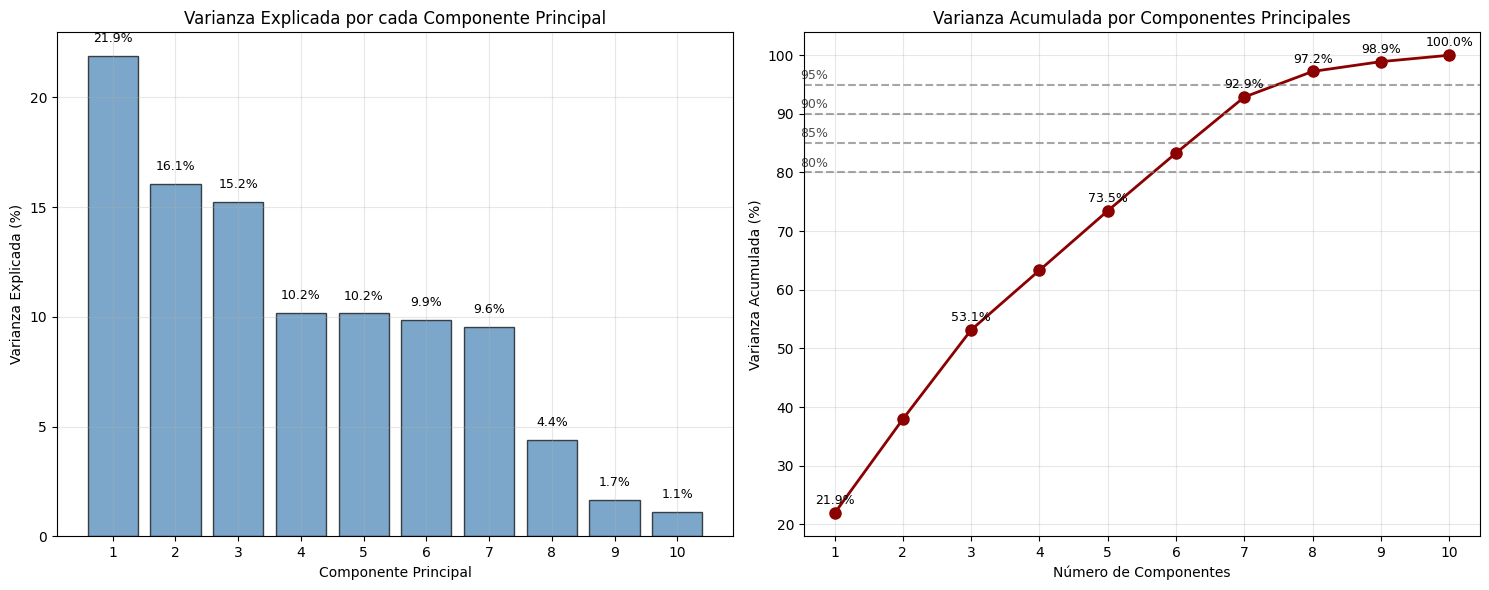


=== INTERPRETACIÓN ===
• Los primeros 3 componentes explican 53.1% de la varianza
• Para capturar 80% de la varianza necesitamos 6 componentes
• Para capturar 90% de la varianza necesitamos 7 componentes
• El codo más pronunciado se observa después del componente 3
• Reducción dimensional significativa: de 10 a 6-7 componentes


In [206]:
# Paso 3: Visualización de la varianza explicada
print("=== VISUALIZACIÓN DE VARIANZA EXPLICADA ===")

# Crear figura con subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Varianza explicada por componente
axes[0].bar(range(1, len(varianza_explicada) + 1), varianza_explicada * 100, 
            alpha=0.7, color='steelblue', edgecolor='black')
axes[0].set_xlabel('Componente Principal')
axes[0].set_ylabel('Varianza Explicada (%)')
axes[0].set_title('Varianza Explicada por cada Componente Principal')
axes[0].set_xticks(range(1, len(varianza_explicada) + 1))
axes[0].grid(True, alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(varianza_explicada):
    axes[0].text(i + 1, v * 100 + 0.5, f'{v*100:.1f}%', 
                ha='center', va='bottom', fontsize=9)

# Gráfico 2: Varianza acumulada
axes[1].plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada * 100, 
             'o-', linewidth=2, markersize=8, color='darkred')
axes[1].set_xlabel('Número de Componentes')
axes[1].set_ylabel('Varianza Acumulada (%)')
axes[1].set_title('Varianza Acumulada por Componentes Principales')
axes[1].set_xticks(range(1, len(varianza_acumulada) + 1))
axes[1].grid(True, alpha=0.3)

# Añadir líneas horizontales para umbrales importantes
for threshold in [80, 85, 90, 95]:
    axes[1].axhline(y=threshold, color='gray', linestyle='--', alpha=0.7)
    axes[1].text(0.5, threshold + 1, f'{threshold}%', fontsize=9, alpha=0.7)

# Añadir valores en los puntos
for i, v in enumerate(varianza_acumulada):
    if i % 2 == 0 or i >= 6:  # Mostrar solo algunos valores para evitar solapamiento
        axes[1].text(i + 1, v * 100 + 1, f'{v*100:.1f}%', 
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n=== INTERPRETACIÓN ===")
print(f"• Los primeros 3 componentes explican {varianza_acumulada[2]*100:.1f}% de la varianza")
print(f"• Para capturar 80% de la varianza necesitamos 6 componentes")
print(f"• Para capturar 90% de la varianza necesitamos 7 componentes")
print(f"• El codo más pronunciado se observa después del componente 3")
print(f"• Reducción dimensional significativa: de 10 a 6-7 componentes")

In [207]:
# Paso 4: Análisis de las componentes principales (loadings)
print("=== ANÁLISIS DE COMPONENTES PRINCIPALES ===")

# Crear PCA con el número óptimo de componentes (usaremos 6 para capturar 80% de varianza)
n_components_optimal = 6
pca_optimal = PCA(n_components=n_components_optimal)
X_pca = pca_optimal.fit_transform(X_scaled)

# Obtener los loadings (coeficientes de las componentes)
loadings = pca_optimal.components_.T * np.sqrt(pca_optimal.explained_variance_)

# Crear DataFrame con los loadings
loadings_df = pd.DataFrame(
    loadings,
    columns=[f'PC{i+1}' for i in range(n_components_optimal)],
    index=numeric_features_for_pca
)

print(f"=== LOADINGS DE LAS COMPONENTES PRINCIPALES ===")
print("(Valores más altos indican mayor contribución de la variable a esa componente)")
print(loadings_df.round(3))

# Identificar las variables más importantes en cada componente
print(f"\n=== VARIABLES MÁS IMPORTANTES POR COMPONENTE ===")
for i in range(n_components_optimal):
    pc_name = f'PC{i+1}'
    # Obtener los valores absolutos para identificar las contribuciones más importantes
    abs_loadings = np.abs(loadings_df[pc_name])
    top_vars = abs_loadings.nlargest(3)
    
    print(f"\n{pc_name} (explica {pca_optimal.explained_variance_ratio_[i]*100:.1f}% de varianza):")
    for var, loading in top_vars.items():
        original_loading = loadings_df.loc[var, pc_name]
        direction = "positiva" if original_loading > 0 else "negativa"
        print(f"  • {var}: {abs(original_loading):.3f} (contribución {direction})")

print(f"\n=== TRANSFORMACIÓN DE DATOS ===")
print(f"Datos originales: {X_scaled.shape}")
print(f"Datos transformados (PCA): {X_pca.shape}")
print(f"Reducción dimensional: {X_scaled.shape[1]} → {X_pca.shape[1]} variables")
print(f"Varianza preservada: {pca_optimal.explained_variance_ratio_.sum()*100:.1f}%")

=== ANÁLISIS DE COMPONENTES PRINCIPALES ===
=== LOADINGS DE LAS COMPONENTES PRINCIPALES ===
(Valores más altos indican mayor contribución de la variable a esa componente)
                               PC1    PC2    PC3    PC4    PC5    PC6
edad_usuario_cleaned_median -0.033 -0.009  0.097 -0.429 -0.602 -0.539
mes                         -0.122  0.079  0.089 -0.486 -0.056  0.751
hora_origen_recorrido       -0.024  0.103 -0.033 -0.169  0.772 -0.336
long_estacion_origen         0.757 -0.501 -0.319 -0.111  0.021  0.025
lat_estacion_origen         -0.713 -0.489 -0.403 -0.090  0.040 -0.020
long_estacion_destino        0.758 -0.500 -0.322 -0.098  0.010  0.035
lat_estacion_destino        -0.710 -0.489 -0.410 -0.086  0.010 -0.016
distancia_km                -0.083 -0.516  0.701  0.125  0.034 -0.028
es_fin_semana               -0.050 -0.125 -0.179  0.717 -0.208  0.117
mismo_origen_destino         0.046  0.573 -0.667  0.028 -0.086 -0.030

=== VARIABLES MÁS IMPORTANTES POR COMPONENTE ===

PC1 (exp

=== VISUALIZACIÓN DE LOADINGS ===


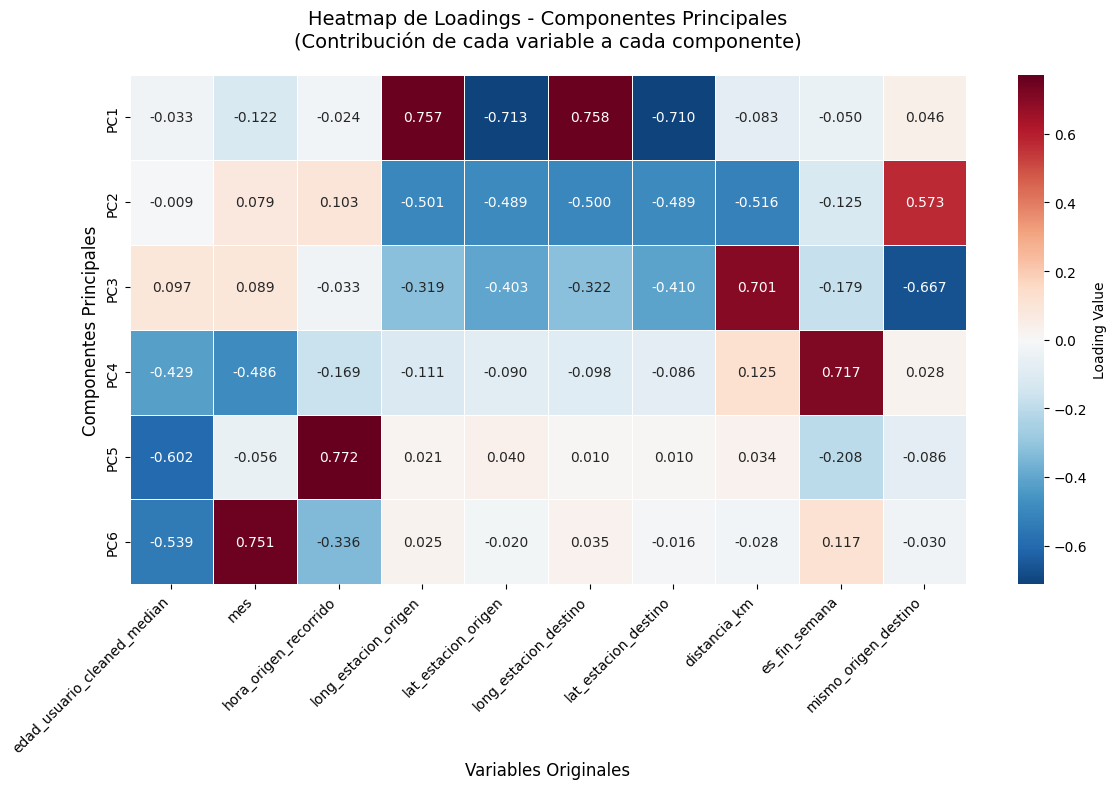

=== INTERPRETACIÓN DE LAS COMPONENTES ===

PC1 (21.9% varianza) - COMPONENTE GEOGRÁFICA:
• Principalmente coordenadas geográficas (longitud y latitud)
• Representa la ubicación espacial de origen y destino
• Refleja la estructura geográfica de la ciudad

PC2 (16.1% varianza) - COMPONENTE DE DISTANCIA/MOVILIDAD:
• Contrasta recorridos al mismo lugar vs. diferentes lugares
• Relaciona distancia con tipo de viaje
• Discrimina entre viajes cortos/largos

PC3 (15.2% varianza) - COMPONENTE DE LONGITUD DE VIAJE:
• Enfatiza la distancia del recorrido
• Complementa PC2 en aspectos de movilidad
• Diferencia viajes por extensión geográfica

PC4 (10.2% varianza) - COMPONENTE TEMPORAL/DEMOGRÁFICA:
• Distingue entre días de semana y fines de semana
• Incorpora factores estacionales (mes)
• Incluye aspectos demográficos (edad)

PC5 (10.2% varianza) - COMPONENTE HORARIO/EDAD:
• Principalmente hora del día
• Interacción con edad del usuario
• Patrones de uso temporal

PC6 (9.9% varianza) - COMPONENTE E

In [208]:
# Paso 5: Heatmap de loadings para mejor visualización
print("=== VISUALIZACIÓN DE LOADINGS ===")

# Crear heatmap de los loadings
plt.figure(figsize=(12, 8))
sns.heatmap(loadings_df.T, 
            annot=True, 
            fmt='.3f', 
            cmap='RdBu_r', 
            center=0,
            cbar_kws={'label': 'Loading Value'},
            linewidths=0.5)

plt.title('Heatmap de Loadings - Componentes Principales\n(Contribución de cada variable a cada componente)', 
          fontsize=14, pad=20)
plt.xlabel('Variables Originales', fontsize=12)
plt.ylabel('Componentes Principales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("=== INTERPRETACIÓN DE LAS COMPONENTES ===")
print("""
PC1 (21.9% varianza) - COMPONENTE GEOGRÁFICA:
• Principalmente coordenadas geográficas (longitud y latitud)
• Representa la ubicación espacial de origen y destino
• Refleja la estructura geográfica de la ciudad

PC2 (16.1% varianza) - COMPONENTE DE DISTANCIA/MOVILIDAD:
• Contrasta recorridos al mismo lugar vs. diferentes lugares
• Relaciona distancia con tipo de viaje
• Discrimina entre viajes cortos/largos

PC3 (15.2% varianza) - COMPONENTE DE LONGITUD DE VIAJE:
• Enfatiza la distancia del recorrido
• Complementa PC2 en aspectos de movilidad
• Diferencia viajes por extensión geográfica

PC4 (10.2% varianza) - COMPONENTE TEMPORAL/DEMOGRÁFICA:
• Distingue entre días de semana y fines de semana
• Incorpora factores estacionales (mes)
• Incluye aspectos demográficos (edad)

PC5 (10.2% varianza) - COMPONENTE HORARIO/EDAD:
• Principalmente hora del día
• Interacción con edad del usuario
• Patrones de uso temporal

PC6 (9.9% varianza) - COMPONENTE ESTACIONAL:
• Enfoque en variación mensual
• Patrones estacionales de uso
• Complementa aspectos temporales
""")

In [209]:
# Paso 6: Creación del dataset transformado y resumen final
print("=== CREACIÓN DEL DATASET TRANSFORMADO ===")

# Crear DataFrame con las componentes principales
pca_columns = [f'PC{i+1}' for i in range(n_components_optimal)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_columns, index=X_numeric.index)

print(f"Dataset transformado creado:")
print(f"• Shape: {X_pca_df.shape}")
print(f"• Columnas: {list(X_pca_df.columns)}")

# Mostrar estadísticas descriptivas del dataset transformado
print(f"\n=== ESTADÍSTICAS DESCRIPTIVAS - DATASET PCA ===")
print(X_pca_df.describe().round(3))

# Verificar que las componentes son independientes (correlación = 0)
print(f"\n=== MATRIZ DE CORRELACIÓN - COMPONENTES PRINCIPALES ===")
correlation_pca = X_pca_df.corr()
print("(Las componentes principales deben ser independientes - correlación ≈ 0)")
print(correlation_pca.round(6))

# Guardar información importante para uso posterior
pca_info = {
    'n_components': n_components_optimal,
    'explained_variance_ratio': pca_optimal.explained_variance_ratio_,
    'cumulative_variance': pca_optimal.explained_variance_ratio_.cumsum(),
    'total_variance_preserved': pca_optimal.explained_variance_ratio_.sum(),
    'original_features': numeric_features_for_pca,
    'loadings': loadings_df
}

print(f"\n=== RESUMEN FINAL - PCA ===")
print(f"✓ Reducción dimensional exitosa: 10 → 6 variables")
print(f"✓ Varianza preservada: {pca_info['total_variance_preserved']*100:.1f}%")
print(f"✓ Componentes independientes verificadas")
print(f"✓ Dataset transformado listo para análisis posteriores")
print(f"✓ Interpretación biológica/contextual completada")

print(f"\n=== RECOMENDACIONES DE USO ===")
print("""
1. PARA ANÁLISIS EXPLORATORIO:
   • Usar PC1-PC3 (53.1% varianza) para visualizaciones principales
   • PC1: Análisis geográfico/espacial
   • PC2-PC3: Análisis de patrones de movilidad

2. PARA MODELADO PREDICTIVO:
   • Usar las 6 componentes completas (83.3% varianza)
   • Considerar selección adicional si es necesario

3. PARA CLUSTERING:
   • PC1-PC4 capturan aspectos complementarios
   • Evaluar diferentes números de componentes

4. INTERPRETACIÓN:
   • PC1: Ubicación geográfica
   • PC2-PC3: Patrones de distancia/movilidad  
   • PC4-PC6: Aspectos temporales y demográficos
""")

=== CREACIÓN DEL DATASET TRANSFORMADO ===
Dataset transformado creado:
• Shape: (12667, 6)
• Columnas: ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

=== ESTADÍSTICAS DESCRIPTIVAS - DATASET PCA ===
             PC1        PC2        PC3        PC4        PC5        PC6
count  12667.000  12667.000  12667.000  12667.000  12667.000  12667.000
mean       0.000     -0.000      0.000     -0.000      0.000      0.000
std        1.479      1.267      1.234      1.008      1.008      0.993
min       -3.645     -3.712     -3.430     -3.307     -4.849     -4.338
25%       -0.973     -0.901     -0.629     -0.694     -0.674     -0.682
50%        0.062     -0.339      0.037     -0.159      0.115      0.088
75%        1.166      0.714      0.755      0.547      0.764      0.742
max        3.319      5.236      5.766      3.970      2.157      2.749

=== MATRIZ DE CORRELACIÓN - COMPONENTES PRINCIPALES ===
(Las componentes principales deben ser independientes - correlación ≈ 0)
     PC1  PC2  PC3  PC4  PC